In [5]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import pymysql

In [71]:
name_list = []
df_list = []
def hospital(cur):
    tables = ["h2013", "h2015", "h2017", "h2019", "h2021", "h2023"]
    cur.execute(f'''select * from h2013''') # 2013년이 학과 개수가 가장 적음 
    for j in cur.description[1:]: # 과 이름 다 넣은 거
        try:
            # sql = f'''update {i} set {j[0]} = "0" where {j[0]} = "-";'''
            # cur.execute(sql)
            sql = f'''select tb23.시도별,
            tb13.{j[0]} as "2013", tb15.{j[0]} as "2015",
        	tb17.{j[0]} as "2017", tb19.{j[0]} as "2019",
        	tb21.{j[0]} as "2021", tb23.{j[0]} as "2023"
            from h2023 as tb23
        	inner join (select 시도별, {j[0]}
        	from h2021) as tb21
        	on tb23.시도별 = tb21.시도별
        	inner join (select 시도별, {j[0]}
        	from h2019) as tb19
        	on tb23.시도별 = tb19.시도별
        	inner join (select 시도별, {j[0]}
        	from h2017) as tb17
        	on tb23.시도별 = tb17.시도별
        	inner join (select 시도별, {j[0]}
        	from h2015) as tb15
        	on tb23.시도별 = tb15.시도별
        	inner join (select 시도별, {j[0]}
        	from h2013) as tb13
        	on tb23.시도별 = tb13.시도별;'''
            # print(sql)
            cur.execute(sql)
            rows = cur.fetchall()	#	모든	데이터를	가져옴
            # print(rows)
            rowDF = pd.DataFrame(rows)
            rowDF.set_index(0, inplace=True)
            rowDF.columns = ["2013", "2015", "2017", "2019", "2021", "2023"]
            df_list.append(rowDF)	#	DataFrame형태로	변환
            # print(j[0]) # 학과 
            name_list.append(str(j[0]))
        except:
            print("error = ",j[0])
            continue

In [72]:
conn = pymysql.connect(host='localhost', user='root', password='1234', db =	'hospital2', charset='utf8')
cur =	conn.cursor()
hospital(cur)
# print(language_df)
cur.close()
conn.close()	#	데이터베이스	연결	종료

error =  예방의학과


In [82]:
def draw_graph(df, name):
    plt.figure(figsize=(20, 10))
    # x = group_area.index.to_list()
    x = ["2013", "2015", "2017", "2019", "2021", "2023"]
    y = df.iloc[0].to_list()
    
    plt.plot(x, y, "k--")
    
    
    plt.xticks(rotation=70)
    # plt.ylim(220000, 350000)
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    
    plt.title(name, size = 30)
    # 숫자 넣는 부분
    idx = 0
    '''
    for rect in bar:
        height = rect.get_height()
        if idx < 8:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='top', size = 15, rotation=90)
        else:    
            plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=90)
        idx += 1
    
    plt.text(rect.get_x() + rect.get_width()/2.0, avg, f"평균:{round(avg)}", ha='center', va='bottom', size = 15)
    '''
    plt.show()

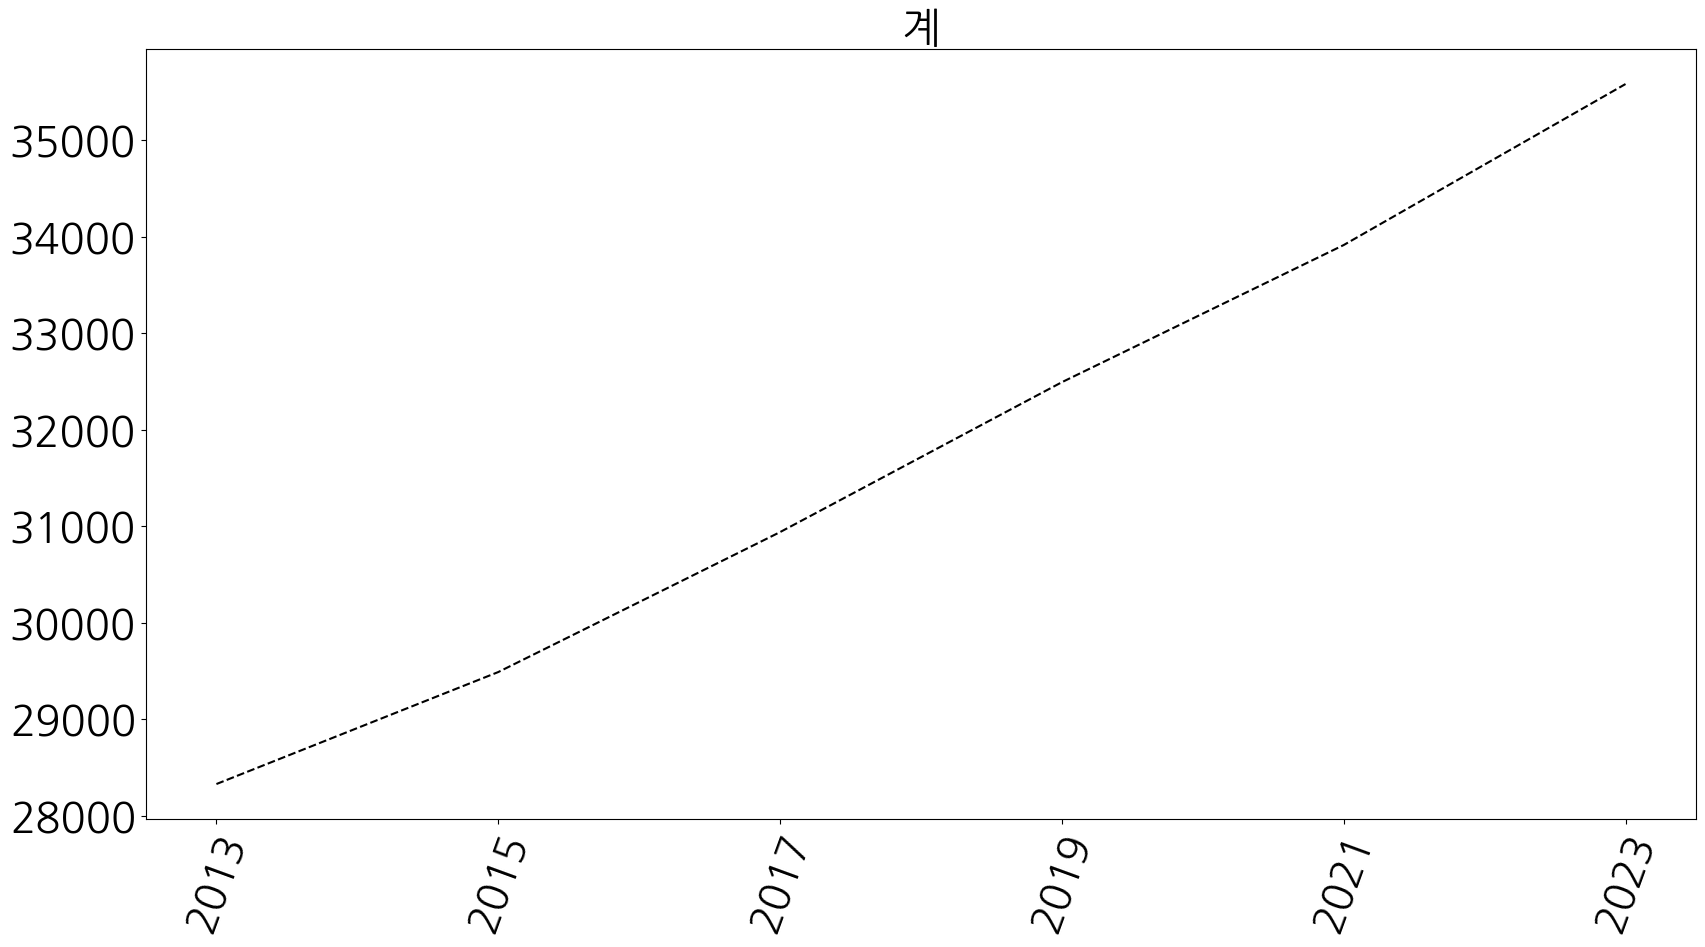

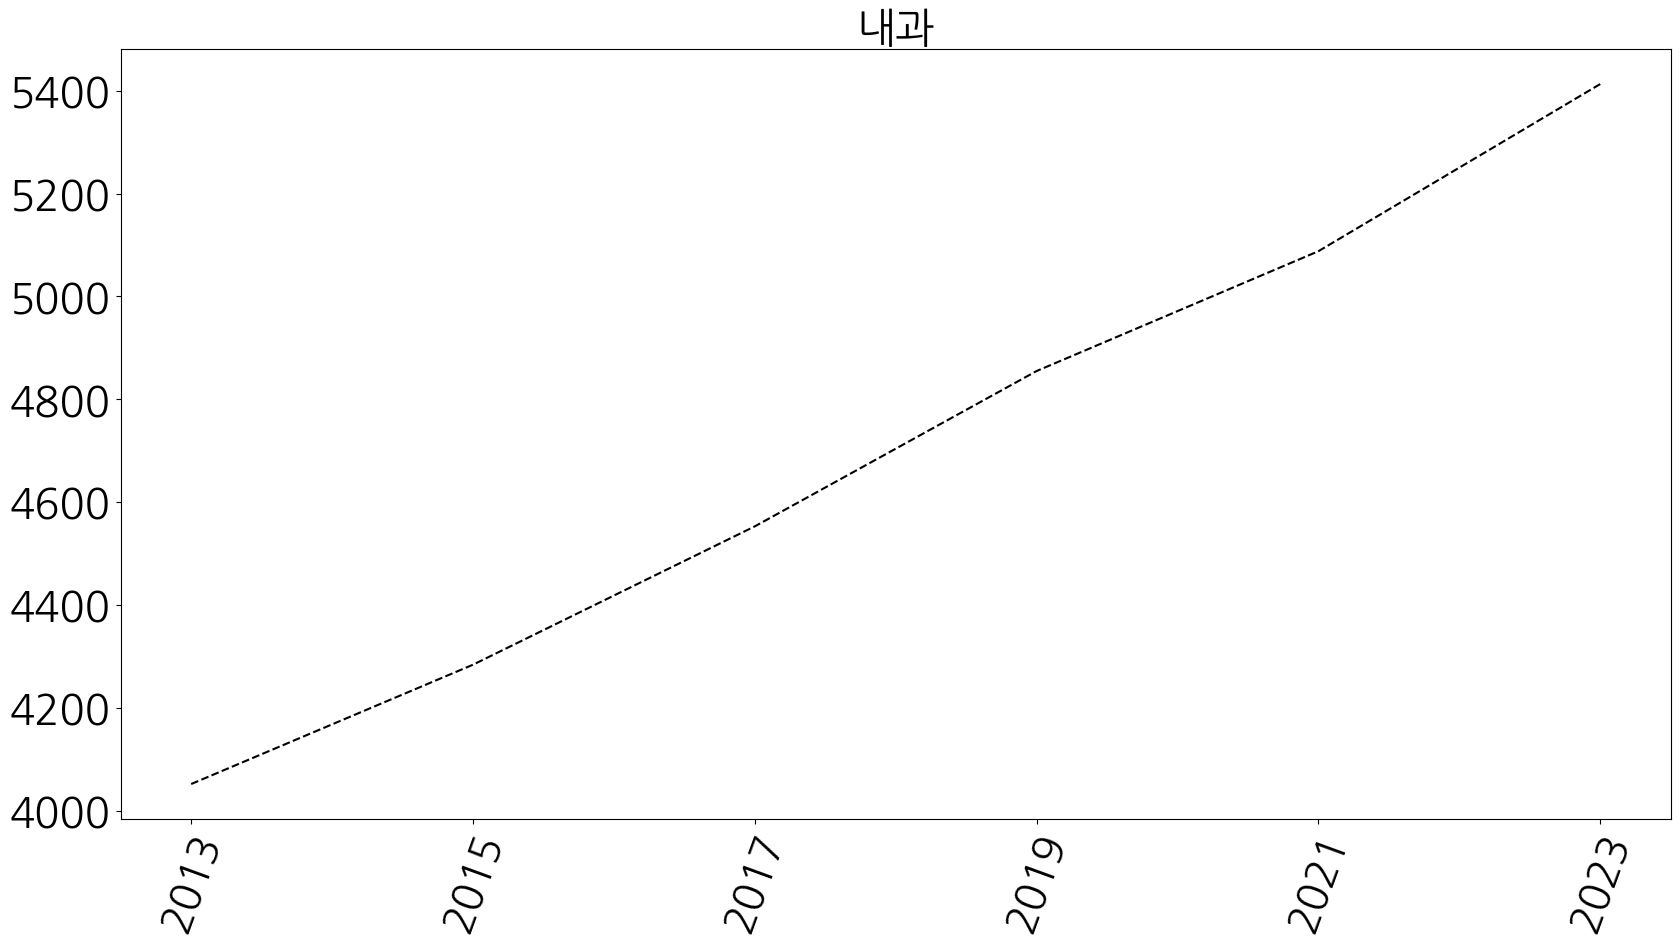

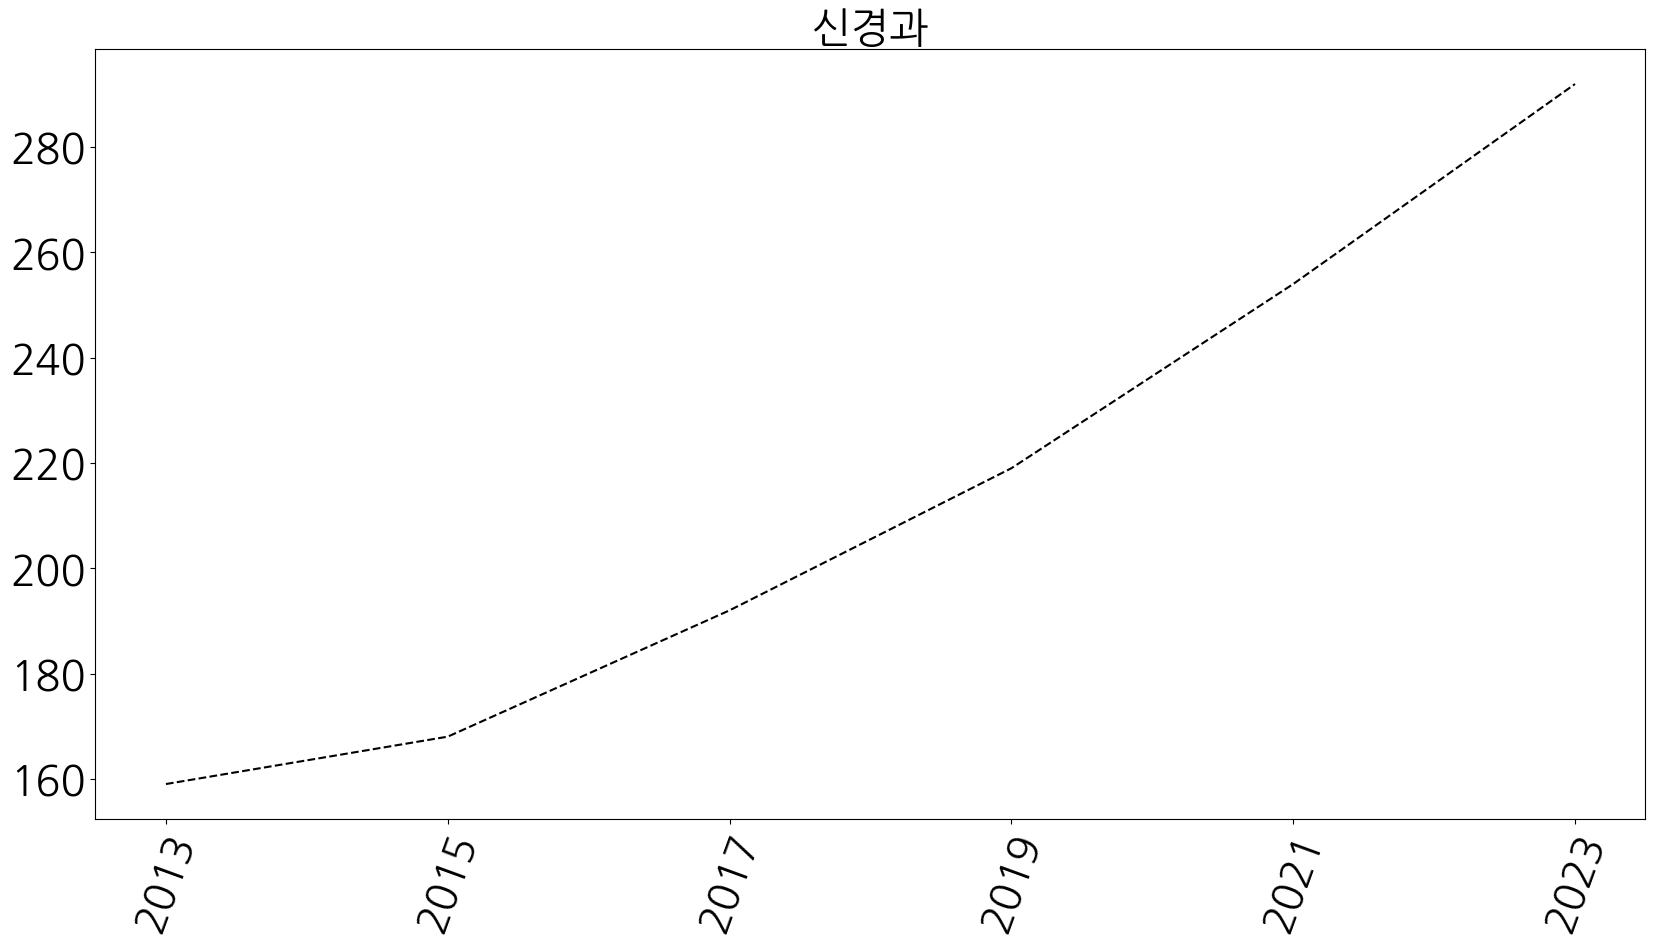

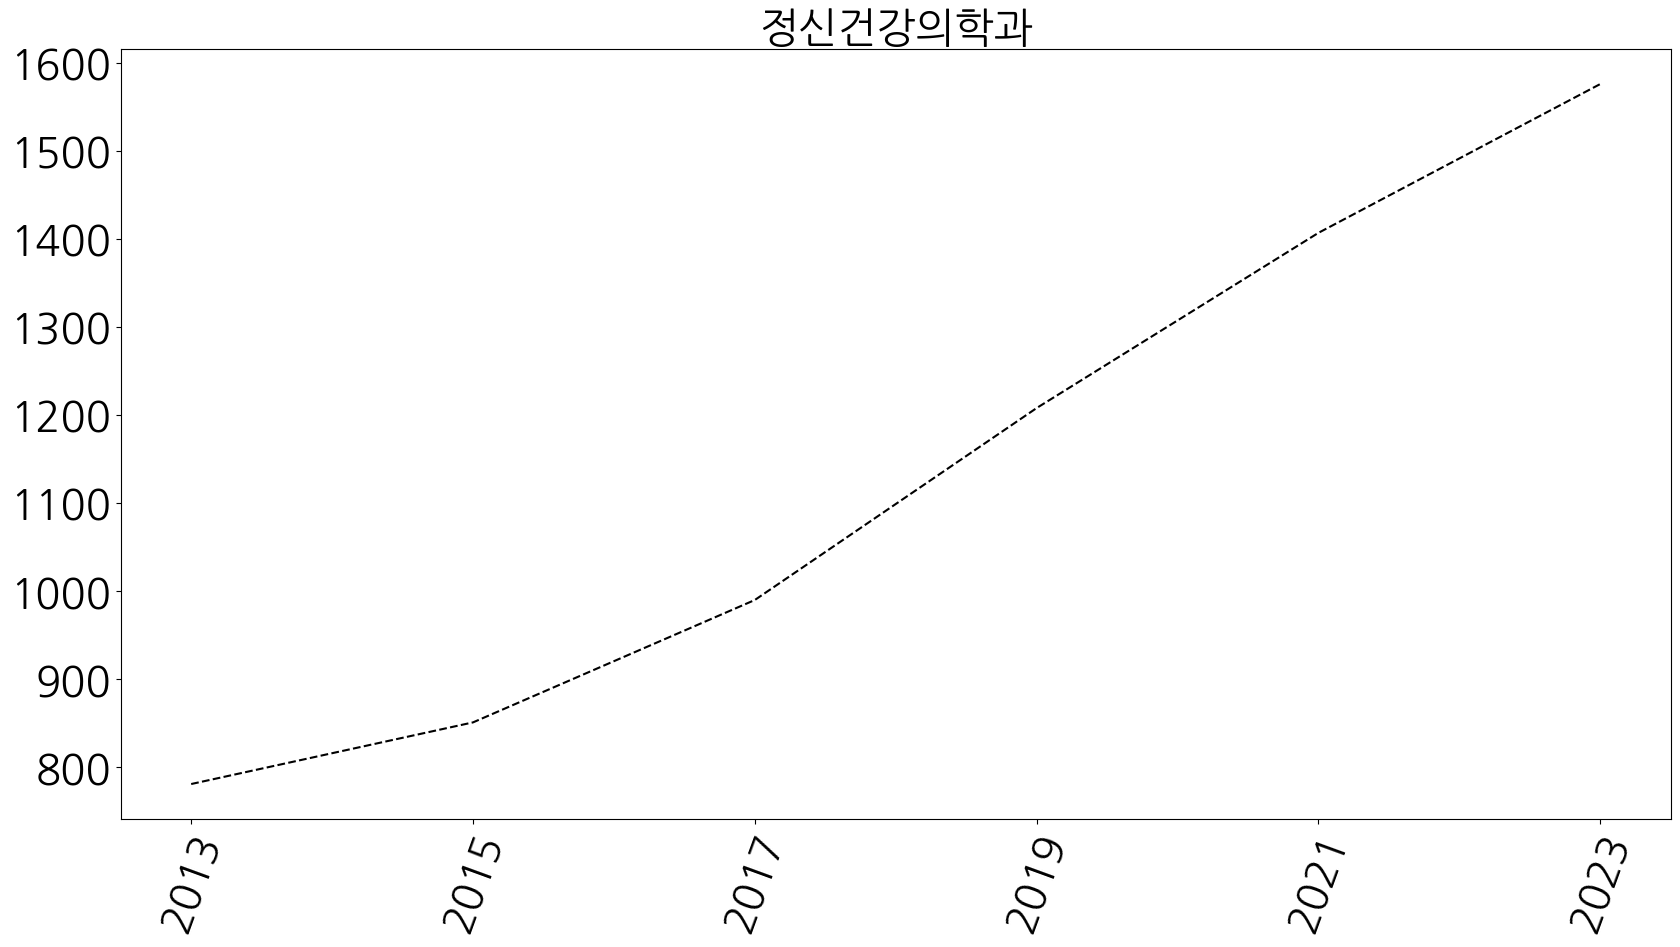

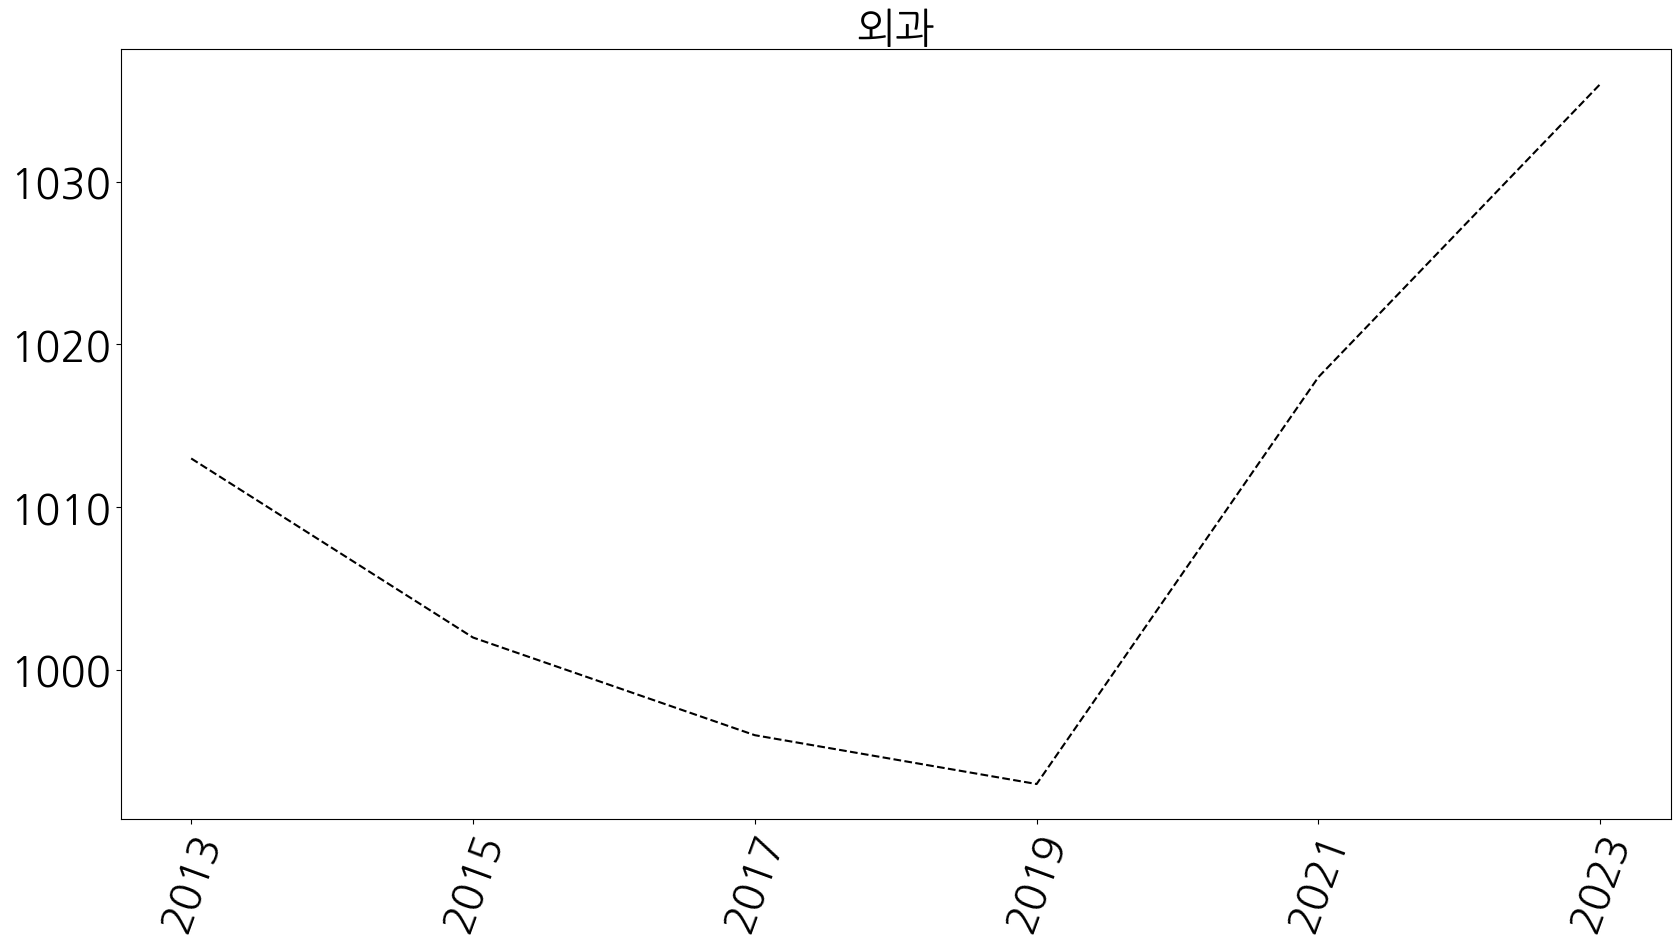

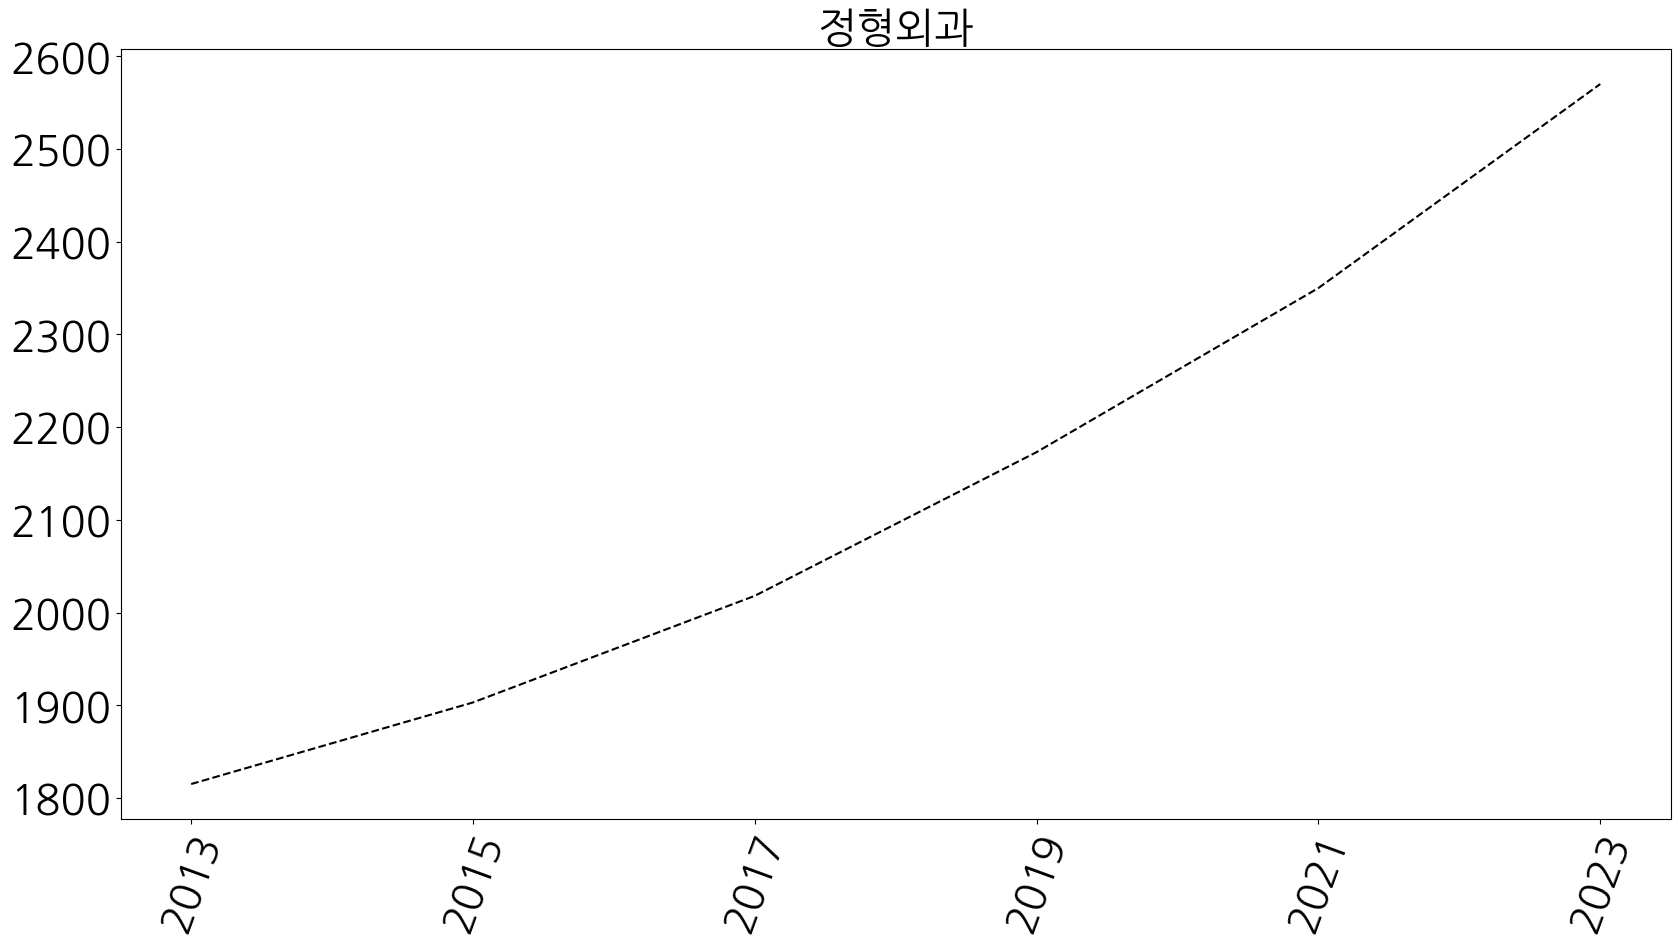

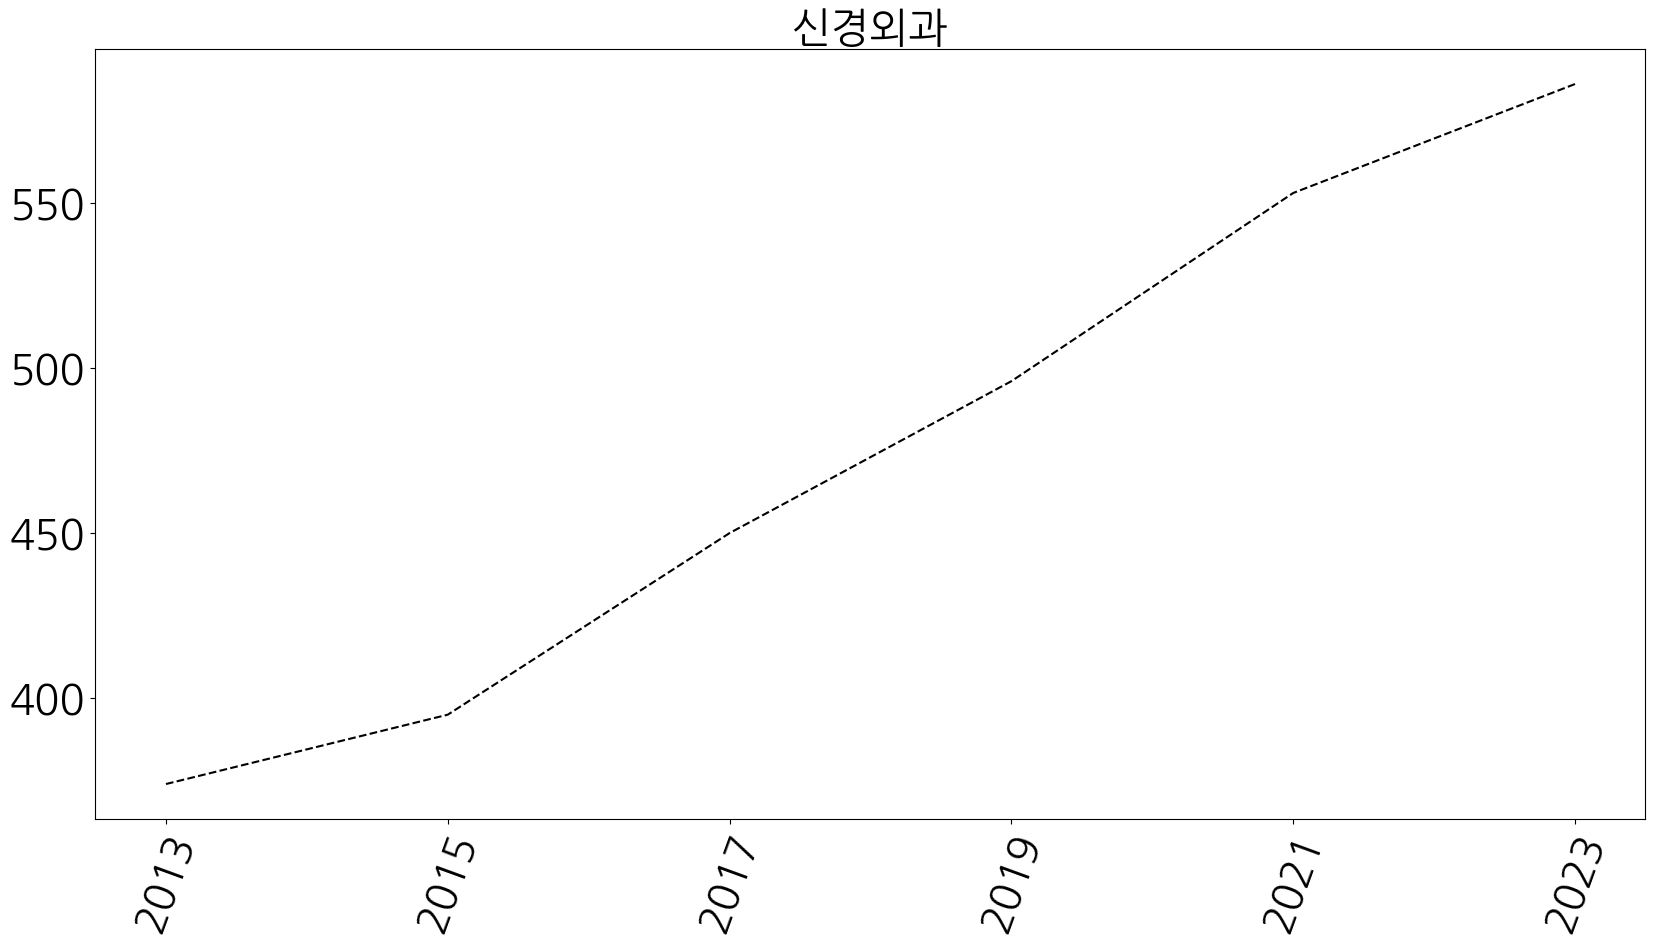

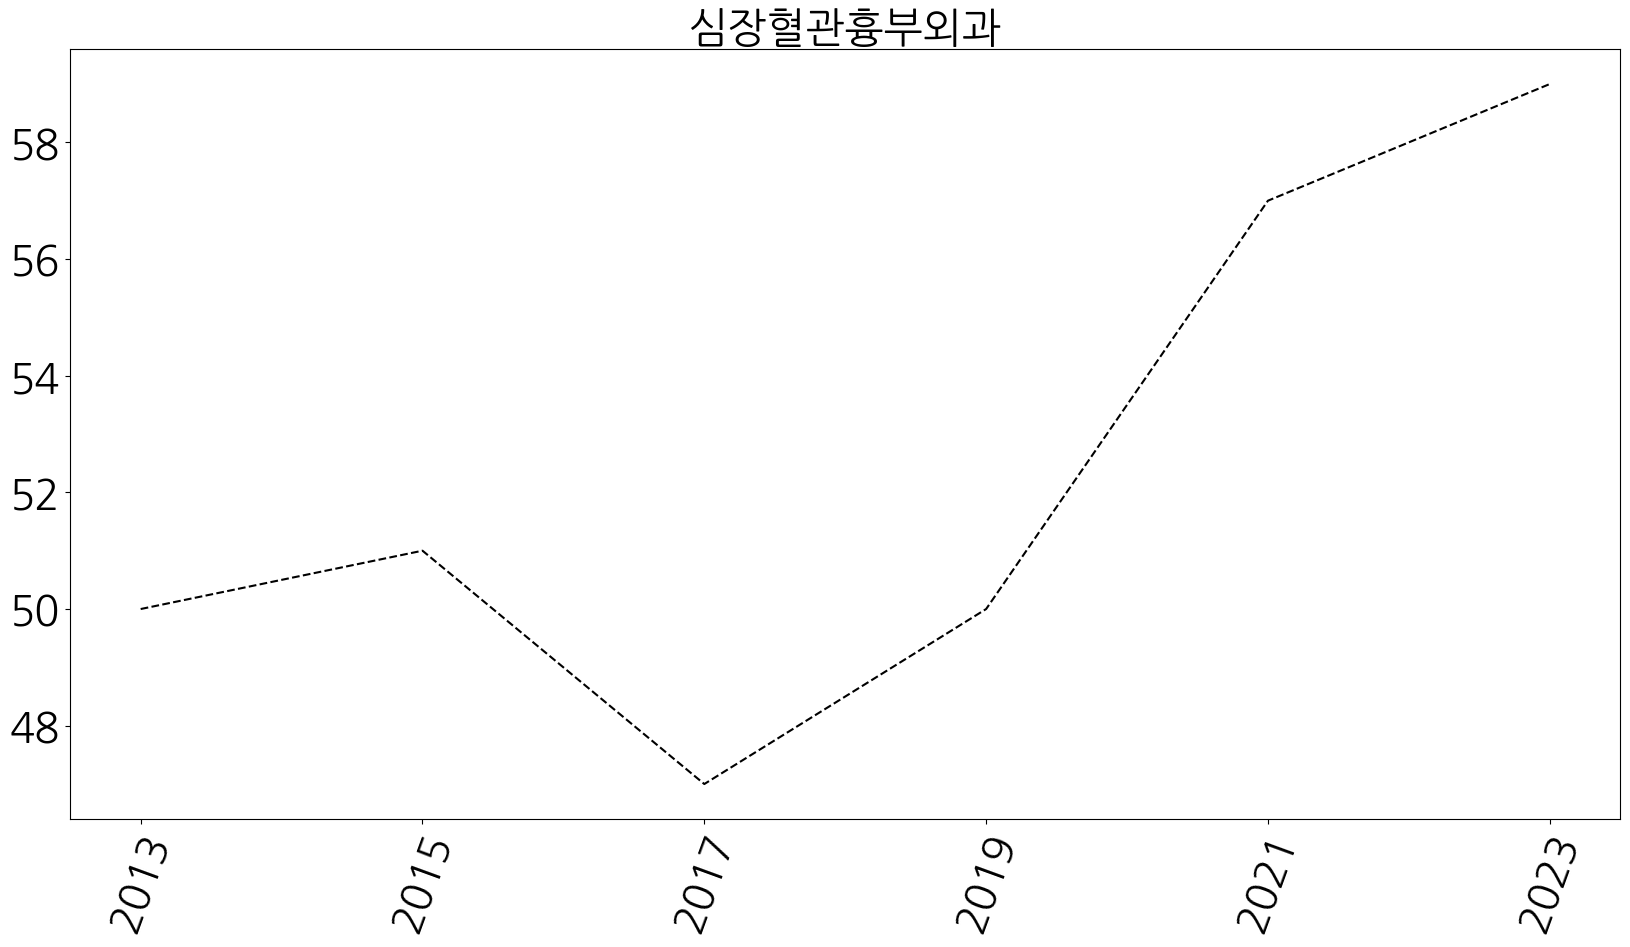

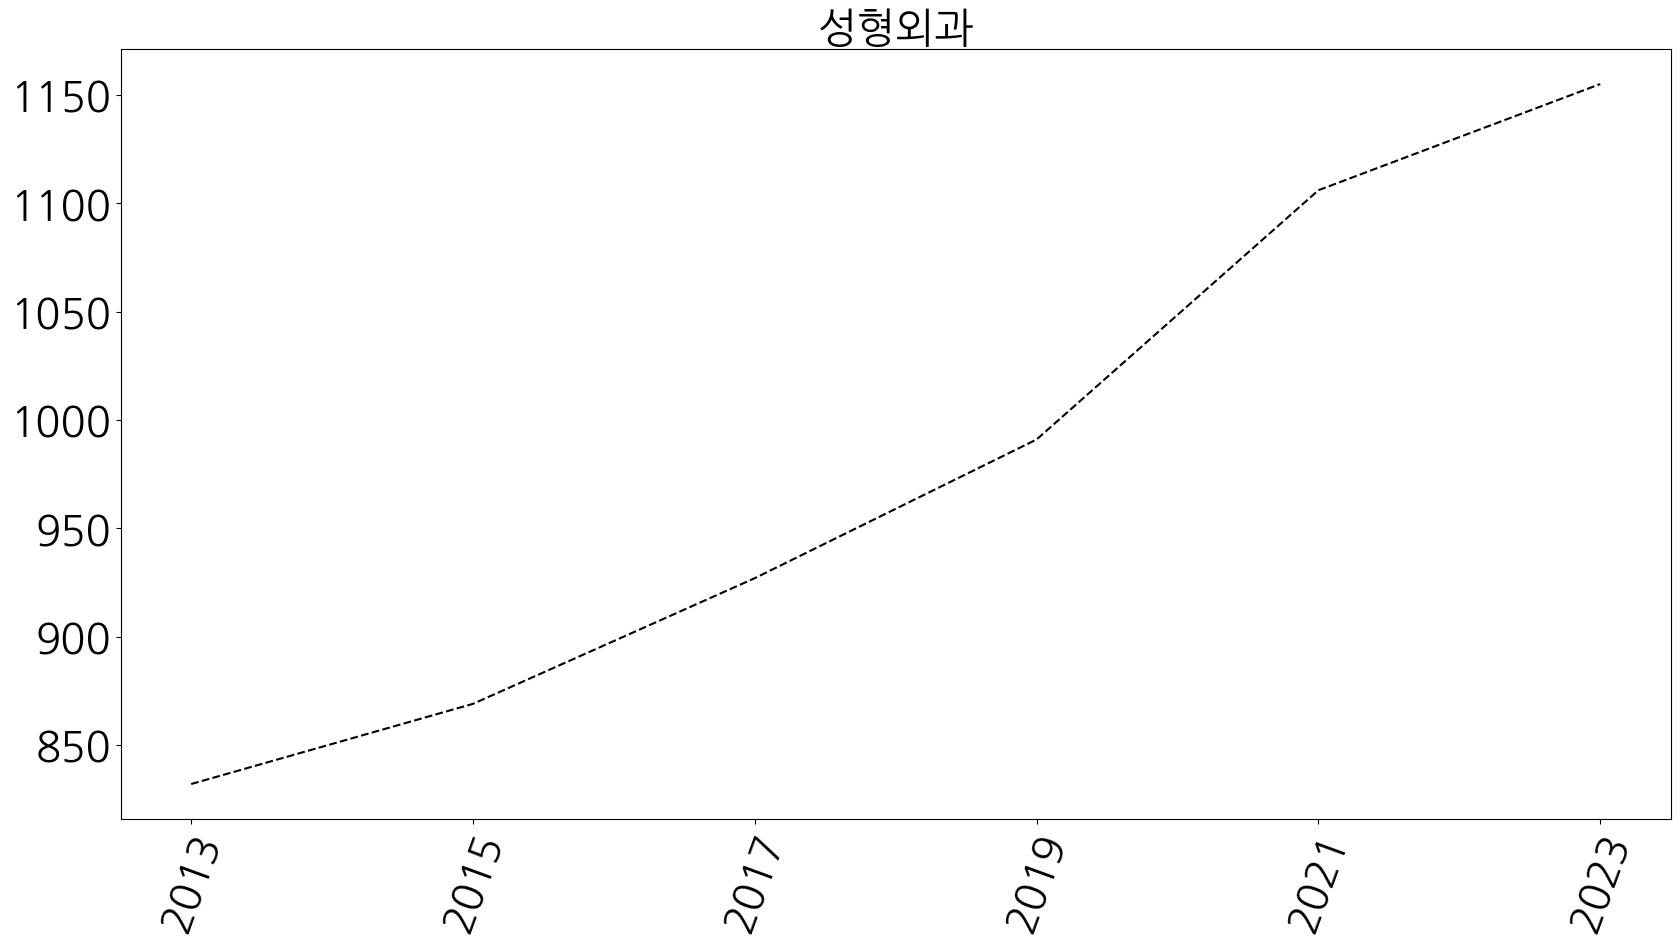

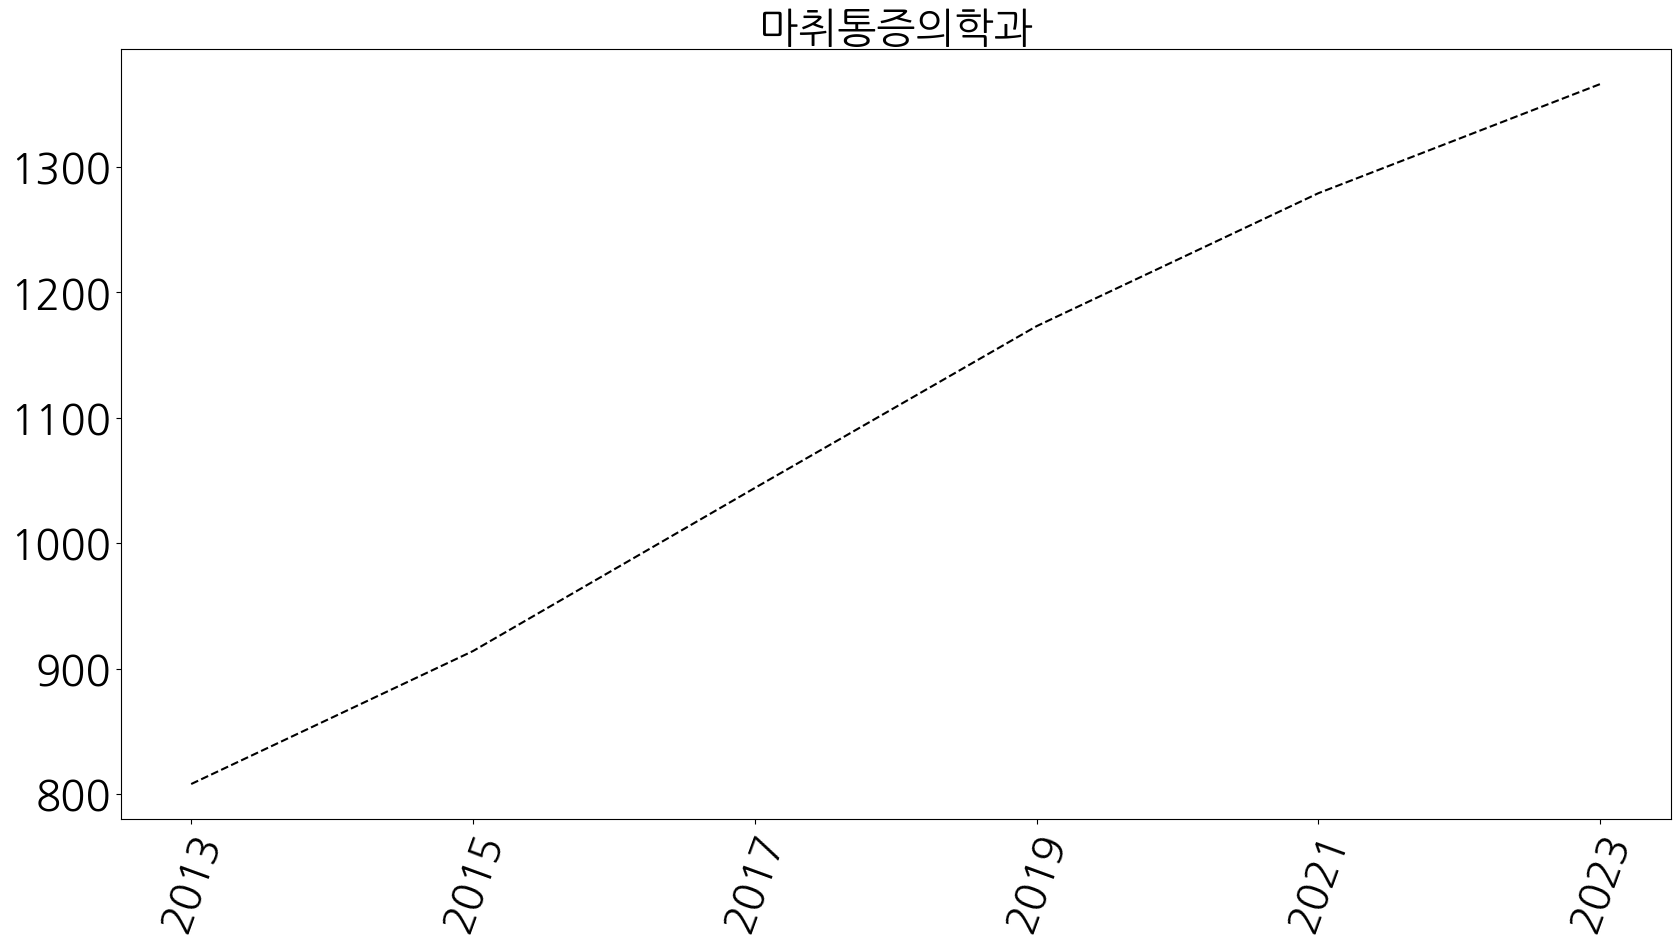

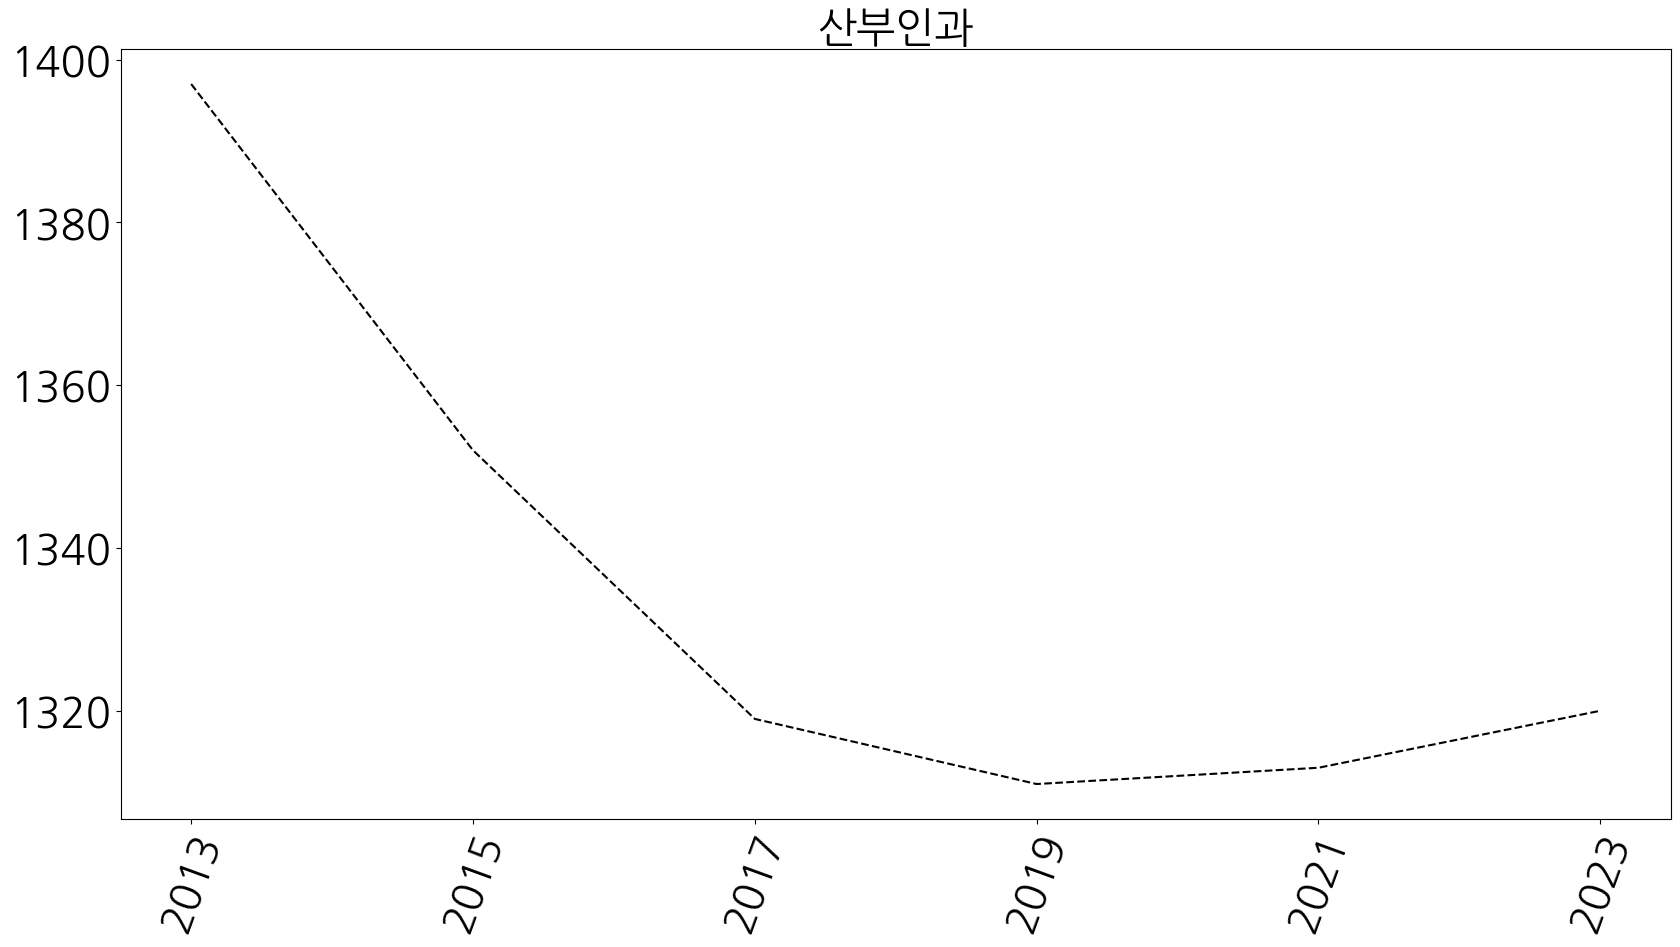

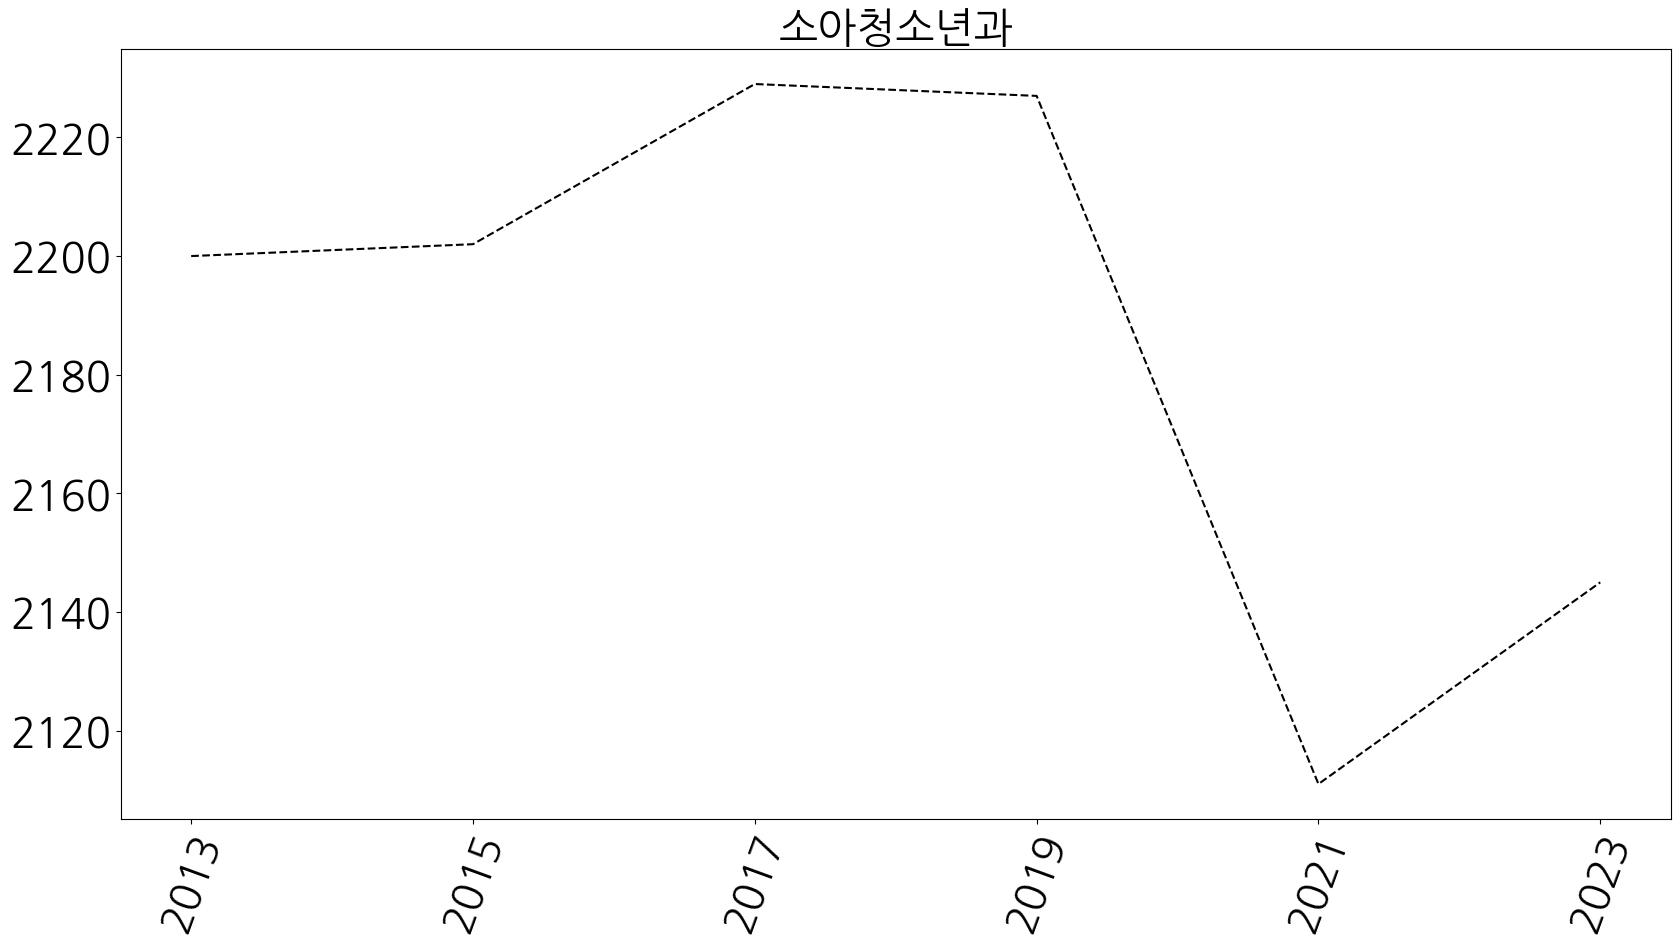

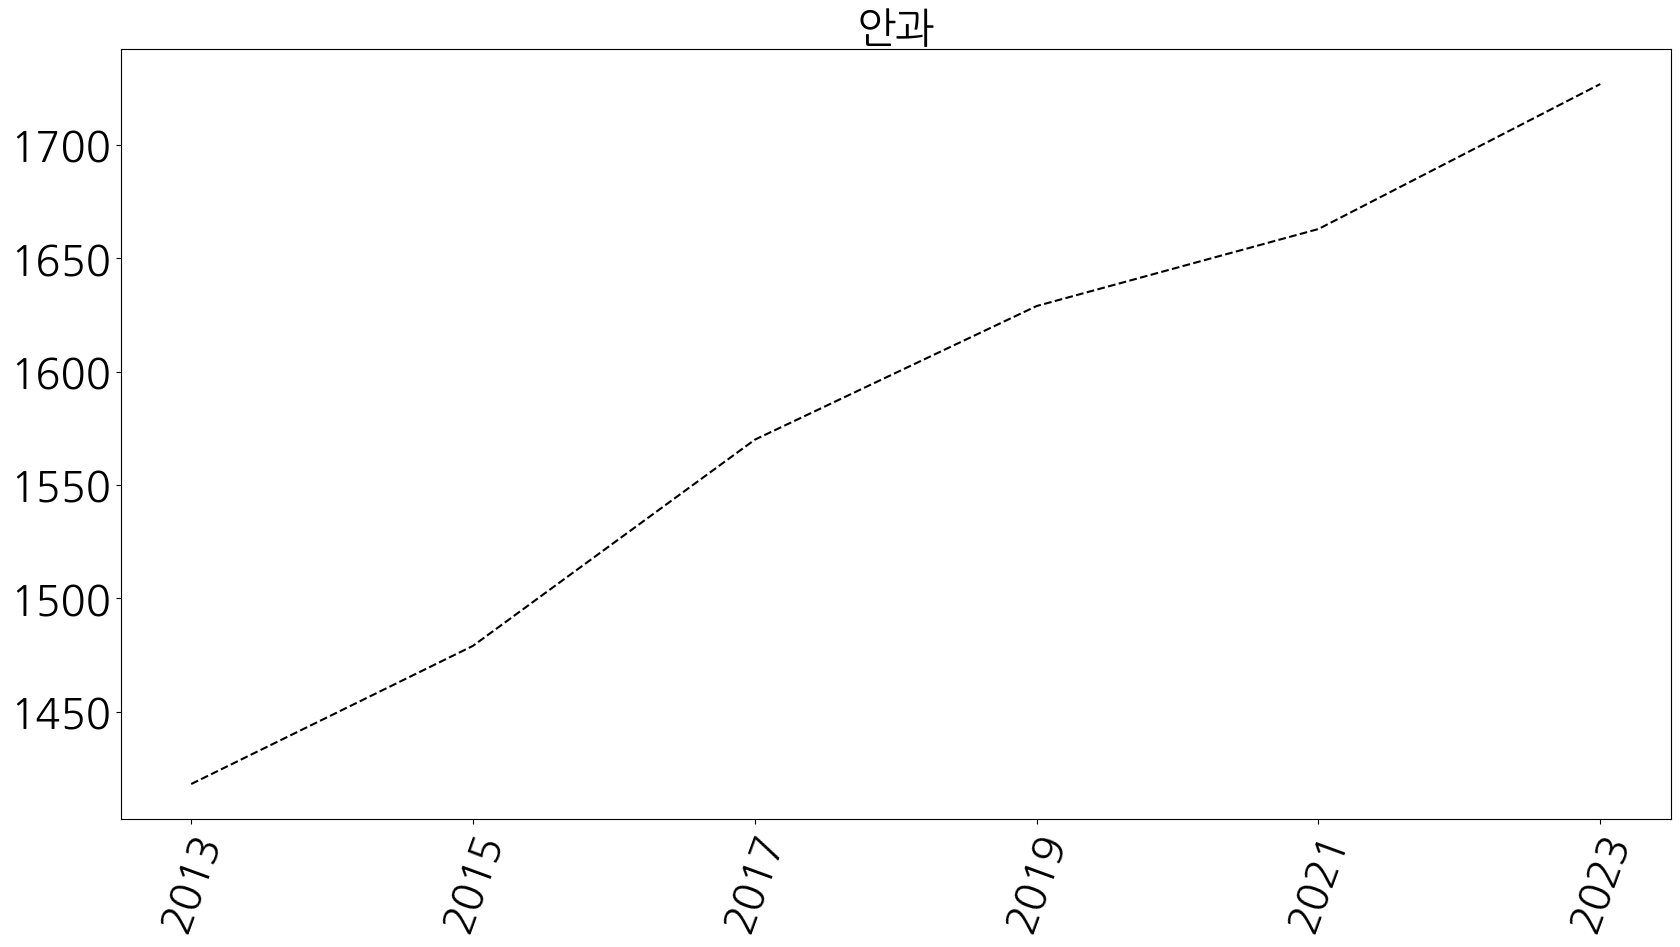

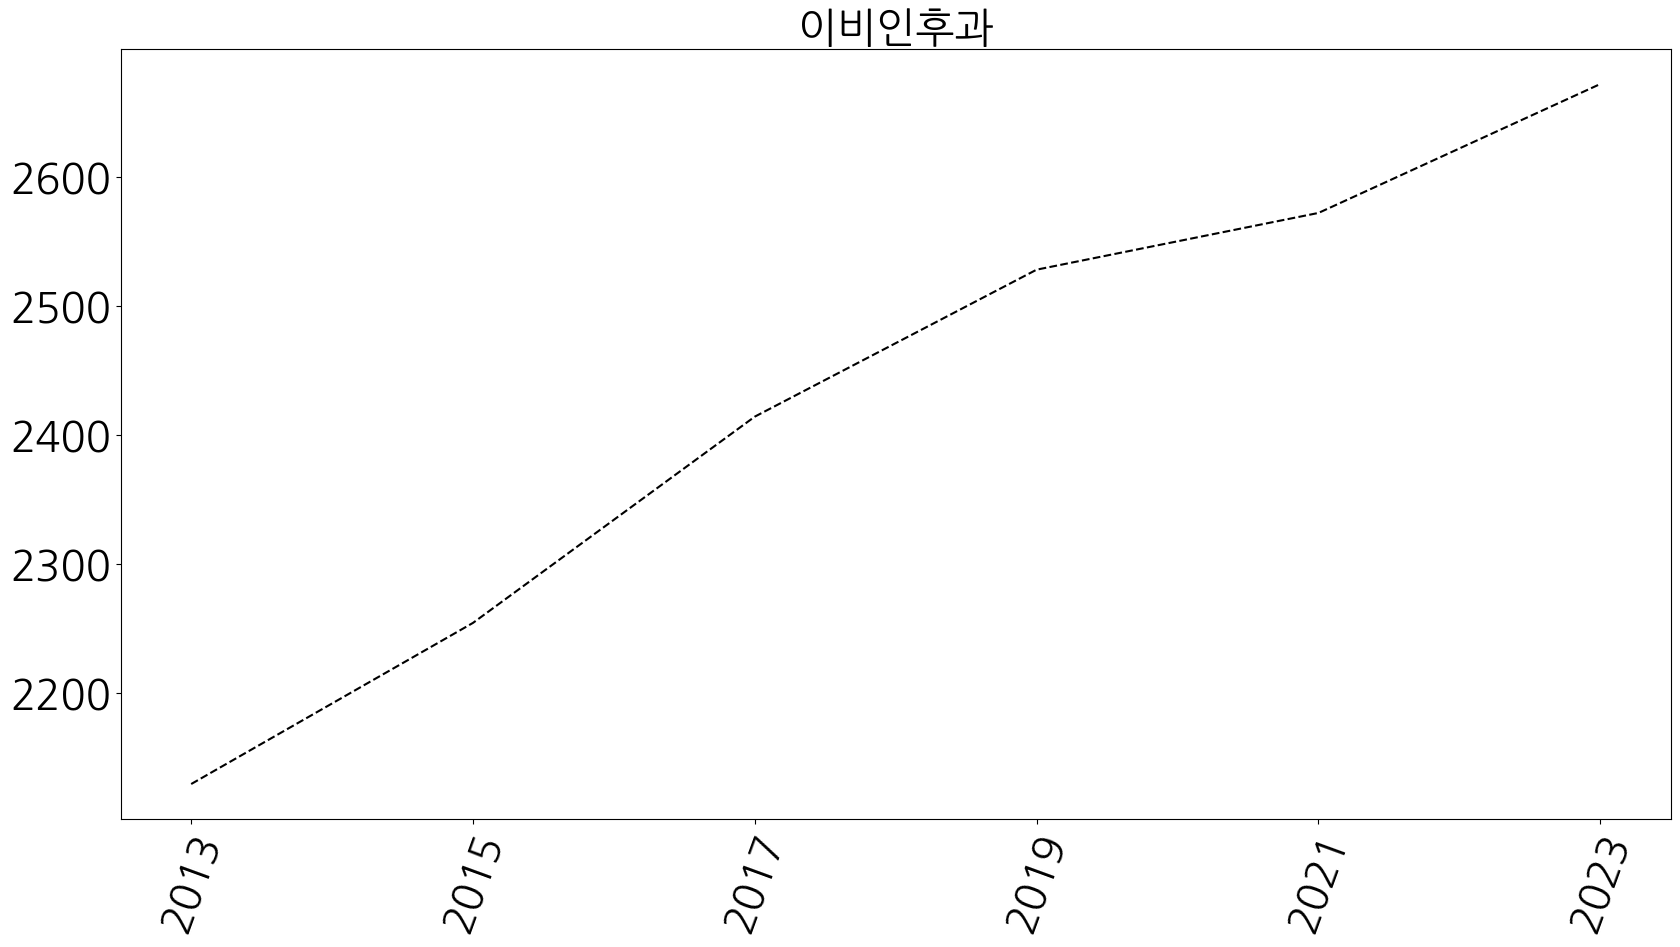

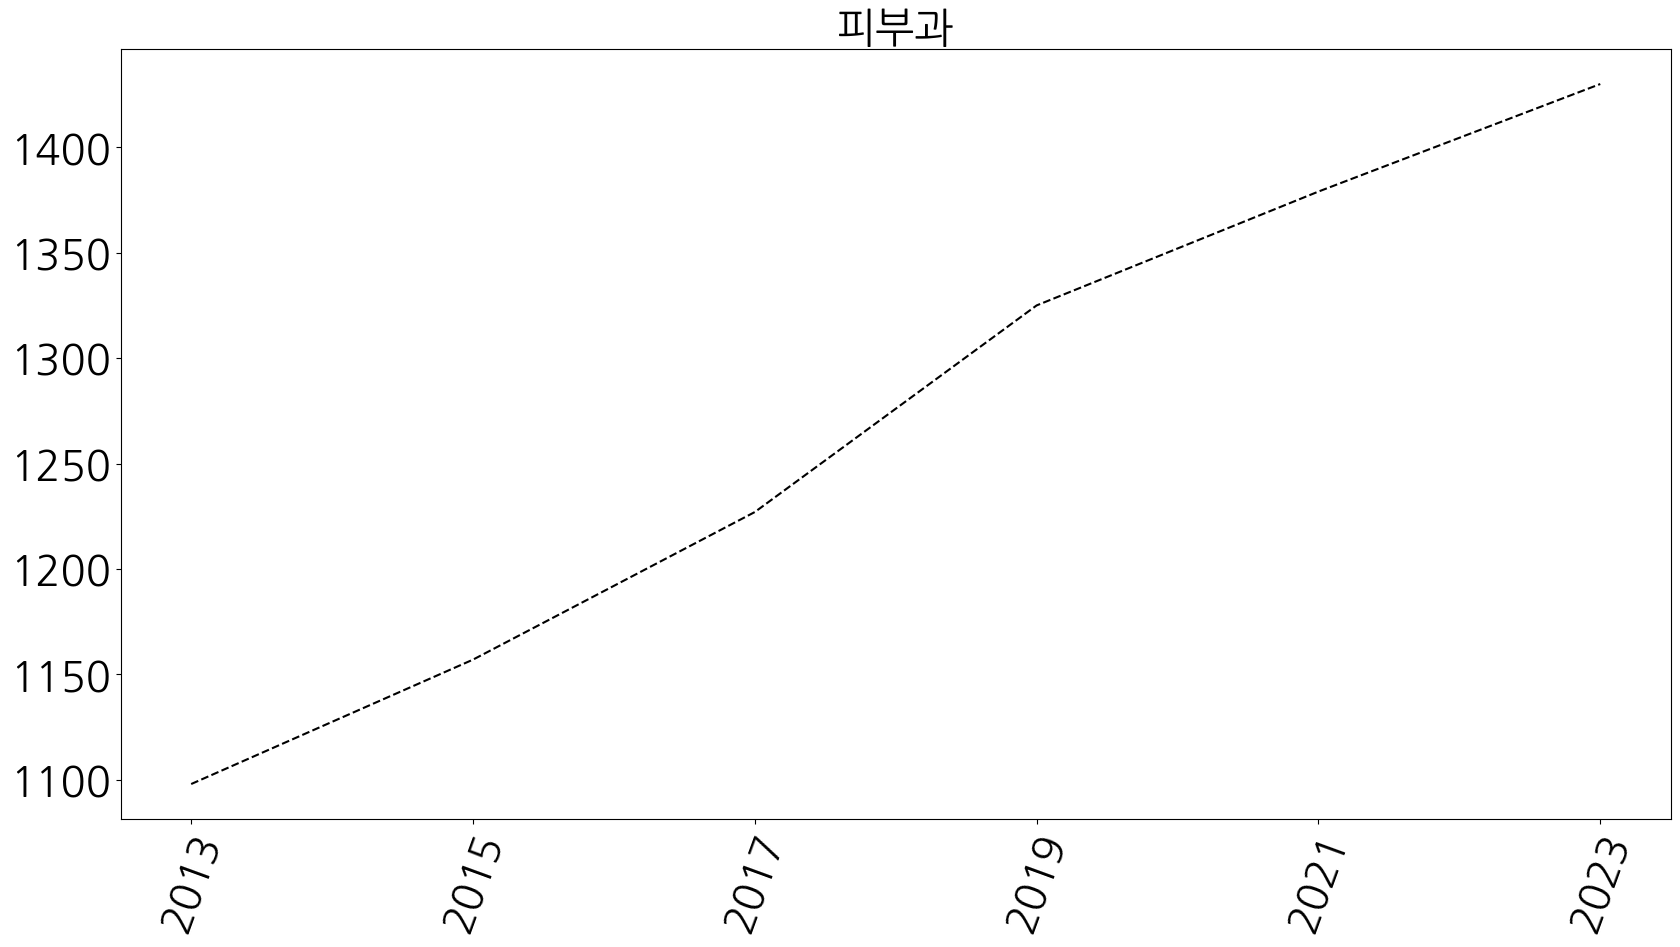

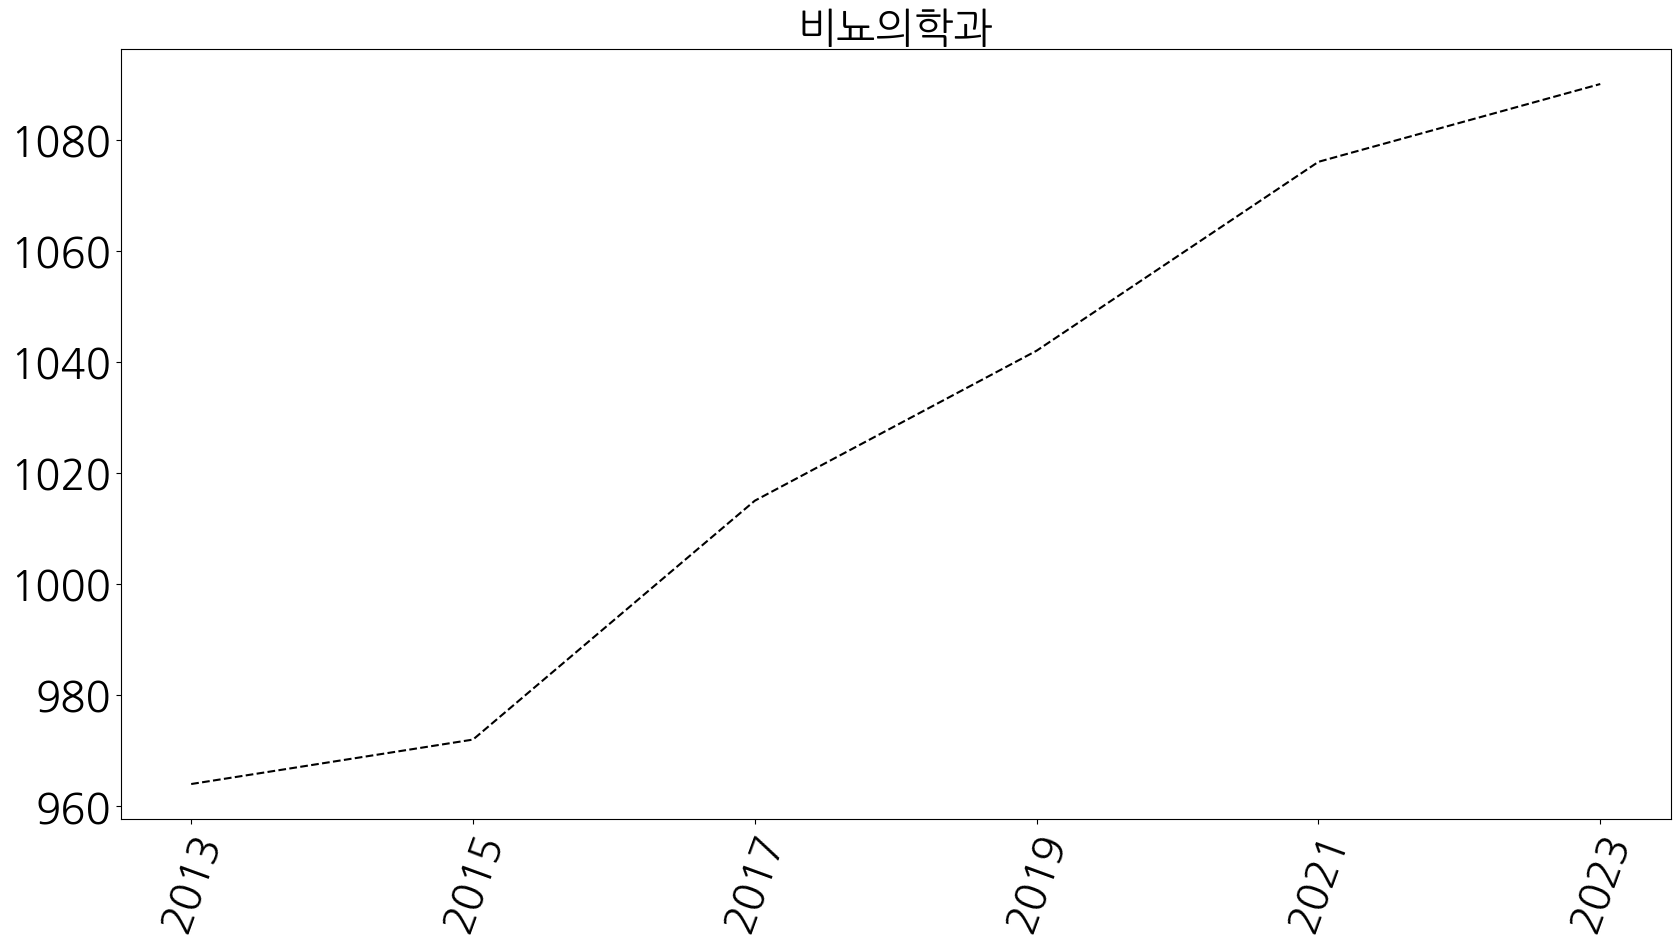

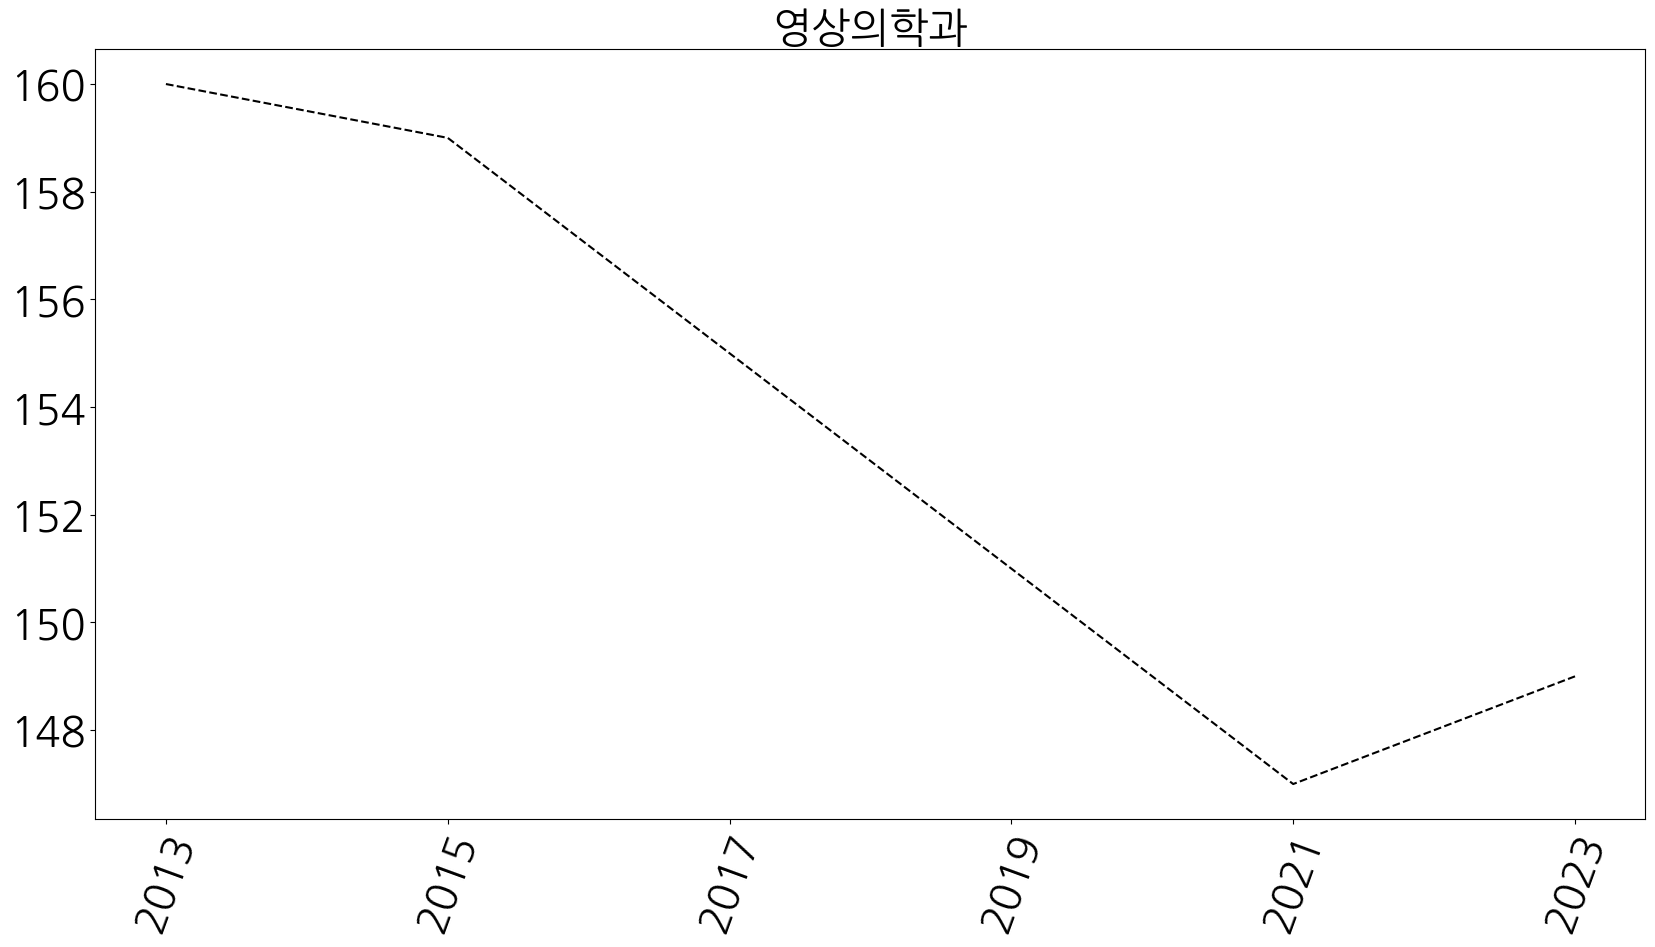

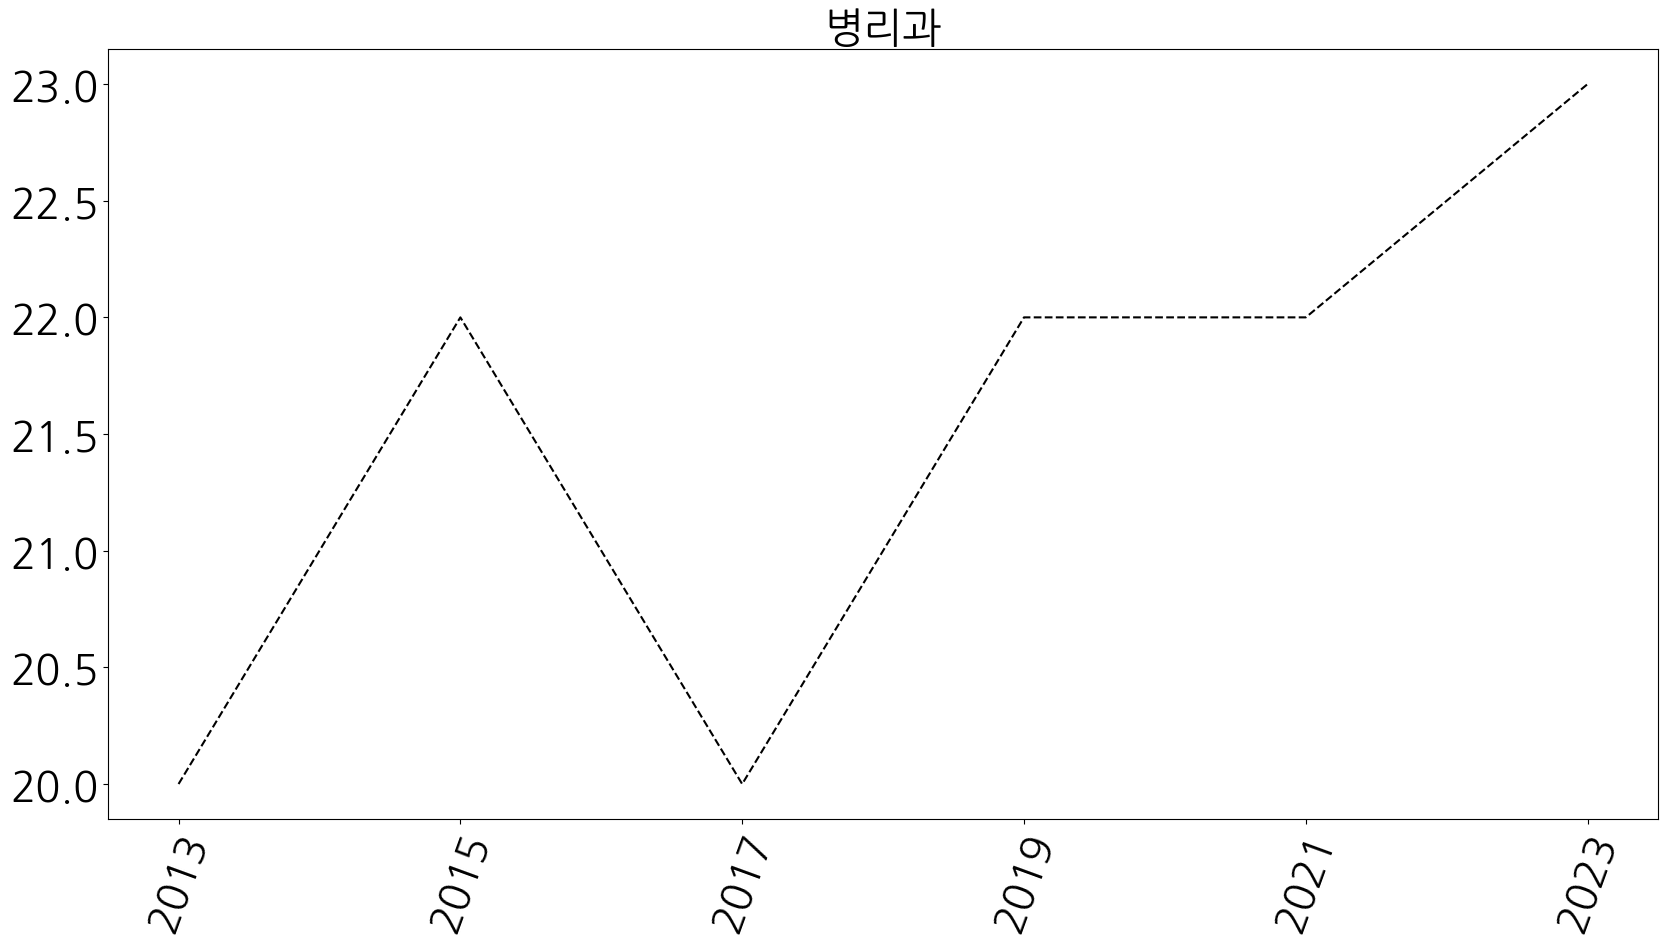

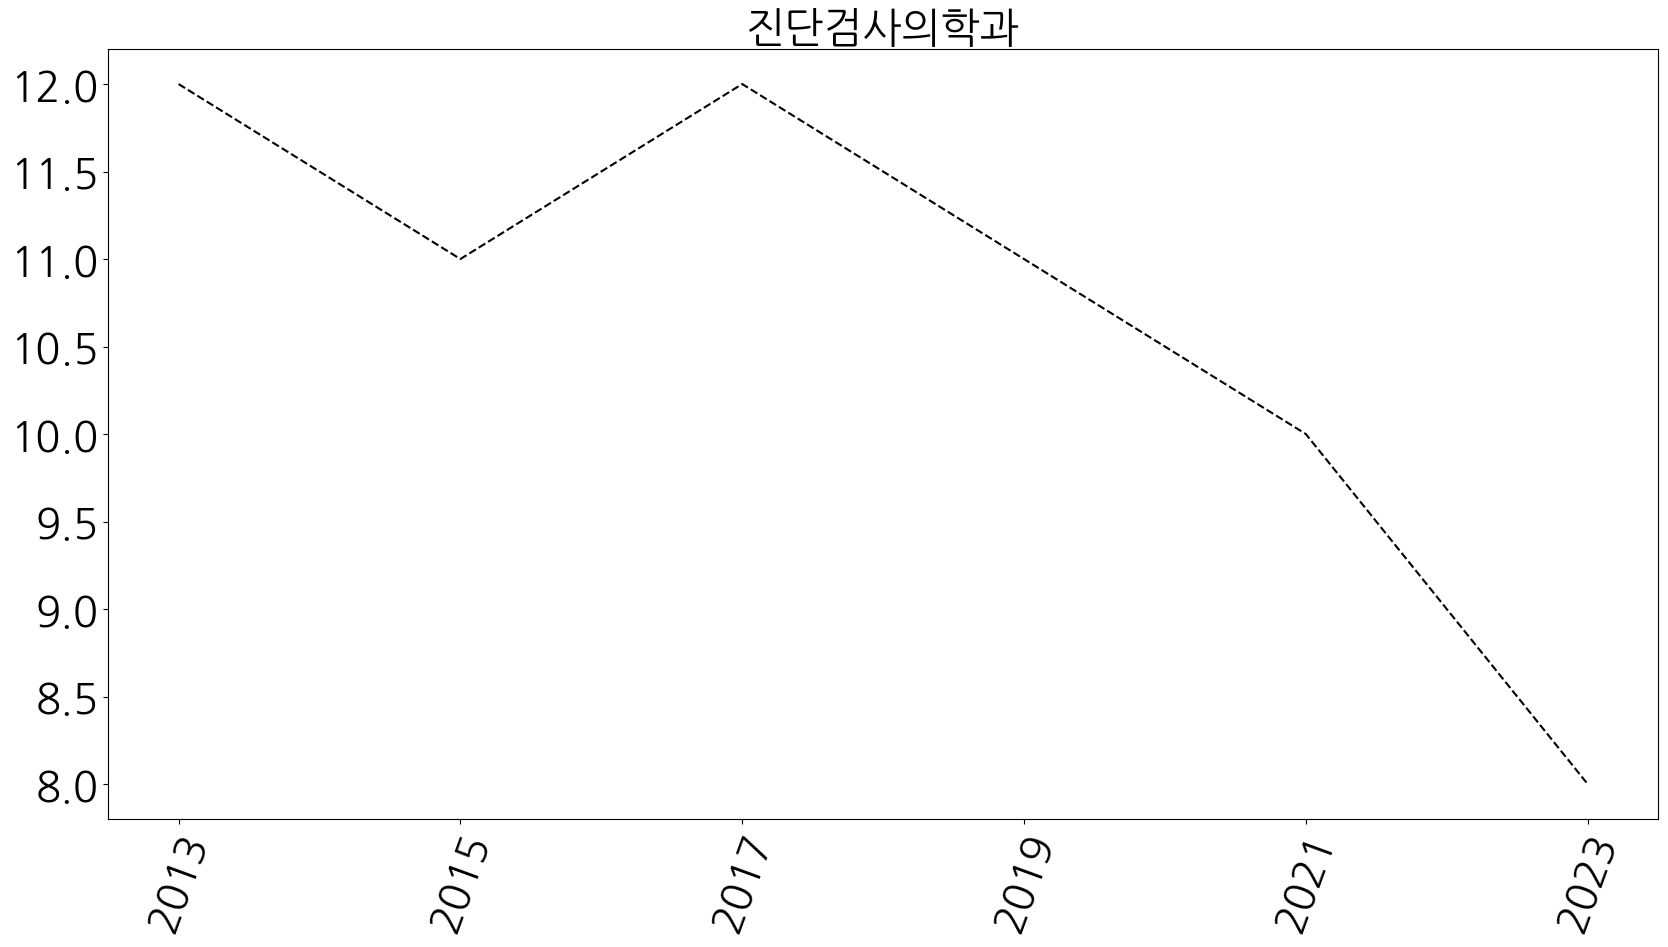

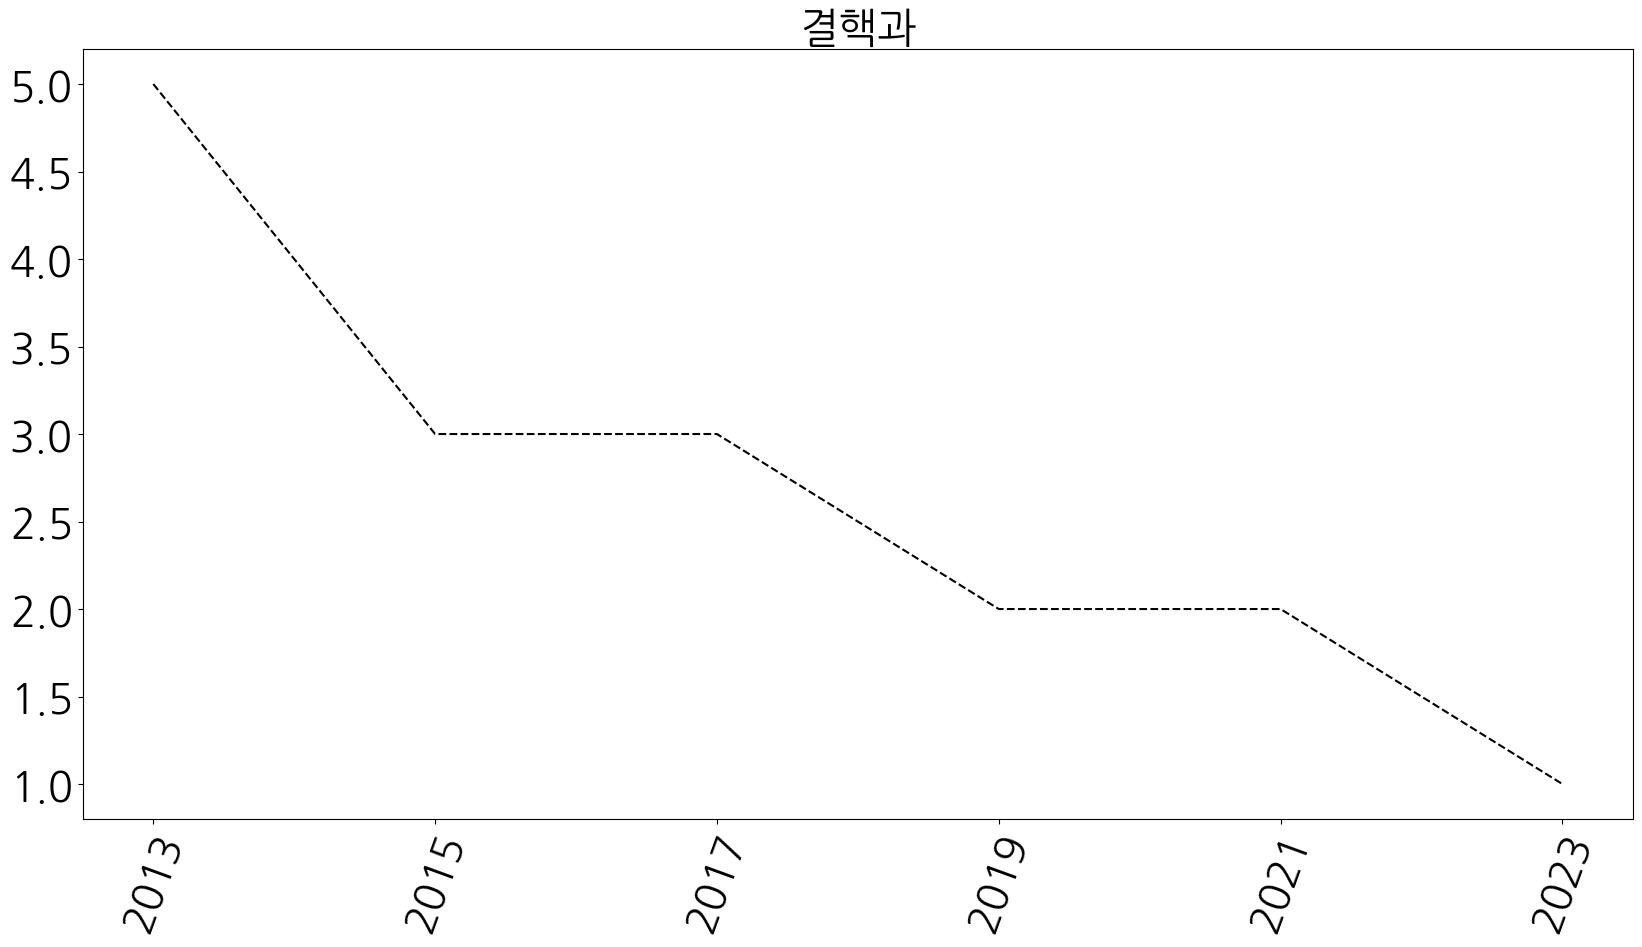

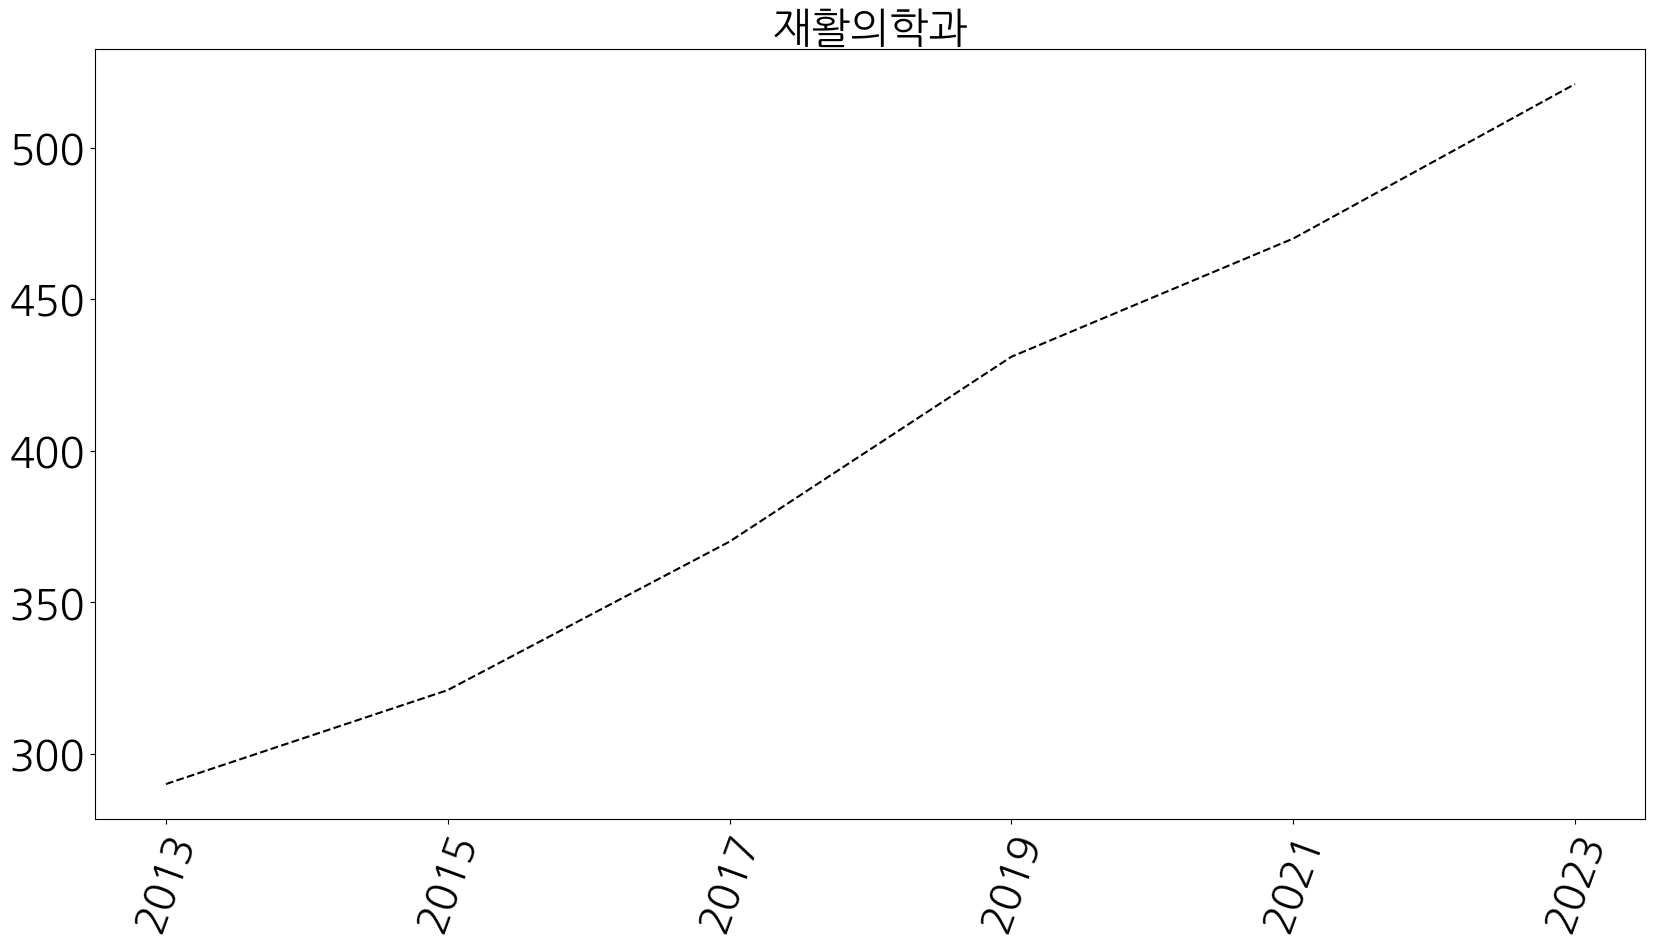

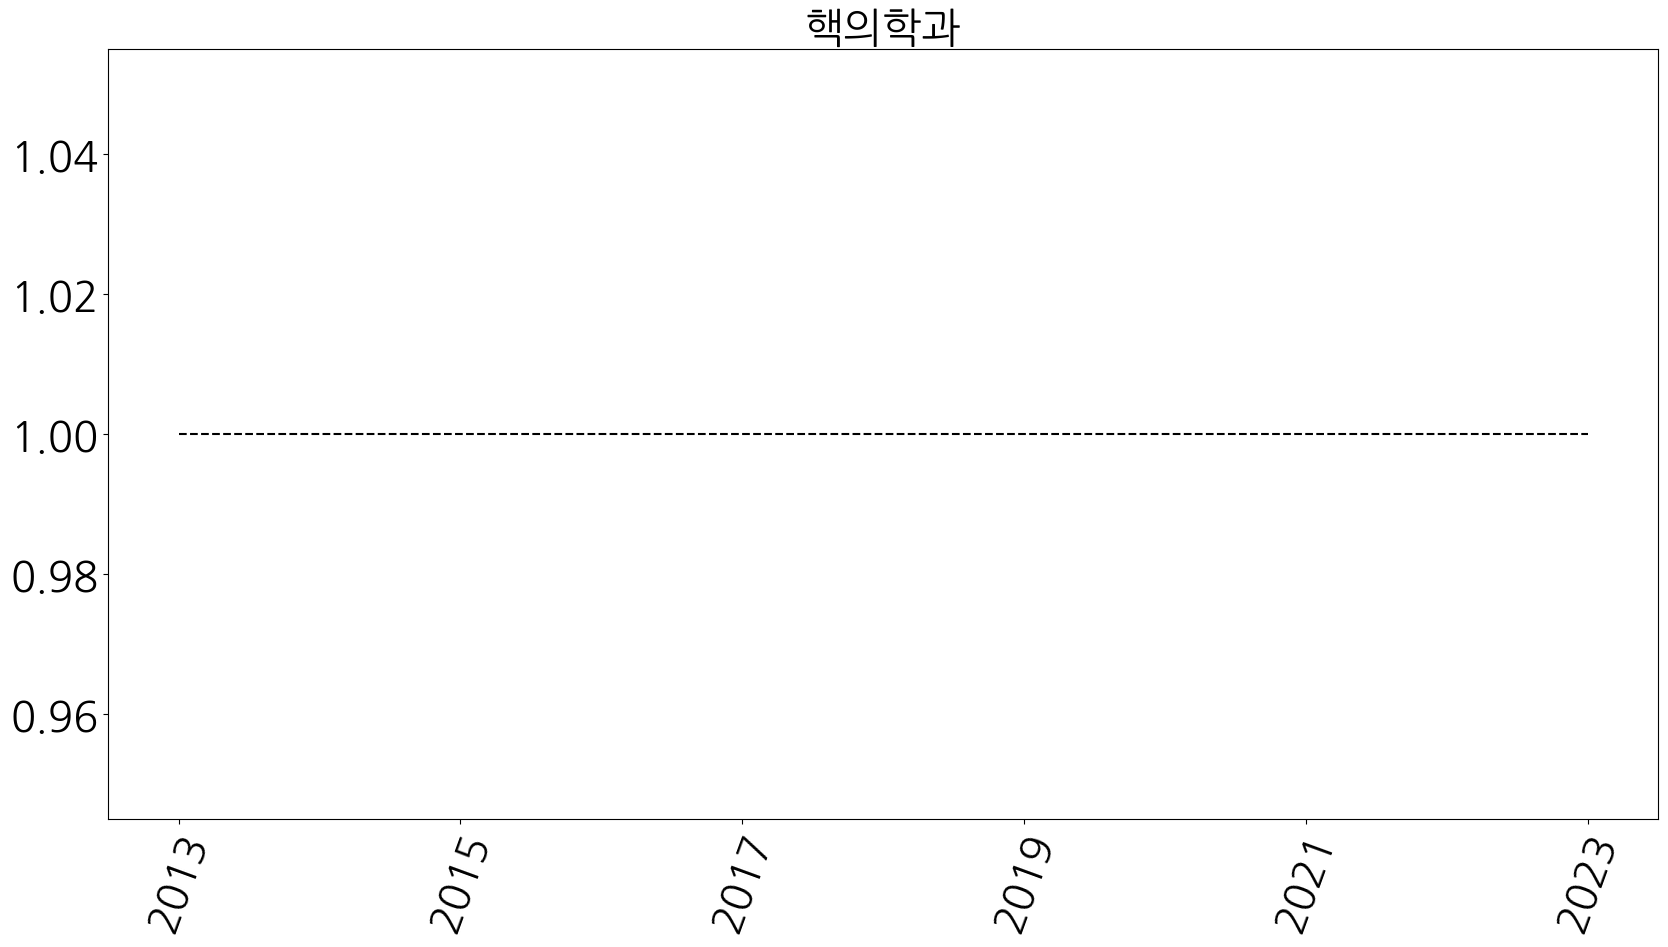

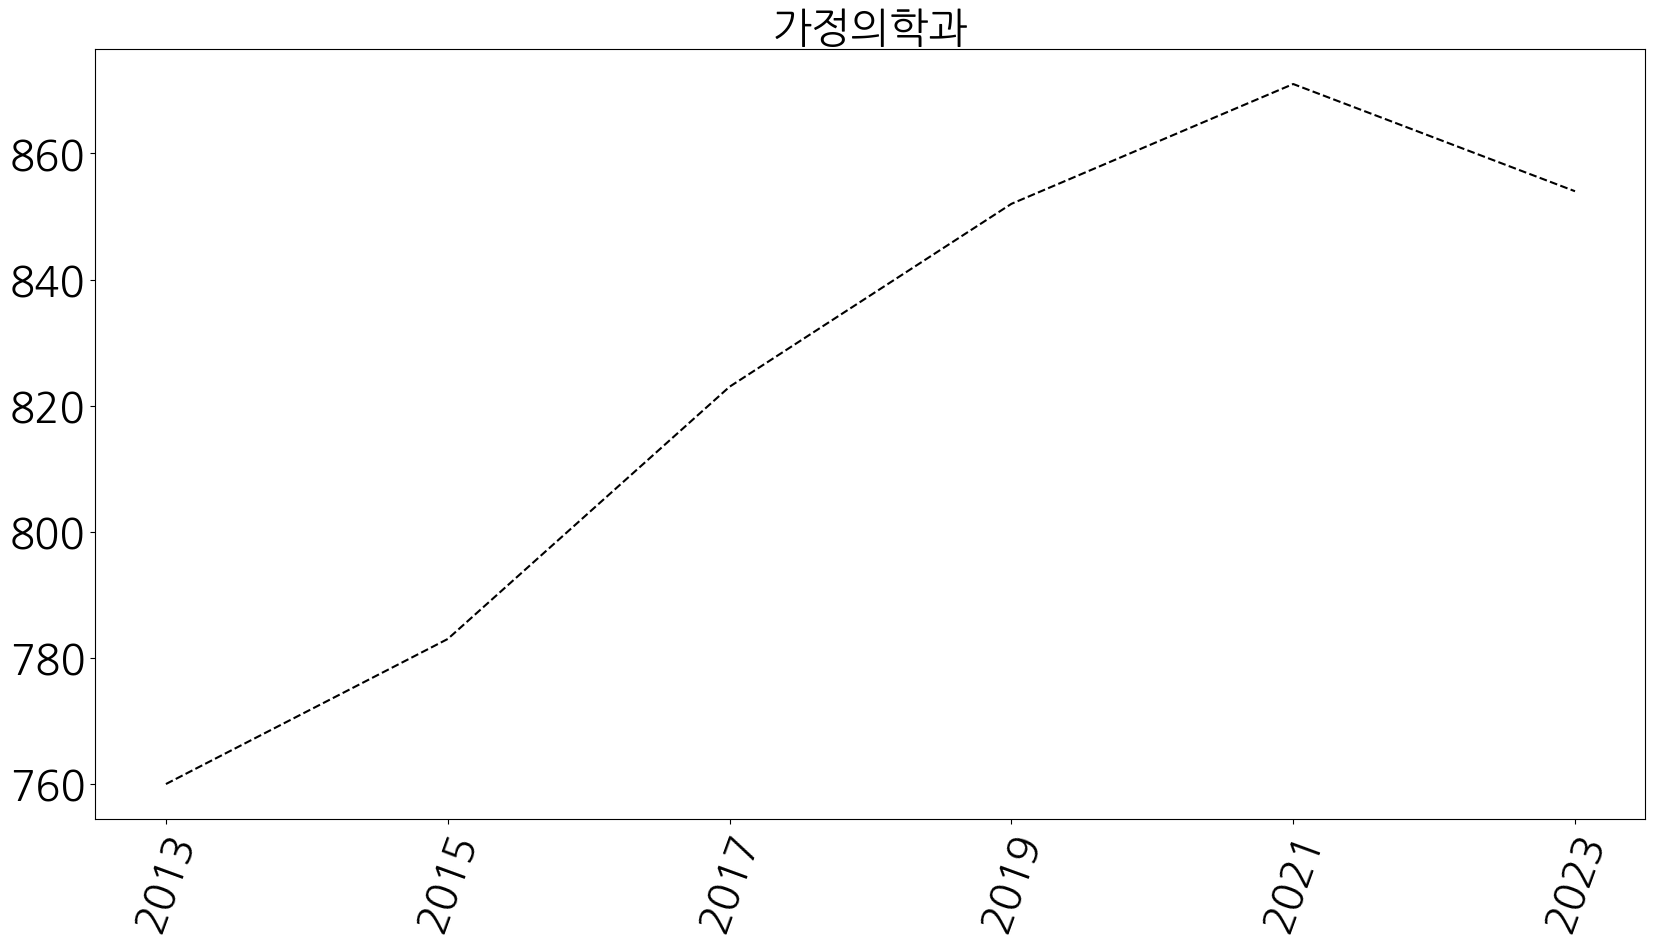

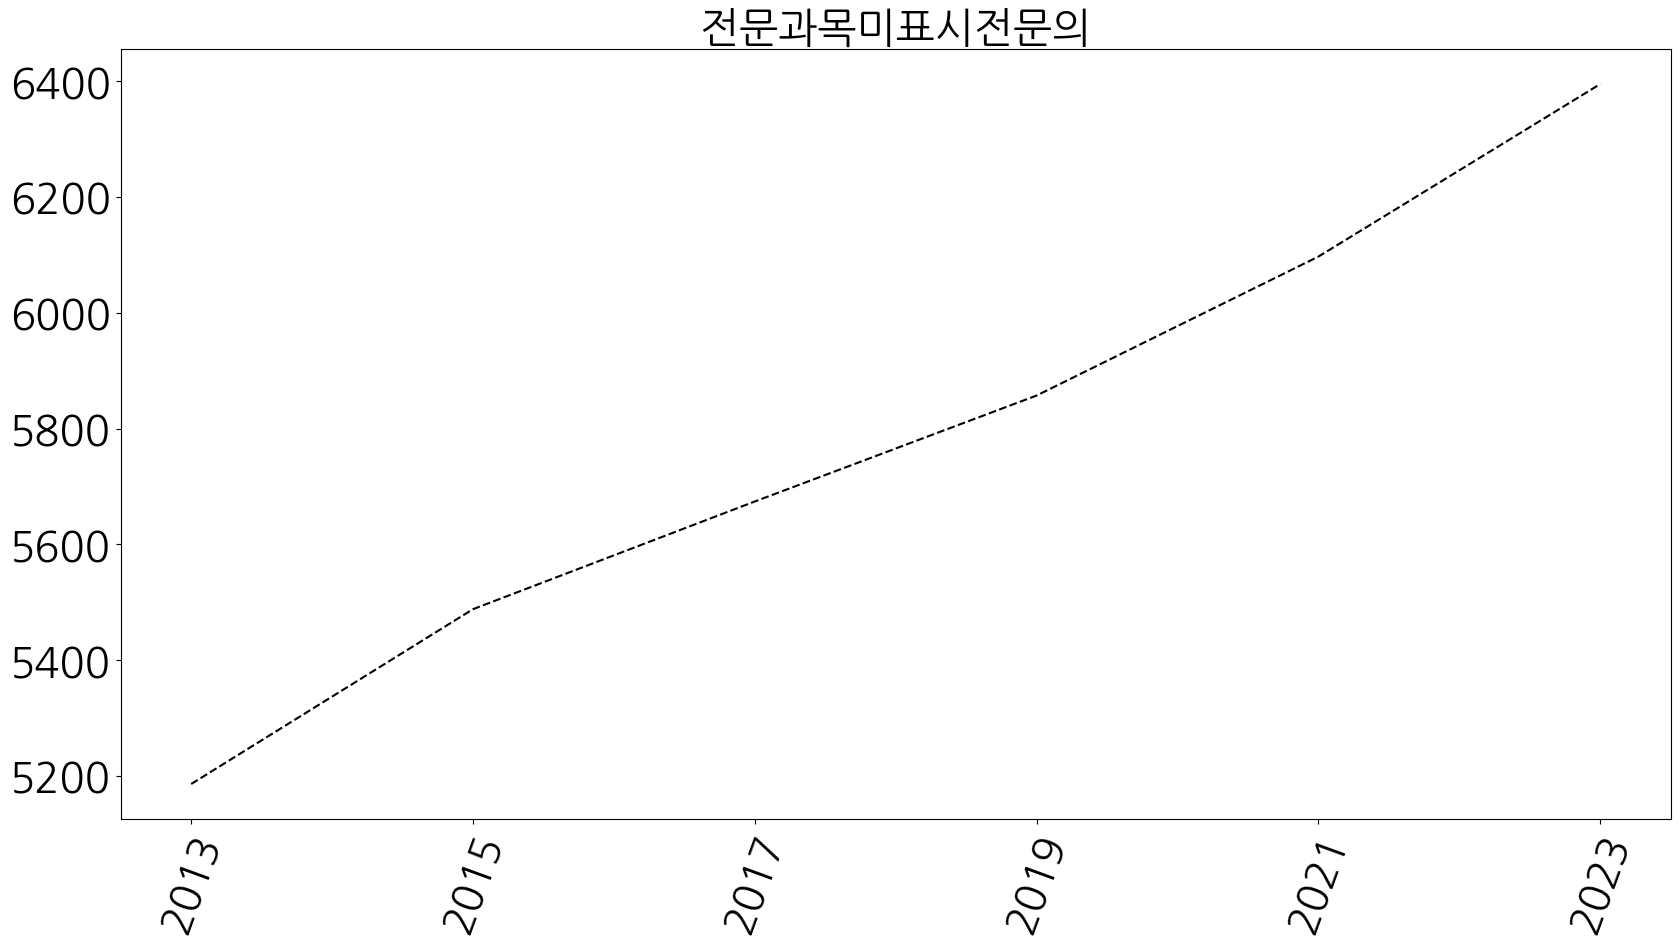

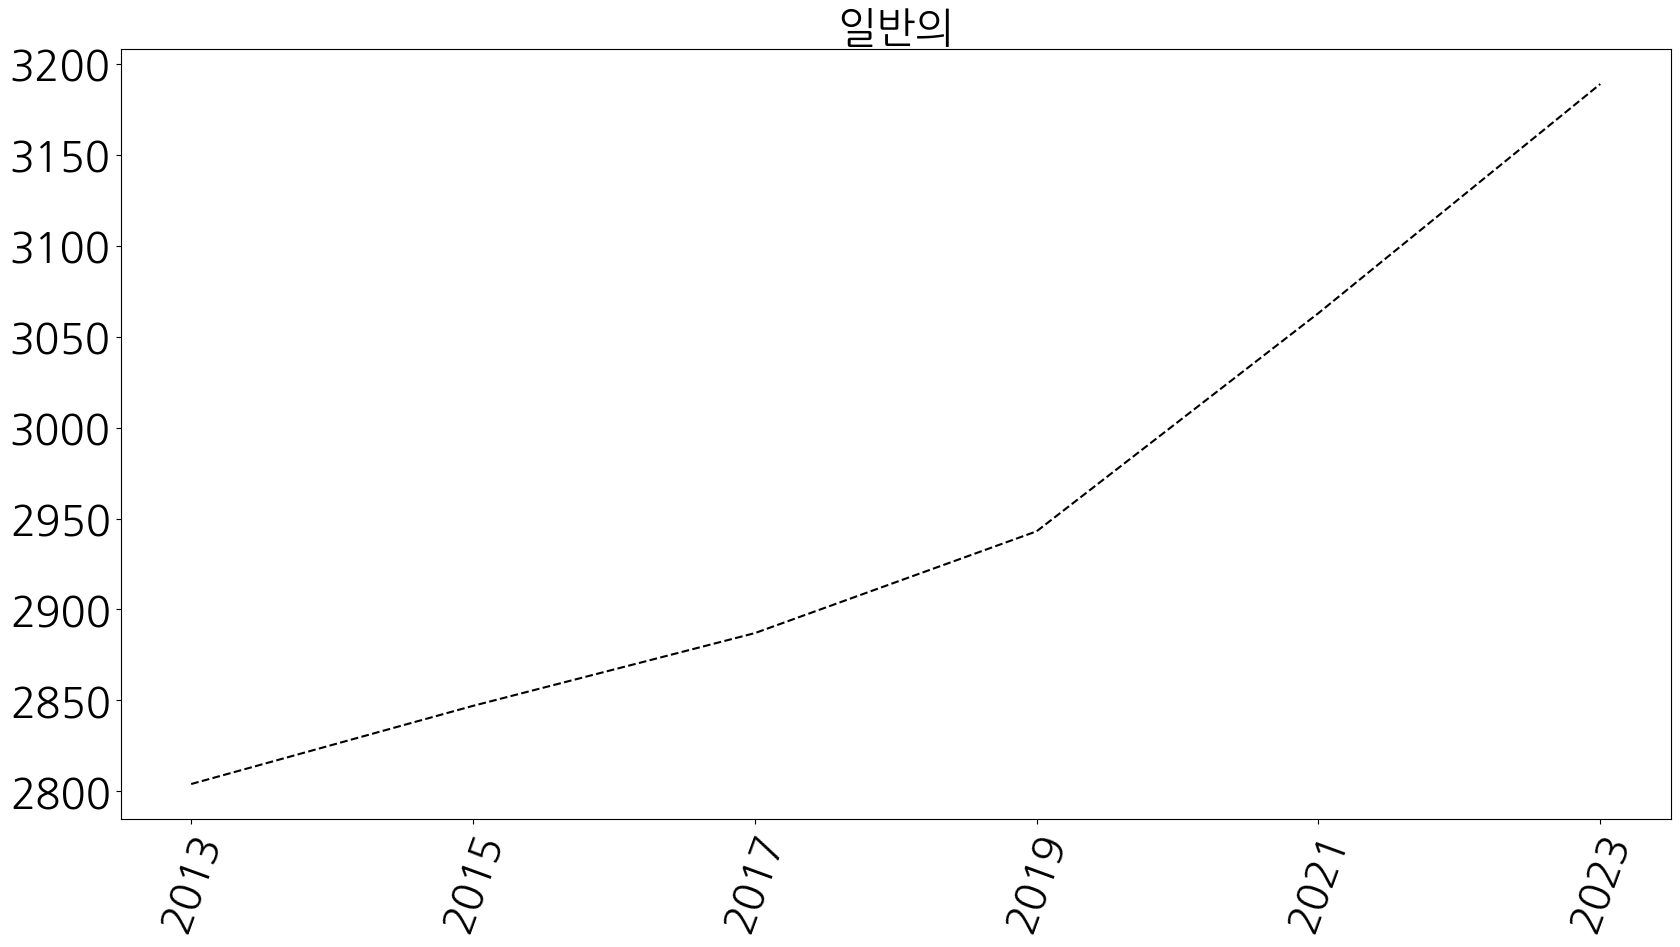

In [85]:
for i in range(len(df_list)):
    draw_graph(df_list[i], name_list[i])

# <hr> multi bar

In [171]:
def draw_graph2(df, name):
    plt.figure(figsize=(15, 7))
    # x = group_area.index.to_list()
    x = ["2013", "2015", "2017", "2019", "2021", "2023"]
    y = df.iloc[0].to_list()
    # 'gold', 'b', '#FF0000', 'green'
    # df_list[0].loc[["서울특별시", "부산광역시", "대구광역시", "경기도"]]
    # 서울 경기 부산 대구 
    sum = 0
    p1 = plt.bar(x, df.loc["대구광역시"], color='yellowgreen', label = "대구광역시")
    sum += df.loc["대구광역시"]
    p2 = plt.bar(x, df.loc["부산광역시"], color='gold', bottom=sum, label = "부산광역시")
    sum += df.loc["부산광역시"]
    p3 = plt.bar(x, df.loc["경기도"], color='cornflowerblue', bottom=sum, label = "경기도")
    sum += df.loc["경기도"]
    p4 = plt.bar(x, df.loc["서울특별시"], color='pink' ,bottom=sum, label = "서울특별시")
    sum += df.loc["서울특별시"]
    
    # plt.xticks(rotation=70)
    # plt.ylim(220000, 350000)
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    
    plt.title(name, size = 30)
    # 숫자 넣는 부분
    idx = 0
    '''
    for rect in bar:
        height = rect.get_height()
        if idx < 8:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='top', size = 15, rotation=90)
        else:    
            plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=90)
        idx += 1
    
    plt.text(rect.get_x() + rect.get_width()/2.0, avg, f"평균:{round(avg)}", ha='center', va='bottom', size = 15)
    '''
    plt.xlabel('연도', size = 15)
    plt.ylabel('개', size = 15)
    plt.legend(loc=2, fontsize=15, handles=[p4, p3, p2, p1])
    plt.show()

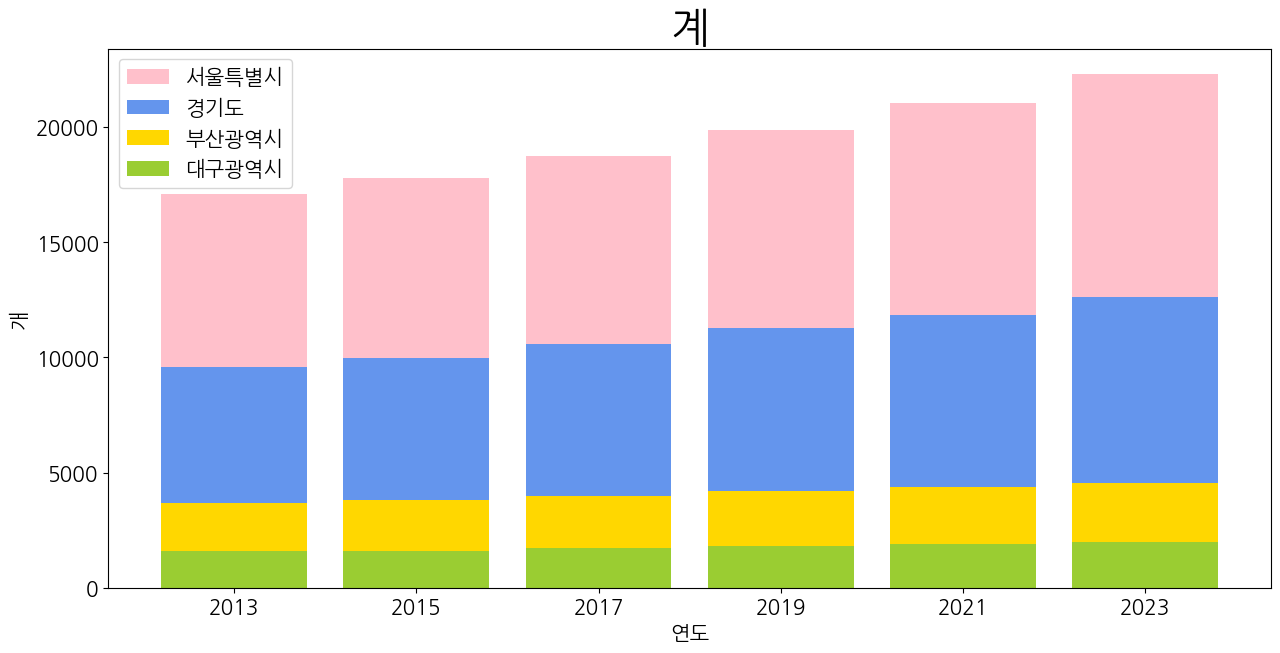

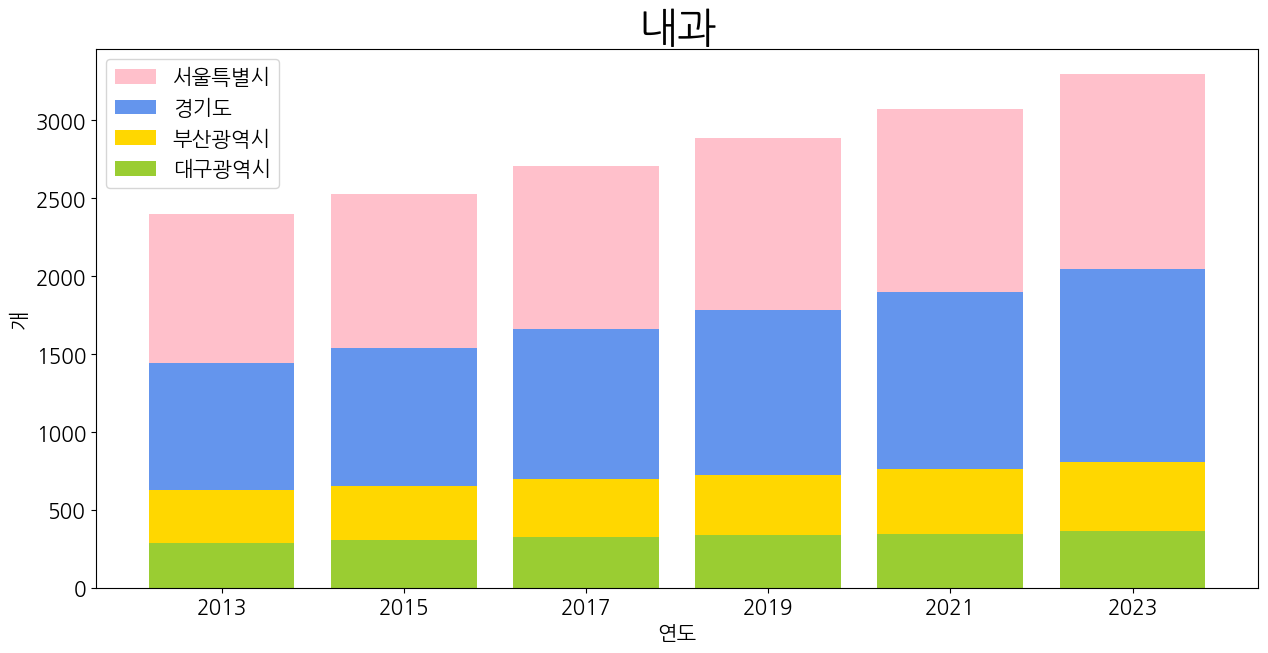

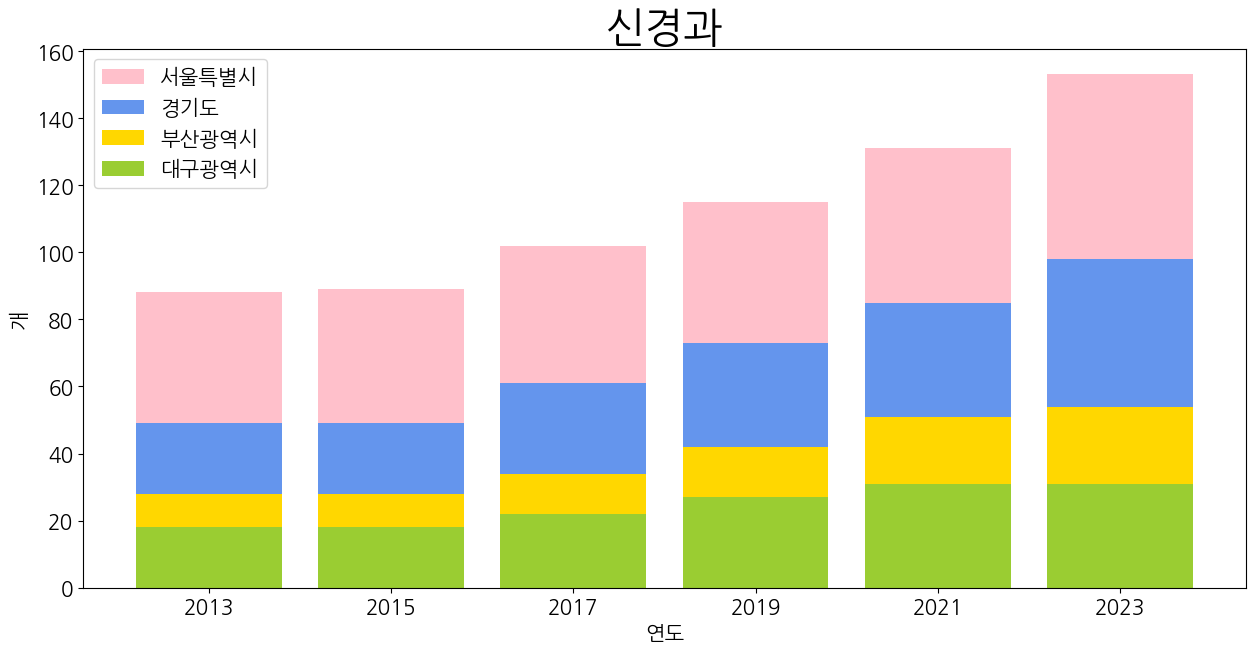

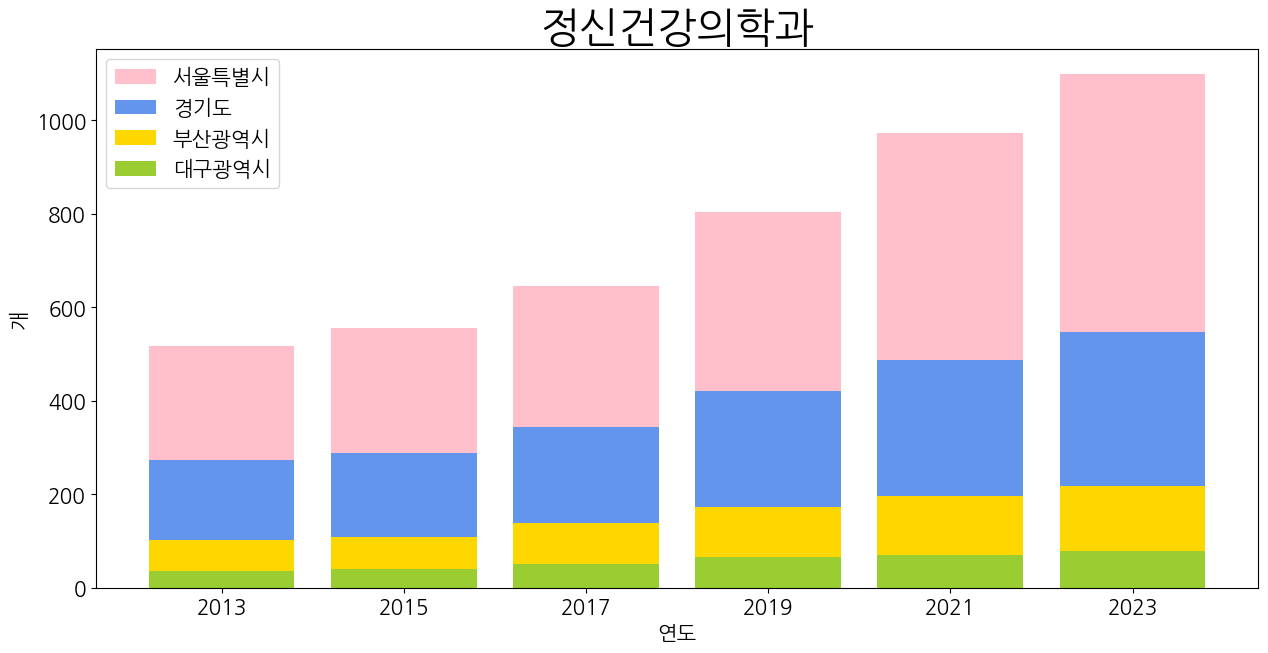

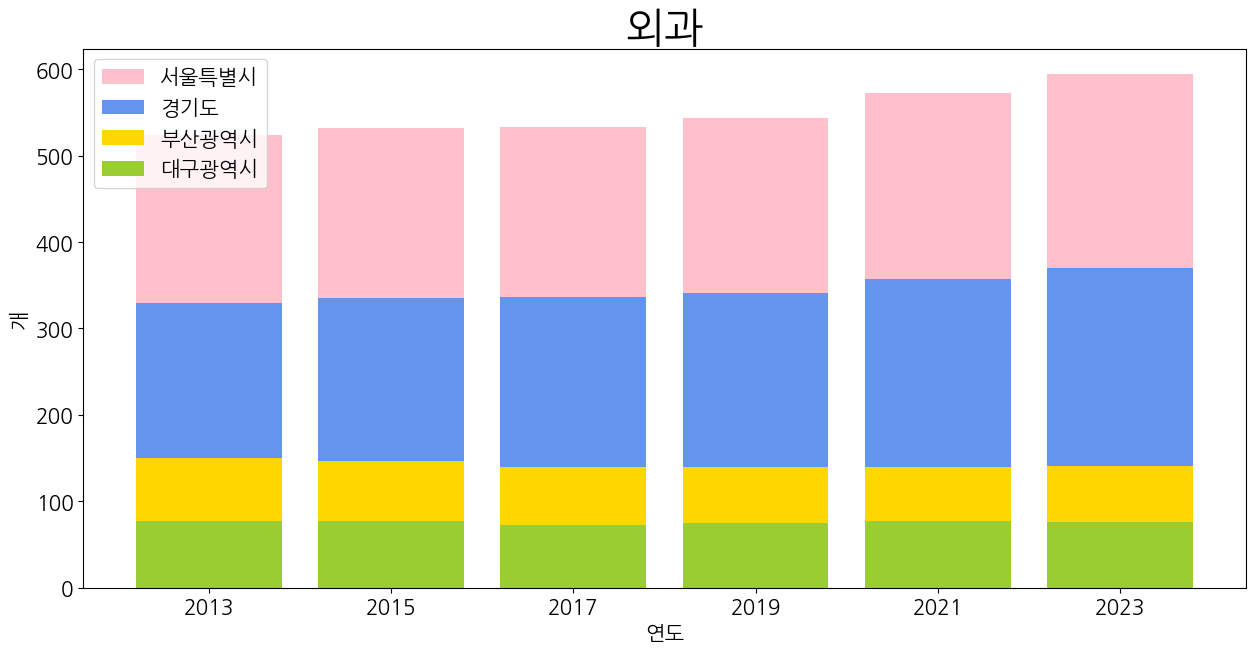

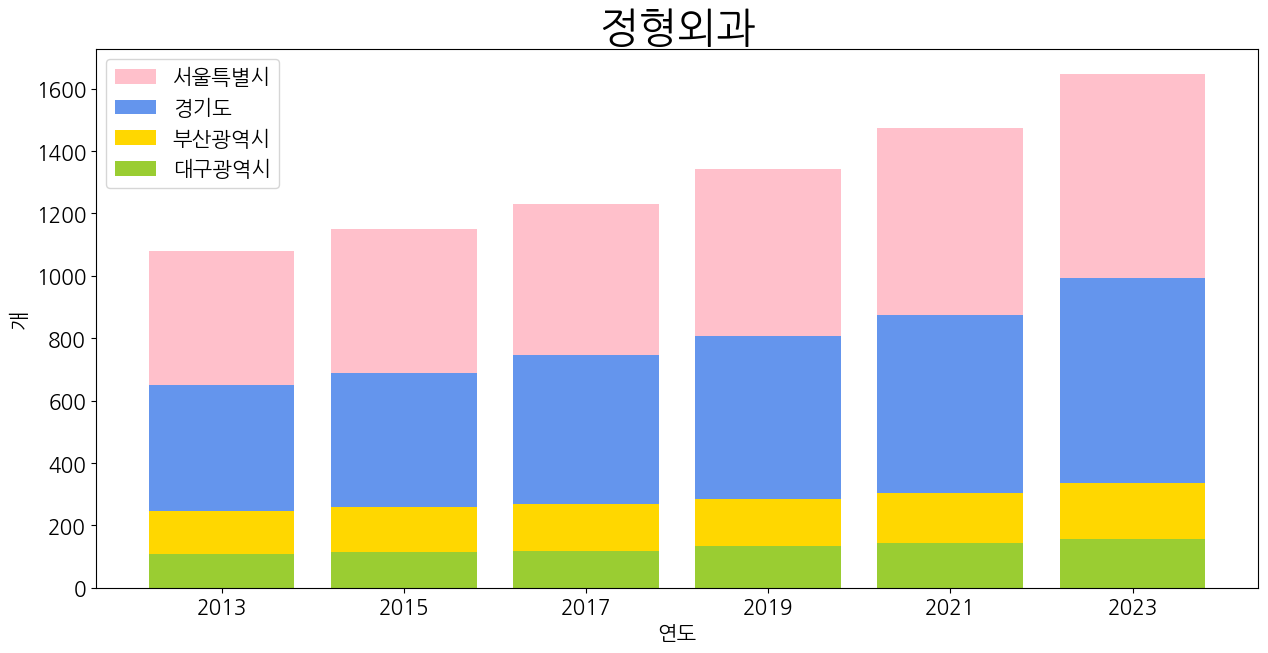

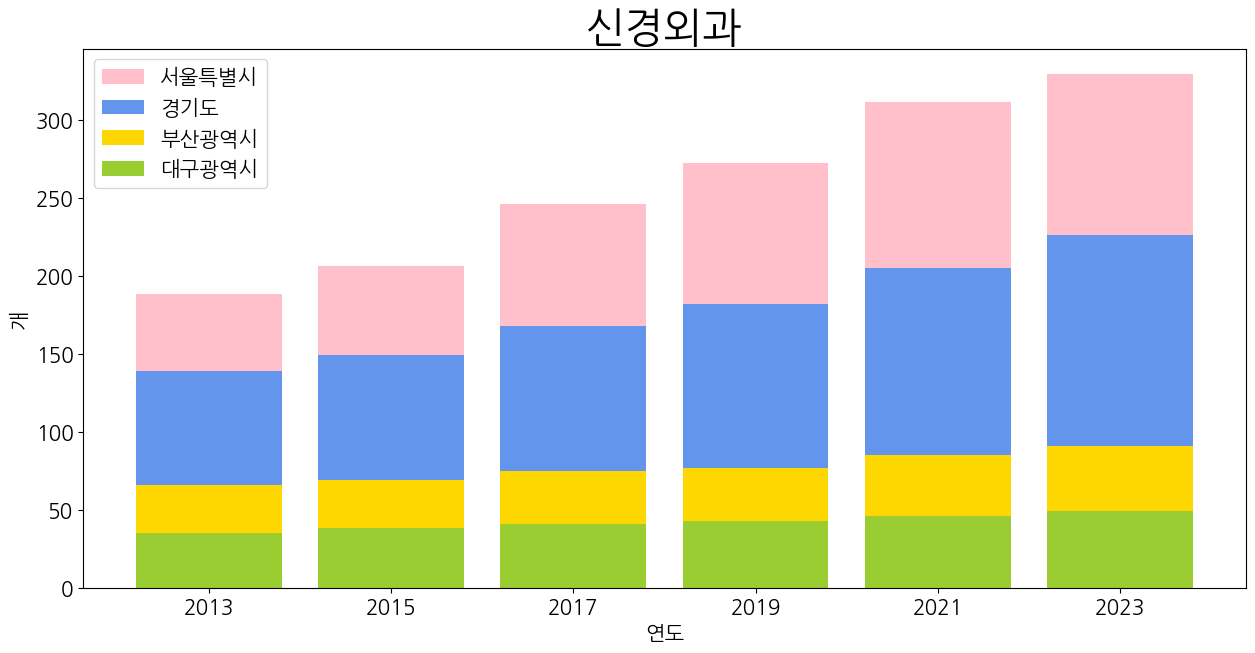

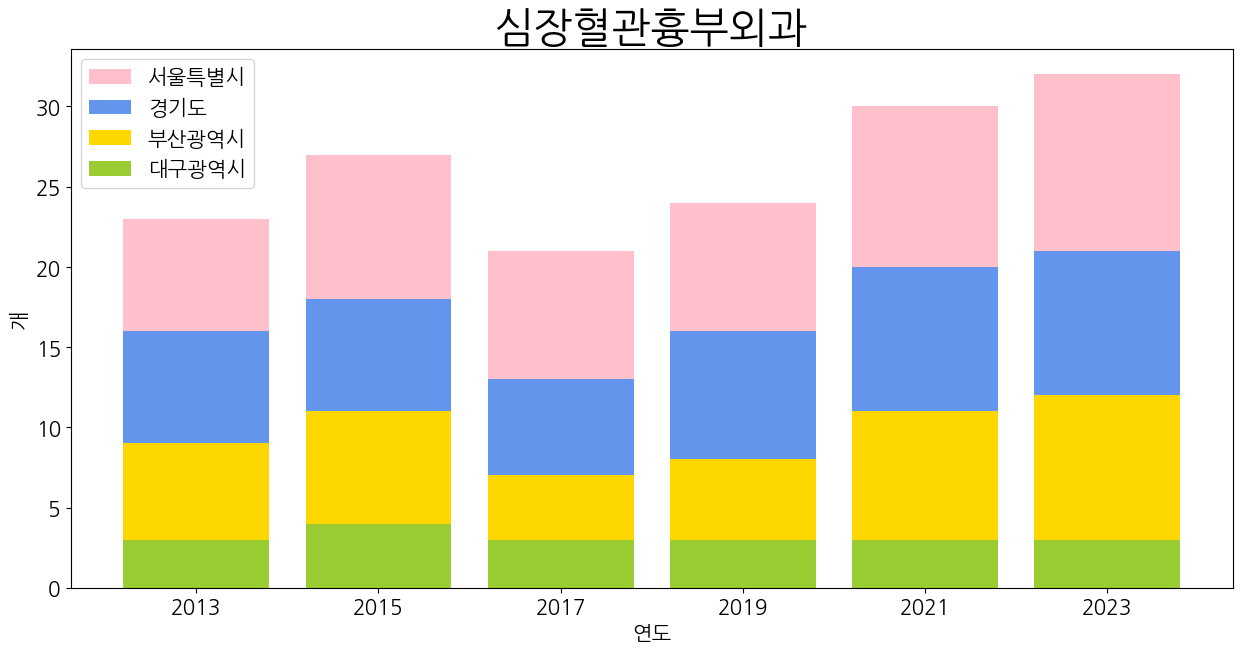

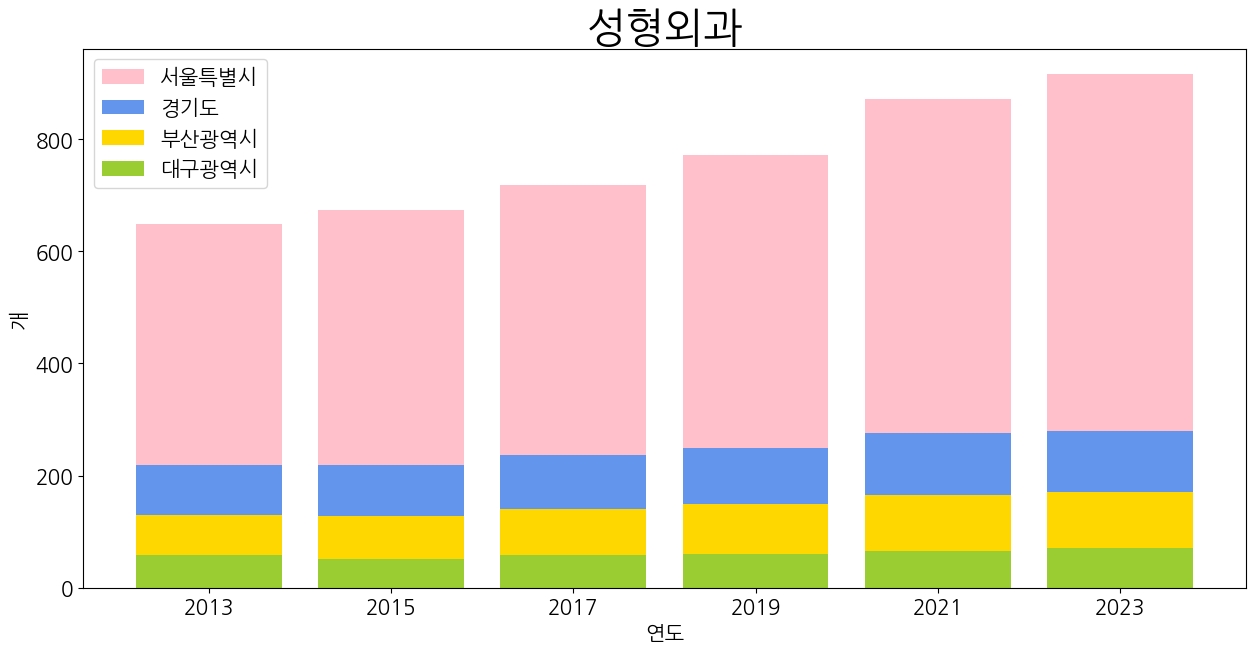

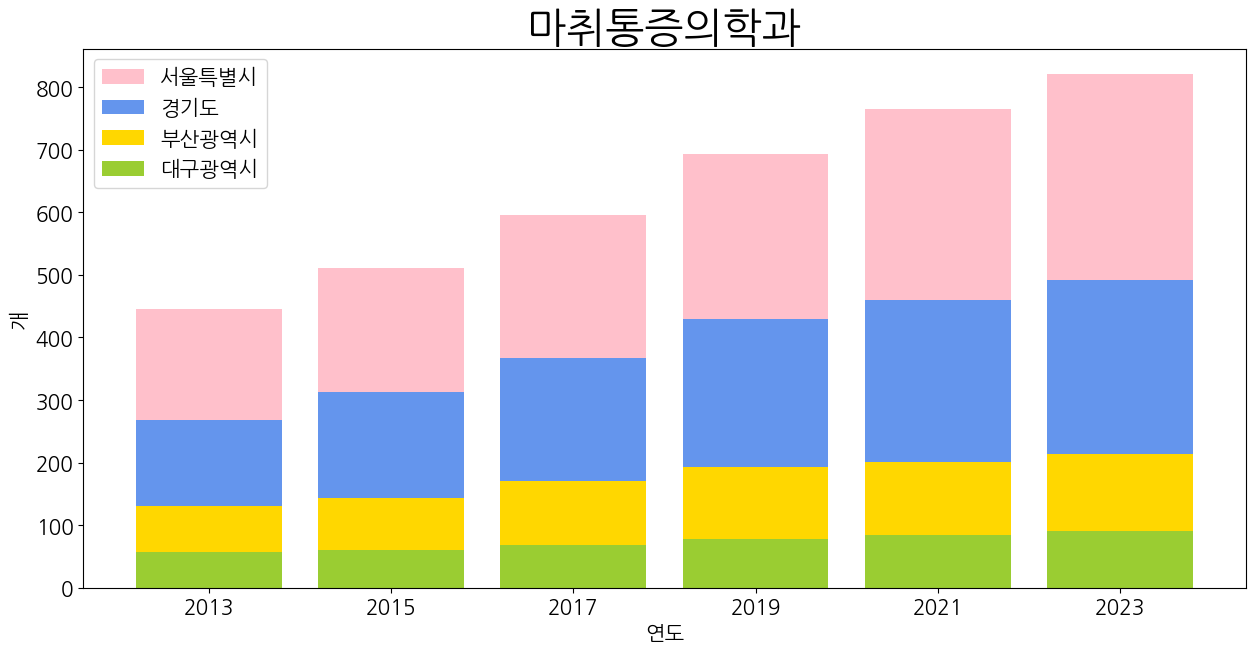

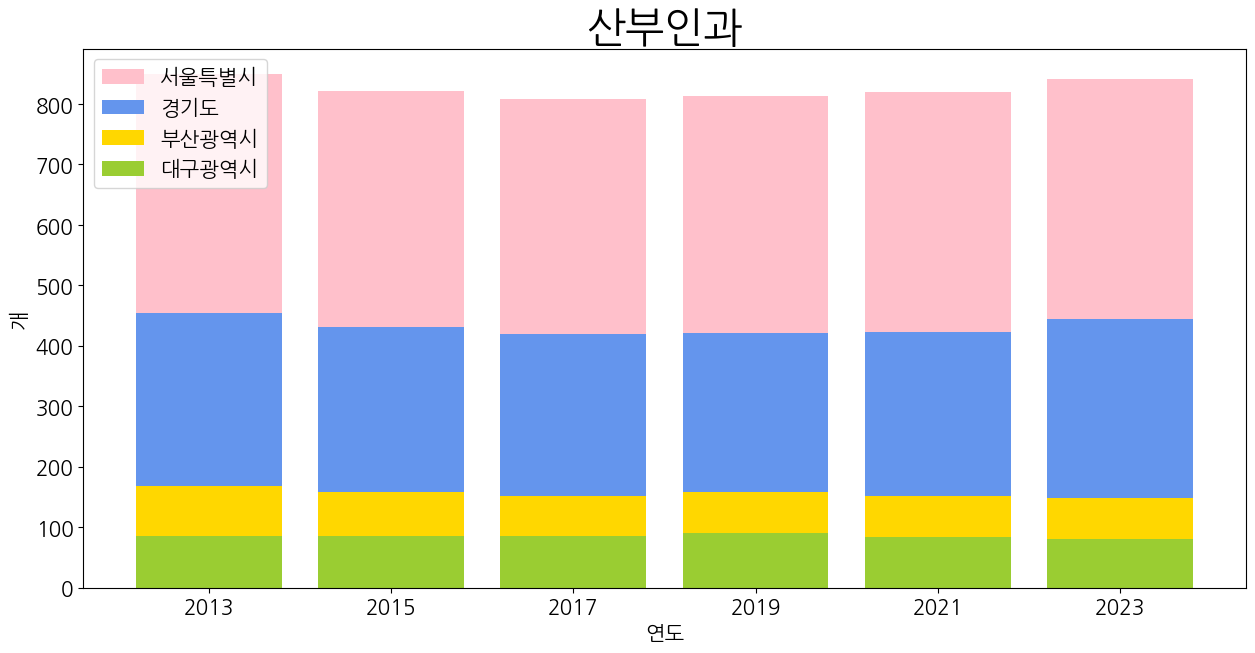

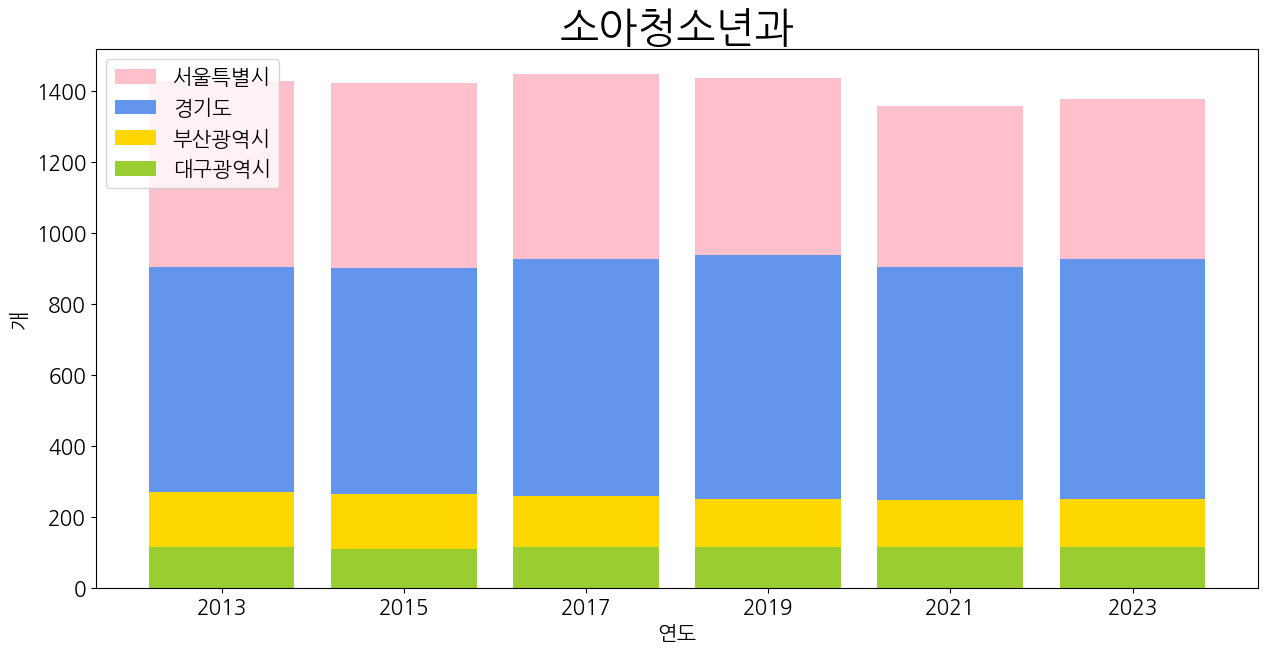

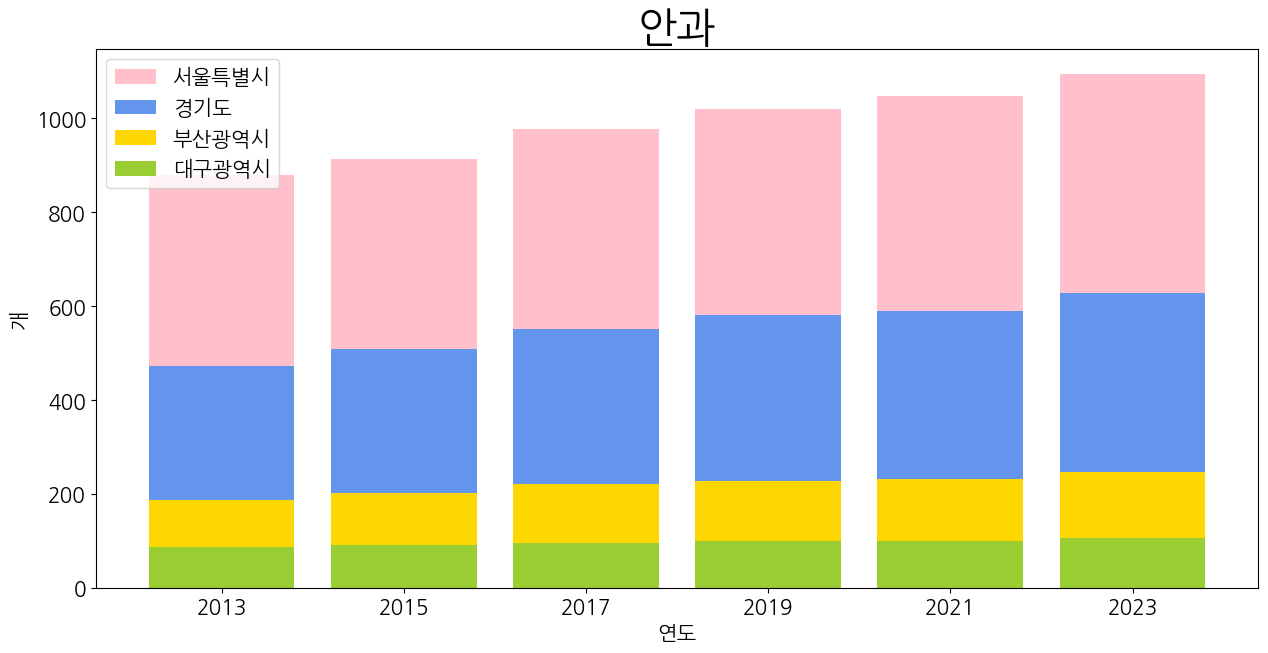

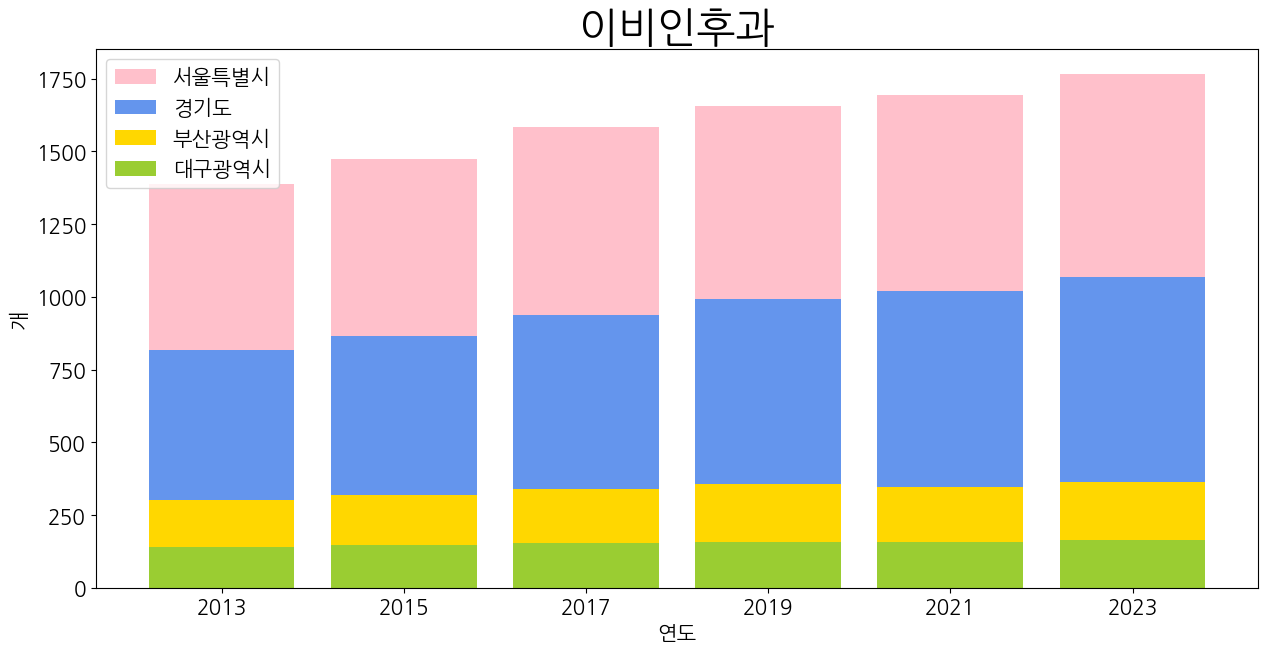

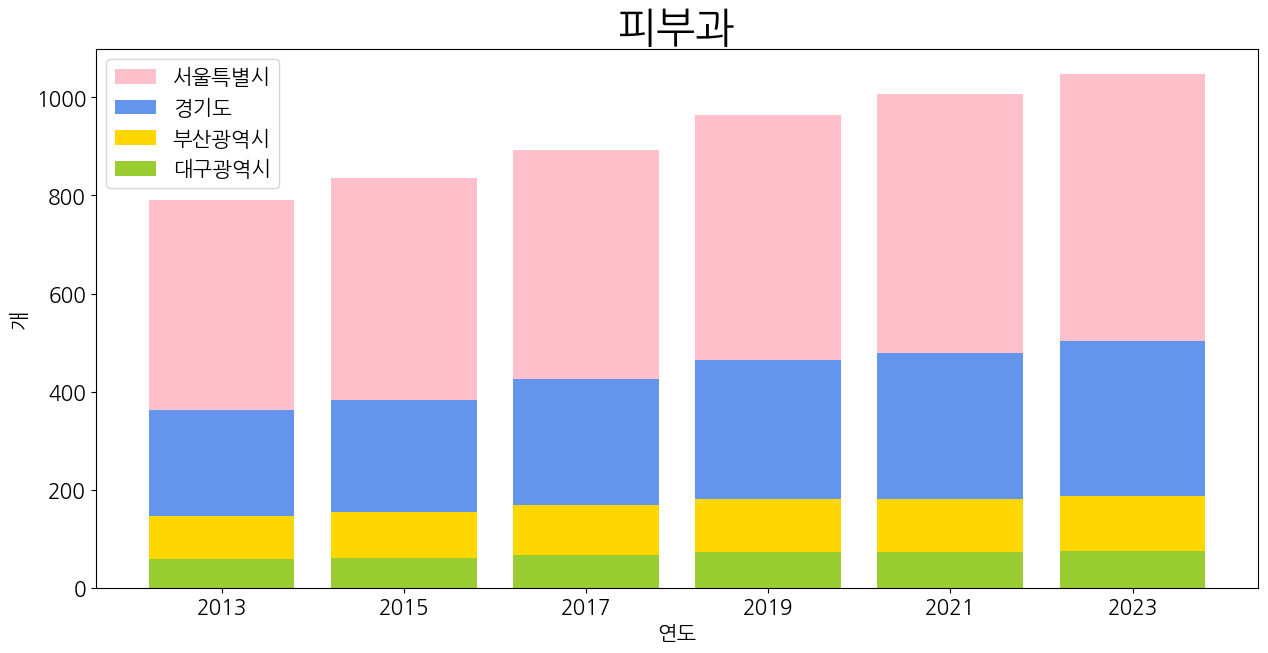

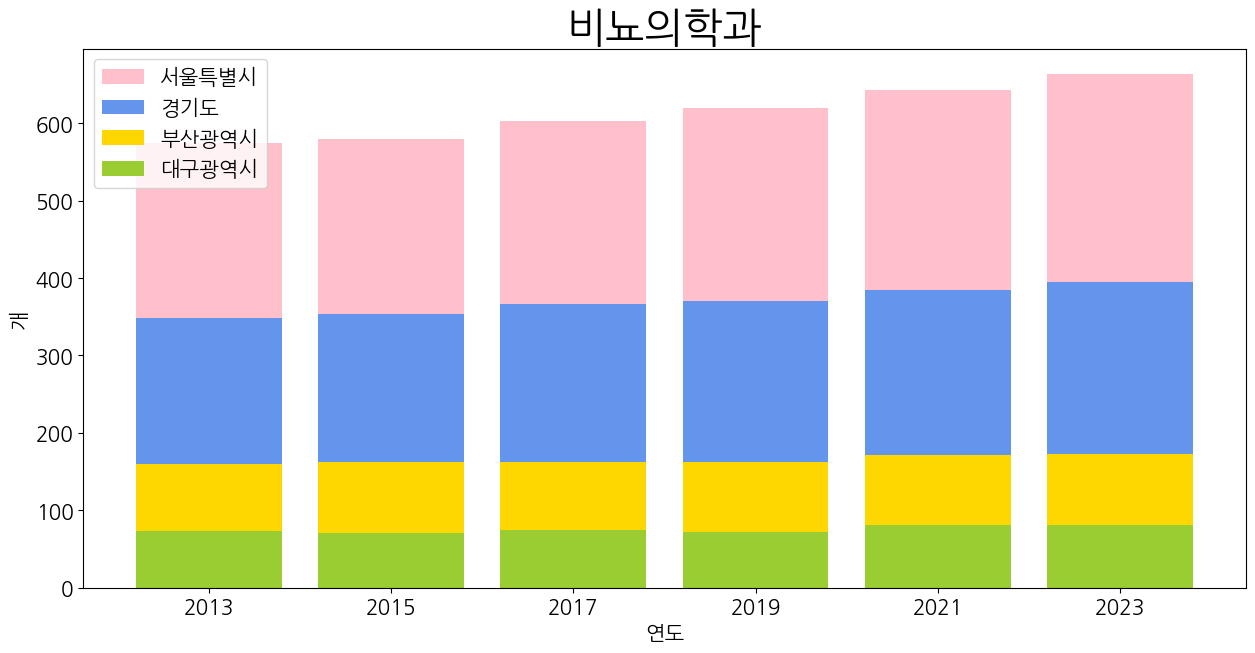

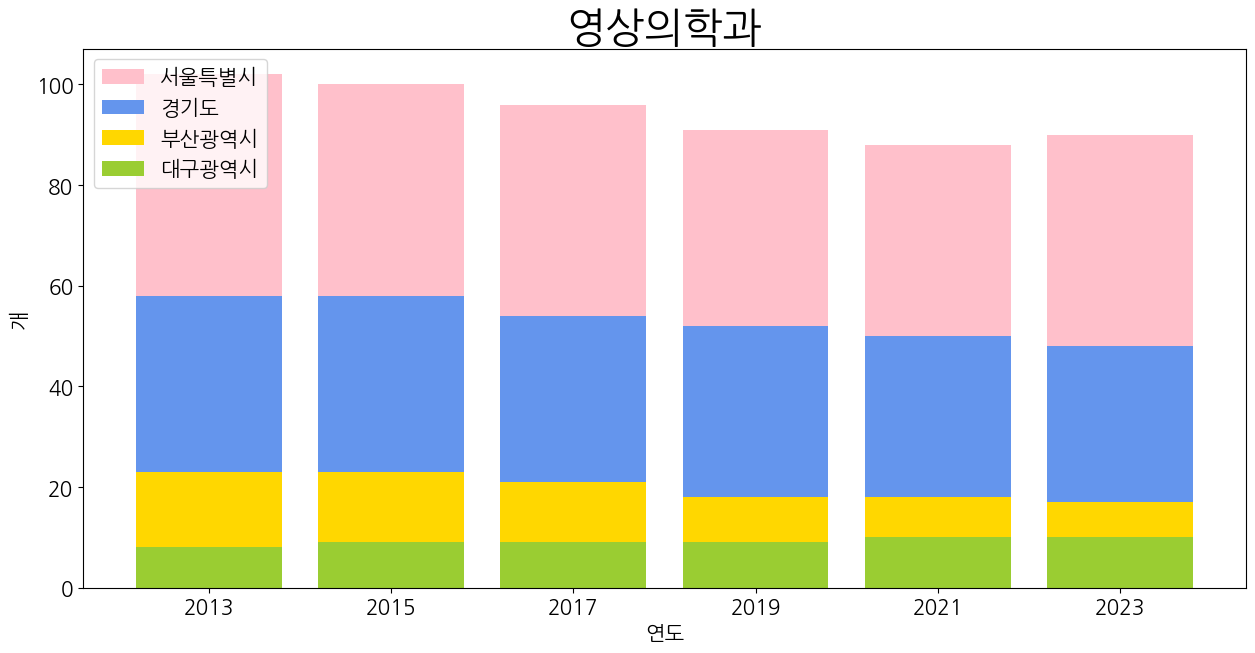

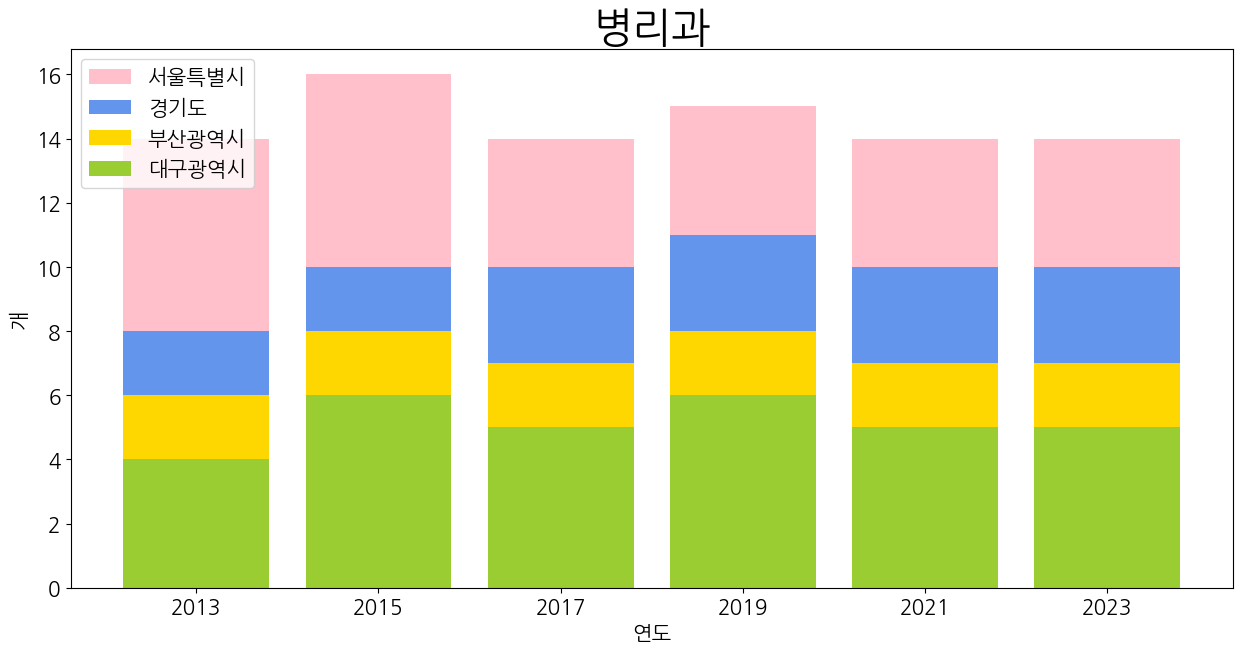

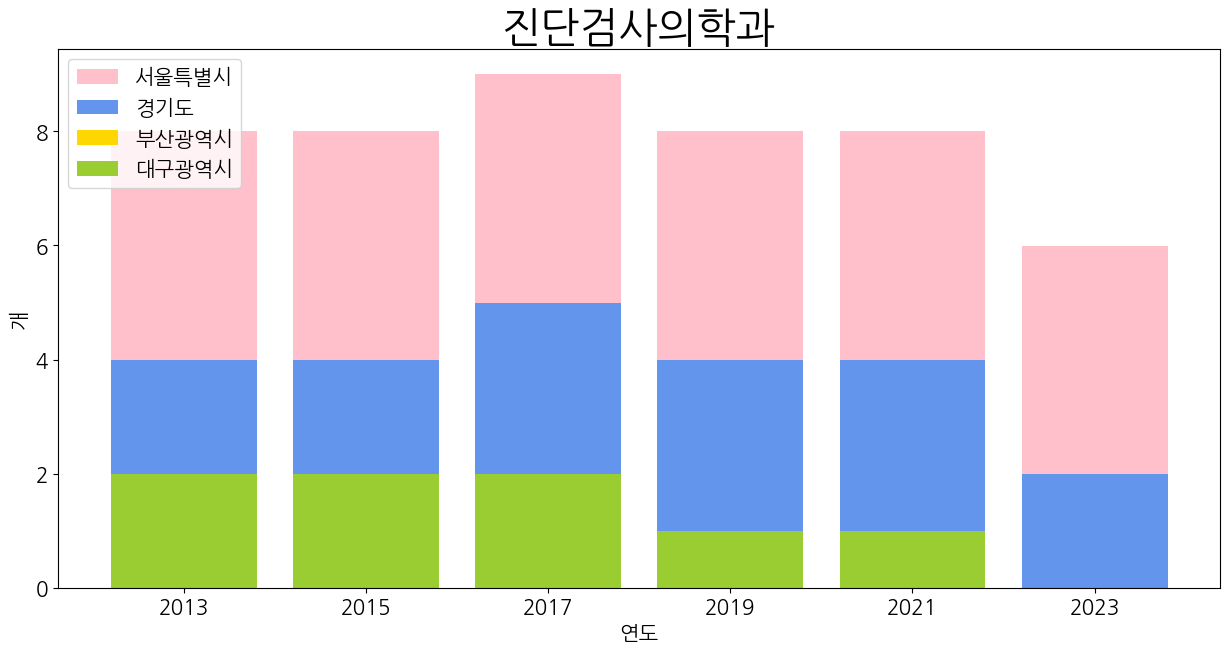

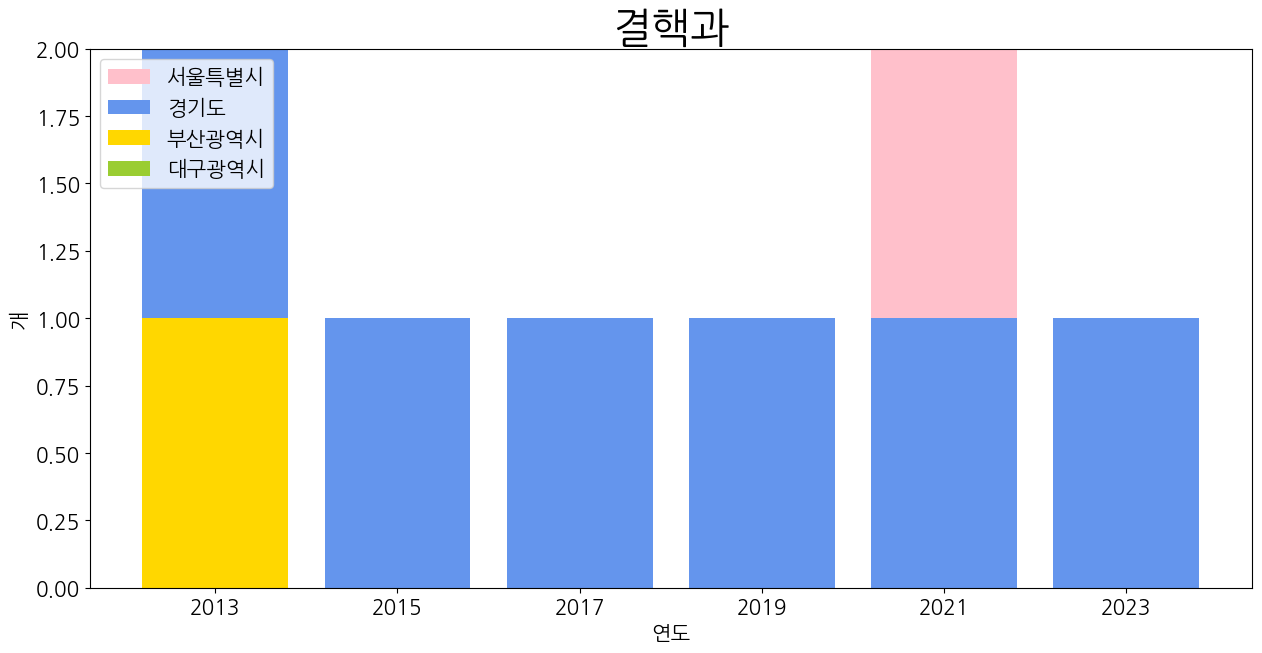

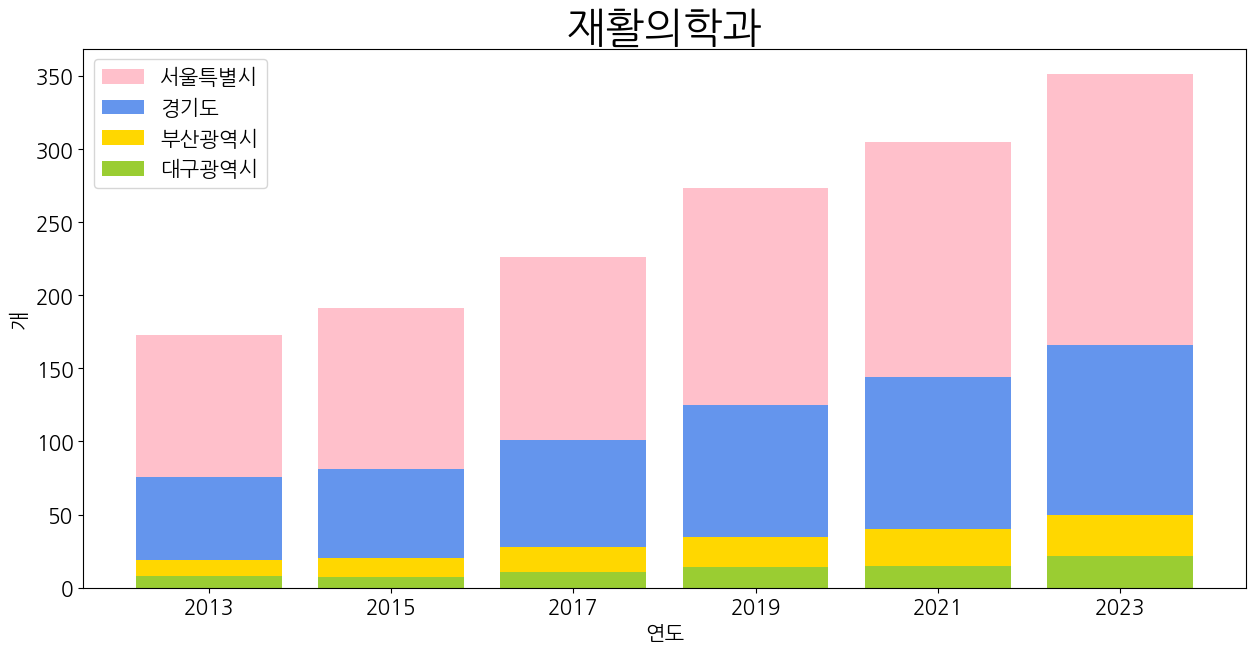

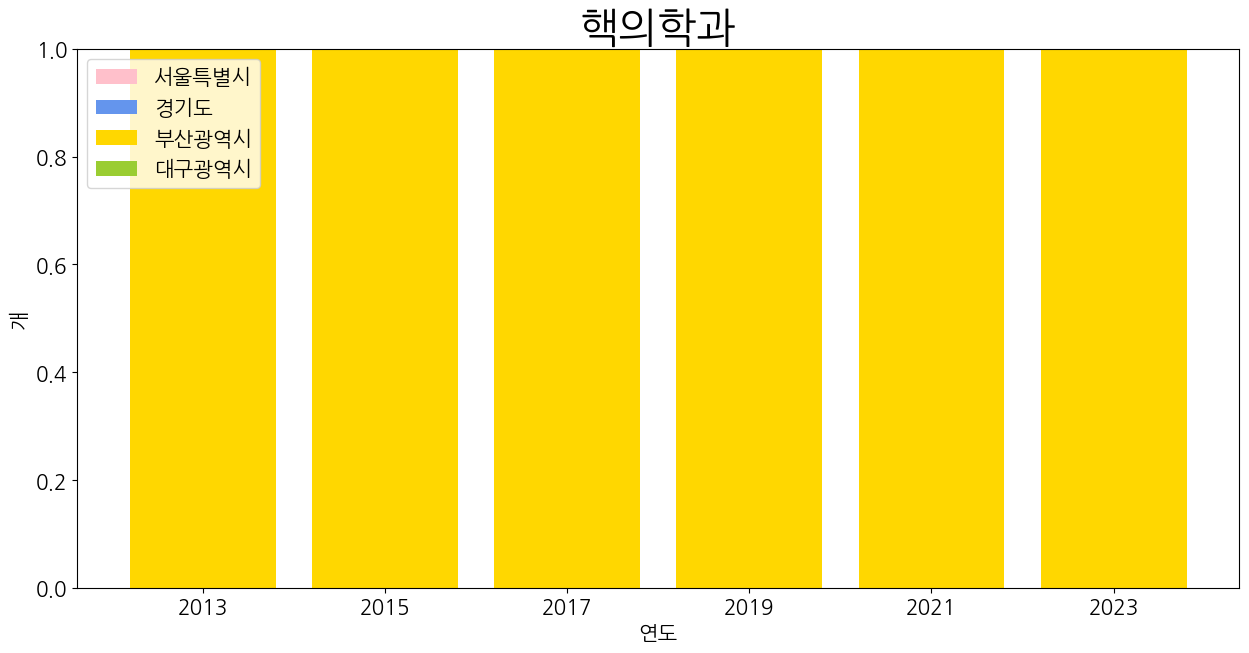

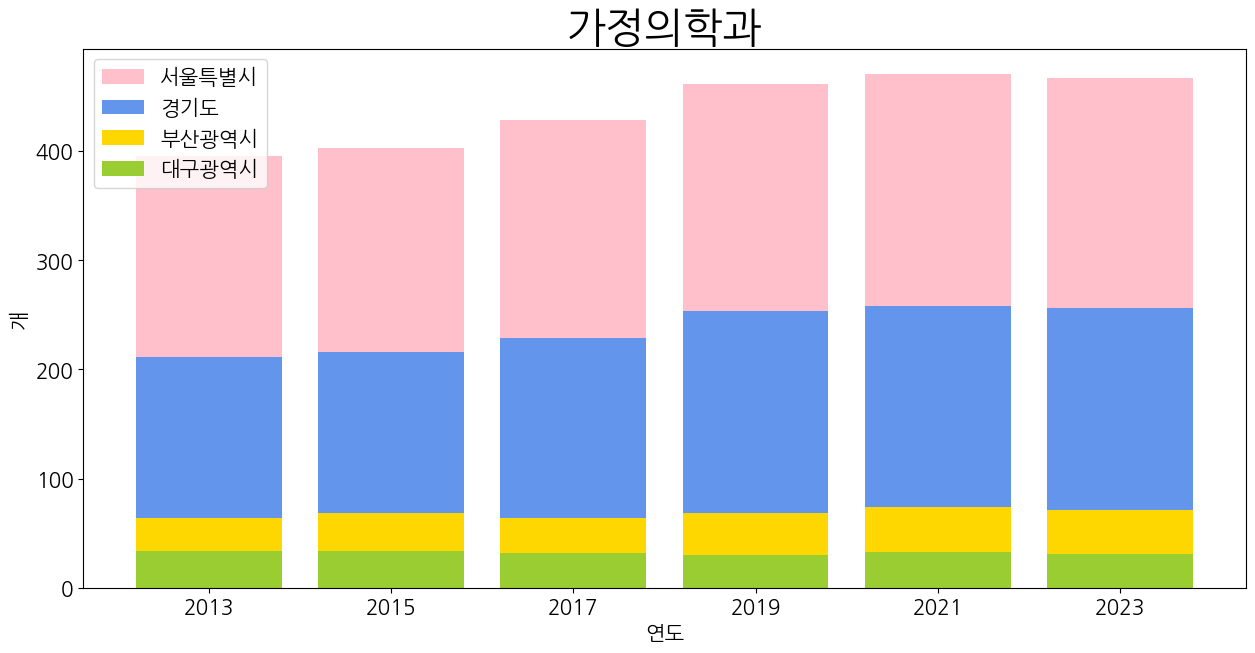

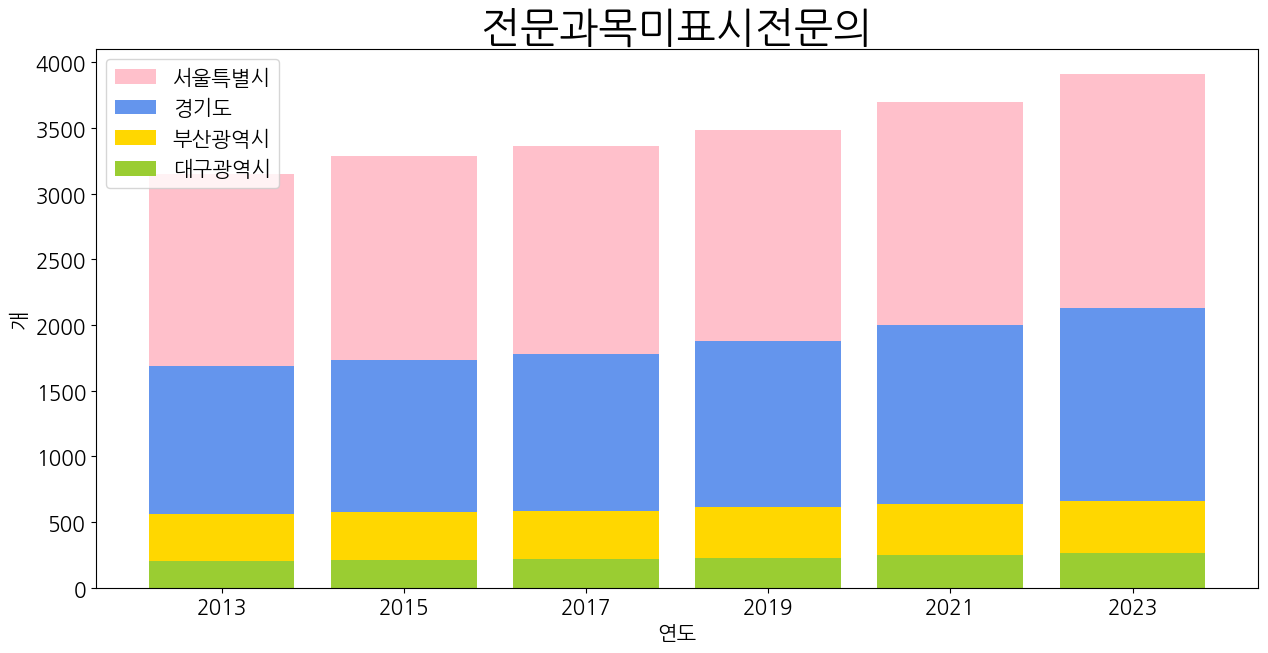

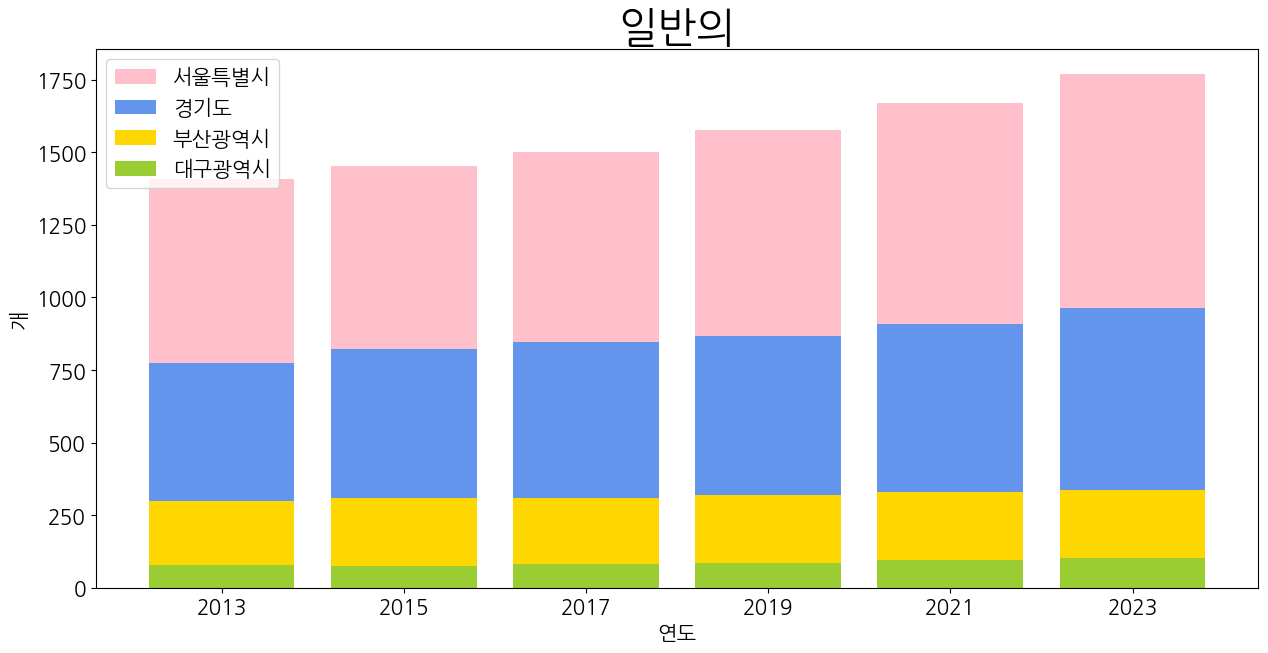

In [172]:
for i in range(len(df_list)):
    draw_graph2(df_list[i], name_list[i])

In [77]:
name_list

['계',
 '내과',
 '신경과',
 '정신건강의학과',
 '외과',
 '정형외과',
 '신경외과',
 '심장혈관흉부외과',
 '성형외과',
 '마취통증의학과',
 '산부인과',
 '소아청소년과',
 '안과',
 '이비인후과',
 '피부과',
 '비뇨의학과',
 '영상의학과',
 '병리과',
 '진단검사의학과',
 '결핵과',
 '재활의학과',
 '핵의학과',
 '가정의학과',
 '전문과목미표시전문의',
 '일반의']

<Axes: >

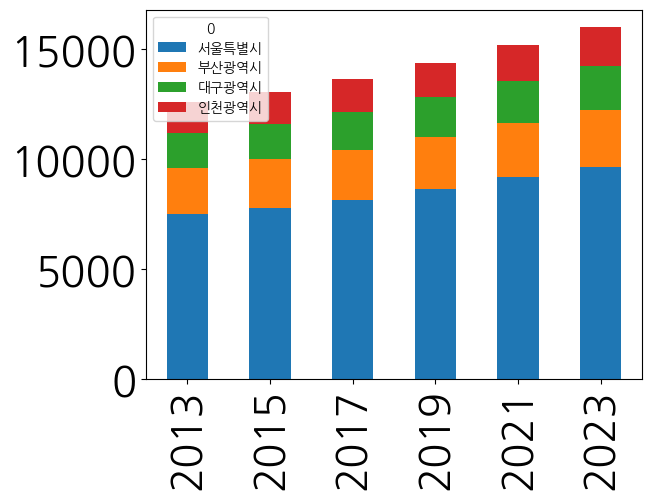

In [103]:
df_list[0]
x = ["2013", "2015", "2017", "2019", "2021", "2023"]
df_list[0].loc[["서울특별시", "부산광역시", "대구광역시", "인천광역시"]].T.plot(kind='bar', stacked=True)

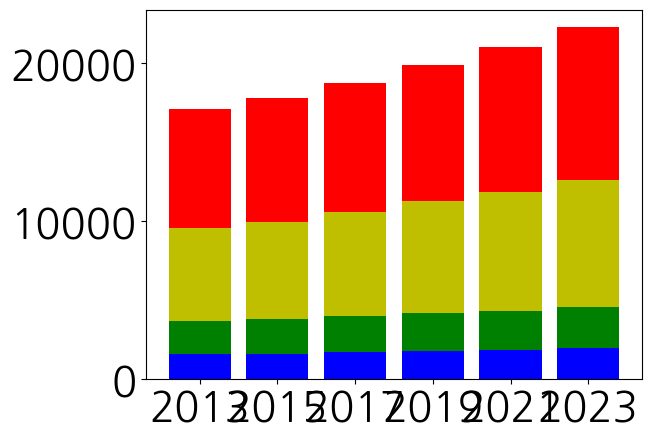

In [113]:
df_list[0].loc[["서울특별시", "부산광역시", "대구광역시", "경기도"]]
# 서울 경기 부산 대구 
sum = 0
p1 = plt.bar(x, df_list[0].loc["대구광역시"], color='b')
sum += df_list[0].loc["대구광역시"]
p2 = plt.bar(x, df_list[0].loc["부산광역시"], color='g', bottom=sum)
sum += df_list[0].loc["부산광역시"]
p3 = plt.bar(x, df_list[0].loc["경기도"], color='y', bottom=sum)
sum += df_list[0].loc["경기도"]
p4 = plt.bar(x, df_list[0].loc["서울특별시"], color='r' ,bottom=sum)
sum += df_list[0].loc["서울특별시"]

In [108]:
df_list[0]

2013   2015   2017   2019   2021   2023
0                                                
계        28328  29488  30938  32491  33912  35580
서울특별시     7505   7802   8155   8628   9189   9669
부산광역시     2119   2198   2279   2384   2468   2588
대구광역시     1576   1615   1712   1803   1884   1971
인천광역시     1384   1444   1496   1573   1633   1772
광주광역시      864    893    915    948    970   1041
대전광역시      995   1026   1057   1078   1112   1114
울산광역시      537    574    592    609    618    633
세종특별자치시     57    100    147    181    198    229
경기도       5876   6159   6600   7065   7487   8048
강원특별자치도    695    717    743    769    782    798
충청북도       775    815    847    891    912    936
충청남도       991   1024   1055   1074   1094   1108
전라북도      1080   1107   1143   1165   1179   1208
전라남도       894    905    931    944    962    966
경상북도      1168   1226   1260   1292   1279   1296
경상남도      1481   1522   1594   1639   1682   1707
제주특별자치도    331    361    412    448    463    496

# <hr> 주요과와 일부 지역만 보기

In [307]:
name_list2 = []
df_list2 = []

major_list = ["산부인과", "소아청소년과", "피부과", "안과", "외과", "정신건강의학과", "정형외과"]
local = ("제주특별자치도", "세종특별자치시", "강원특별자치도", "대전광역시", "울산광역시", "강원특별자치도")
def hospital(cur):
    cnt = 0
    tables = ["h2013", "h2015", "h2017", "h2019", "h2021", "h2023"]
    # cur.execute(f'''select * from h2013''') # 2013년이 학과 개수가 가장 적음 
    for i in local:
        for j in major_list: # 과 이름 다 넣은 거
            try:
                # sql = f'''update {i} set {j[0]} = "0" where {j[0]} = "-";'''
                # cur.execute(sql)
                sql = f'''select tb23.시도별,
                tb13.{j} as "2013", tb15.{j} as "2015",
            	tb17.{j} as "2017", tb19.{j} as "2019",
            	tb21.{j} as "2021", tb23.{j} as "2023"
                from h2023 as tb23
            	inner join (select 시도별, {j}
            	from h2021) as tb21
            	on tb23.시도별 = tb21.시도별
            	inner join (select 시도별, {j}
            	from h2019) as tb19
            	on tb23.시도별 = tb19.시도별
            	inner join (select 시도별, {j}
            	from h2017) as tb17
            	on tb23.시도별 = tb17.시도별
            	inner join (select 시도별, {j}
            	from h2015) as tb15
            	on tb23.시도별 = tb15.시도별
            	inner join (select 시도별, {j}
            	from h2013) as tb13
            	on tb23.시도별 = tb13.시도별
                where tb23.시도별 = "{i}";'''
                print(sql)
                # print("실행 전")
                cur.execute(sql)
                rows = cur.fetchall()	#	모든	데이터를	가져옴
                # print(rows)
                rowDF = pd.DataFrame(rows)
                rowDF.set_index(0, inplace=True)
                rowDF.columns = ["2013", "2015", "2017", "2019", "2021", "2023"]
                df_list2.append(rowDF)	#	DataFrame형태로	변환
                # print(j[0]) # 학과 
                # name_list2.append(str(j))
            except:
                print("error = ",j)
                continue

In [308]:
conn = pymysql.connect(host='localhost', user='root', password='1234', db =	'hospital2', charset='utf8')
cur =	conn.cursor()
cur.execute("select * from h2017;")
hospital(cur)
cur.close()
conn.close()

select tb23.시도별,
                tb13.산부인과 as "2013", tb15.산부인과 as "2015",
            	tb17.산부인과 as "2017", tb19.산부인과 as "2019",
            	tb21.산부인과 as "2021", tb23.산부인과 as "2023"
                from h2023 as tb23
            	inner join (select 시도별, 산부인과
            	from h2021) as tb21
            	on tb23.시도별 = tb21.시도별
            	inner join (select 시도별, 산부인과
            	from h2019) as tb19
            	on tb23.시도별 = tb19.시도별
            	inner join (select 시도별, 산부인과
            	from h2017) as tb17
            	on tb23.시도별 = tb17.시도별
            	inner join (select 시도별, 산부인과
            	from h2015) as tb15
            	on tb23.시도별 = tb15.시도별
            	inner join (select 시도별, 산부인과
            	from h2013) as tb13
            	on tb23.시도별 = tb13.시도별
                where tb23.시도별 = "제주특별자치도";
select tb23.시도별,
                tb13.소아청소년과 as "2013", tb15.소아청소년과 as "2015",
            	tb17.소아청소년과 as "2017", tb19.소아청소년과 as "2019",
            	tb21.소아청소년과 as "2021", tb23.소아청

In [249]:
len(df_list2)

30

In [309]:
def draw_graph2(df_list, name):
    plt.figure(figsize=(20, 10))
    # x = group_area.index.to_list()
    line_style = ["r", "y", 'dimgray','dimgrey','darkgray', 'silver','lightgrey', 'dimgray','dimgrey','darkgray', 'silver','lightgrey']
    cnt = 0
    for df in df_list:
        x = ["2013", "2015", "2017", "2019", "2021", "2023"]
        y = df.iloc[0].to_list()
        if cnt in [0, 1]:
            width = 4
            plt.plot(x, y, f"{line_style[cnt]}o--", label=major_list[cnt], linewidth = width, markersize = 10)
        else:
            width = 1
            plt.plot(x, y, line_style[cnt], label=major_list[cnt], linewidth = width)
        
        cnt += 1
    
    
    # plt.xticks(rotation=70)
    # plt.ylim(220000, 350000)
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    
    plt.title(name, size = 30)
    # 숫자 넣는 부분
    idx = 0
    '''
    for rect in bar:
        height = rect.get_height()
        if idx < 8:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='top', size = 15, rotation=90)
        else:    
            plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=90)
        idx += 1
    
    plt.text(rect.get_x() + rect.get_width()/2.0, avg, f"평균:{round(avg)}", ha='center', va='bottom', size = 15)
    '''
    plt.xlabel('연도', size = 30)
    plt.ylabel('개', size = 30)
    plt.legend(loc=2, fontsize=15)
    plt.show()

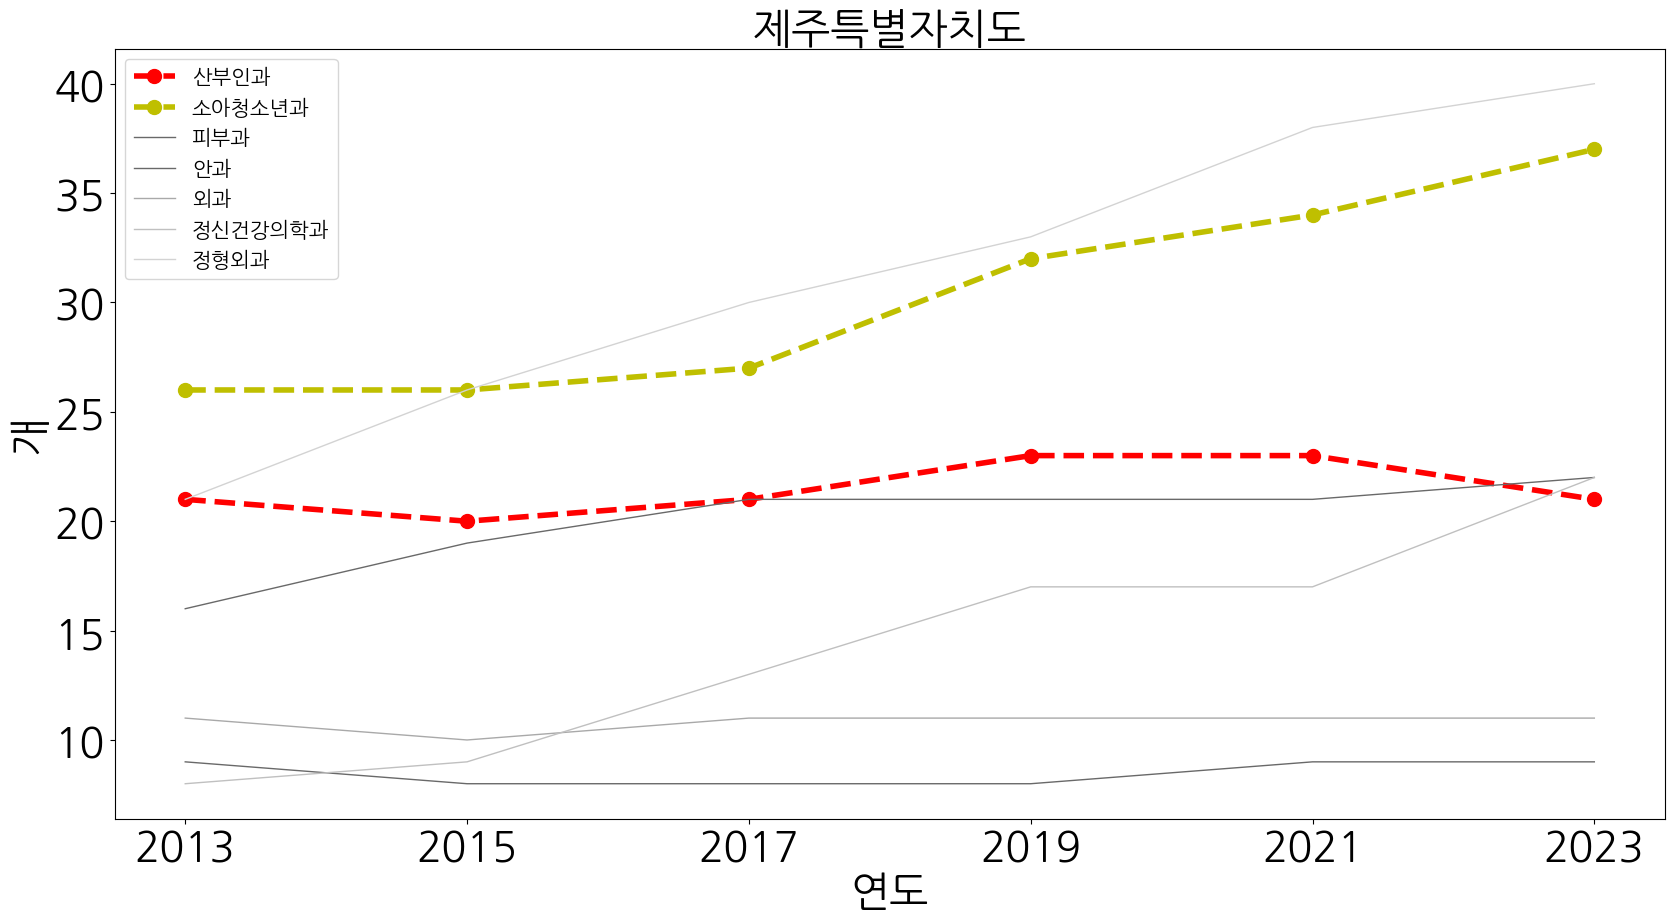

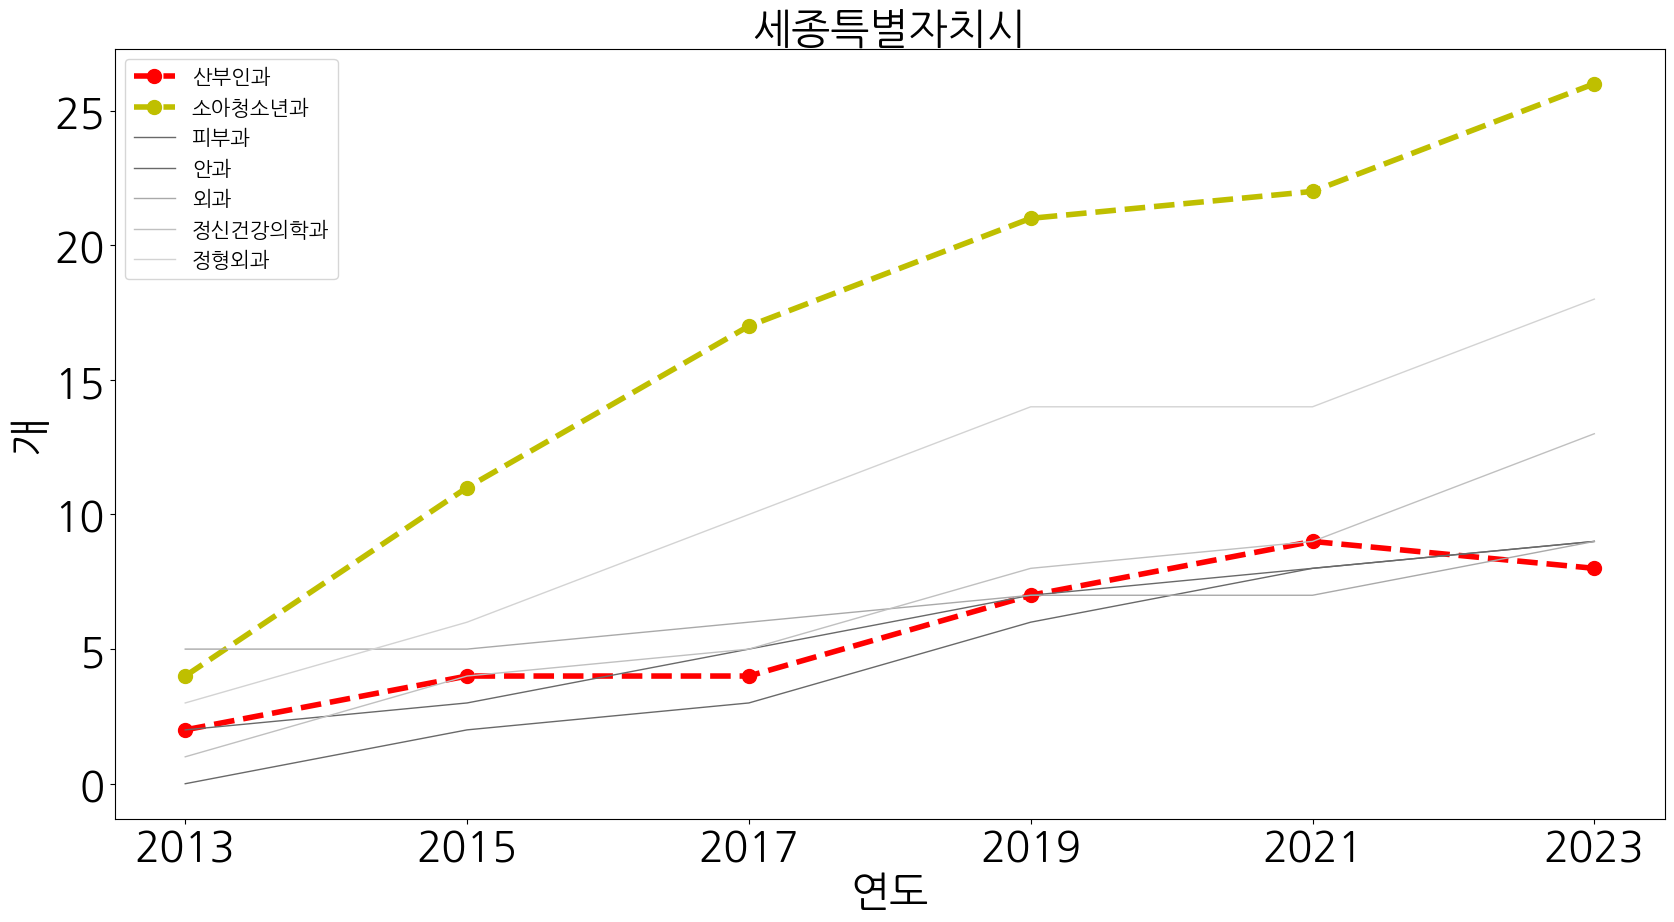

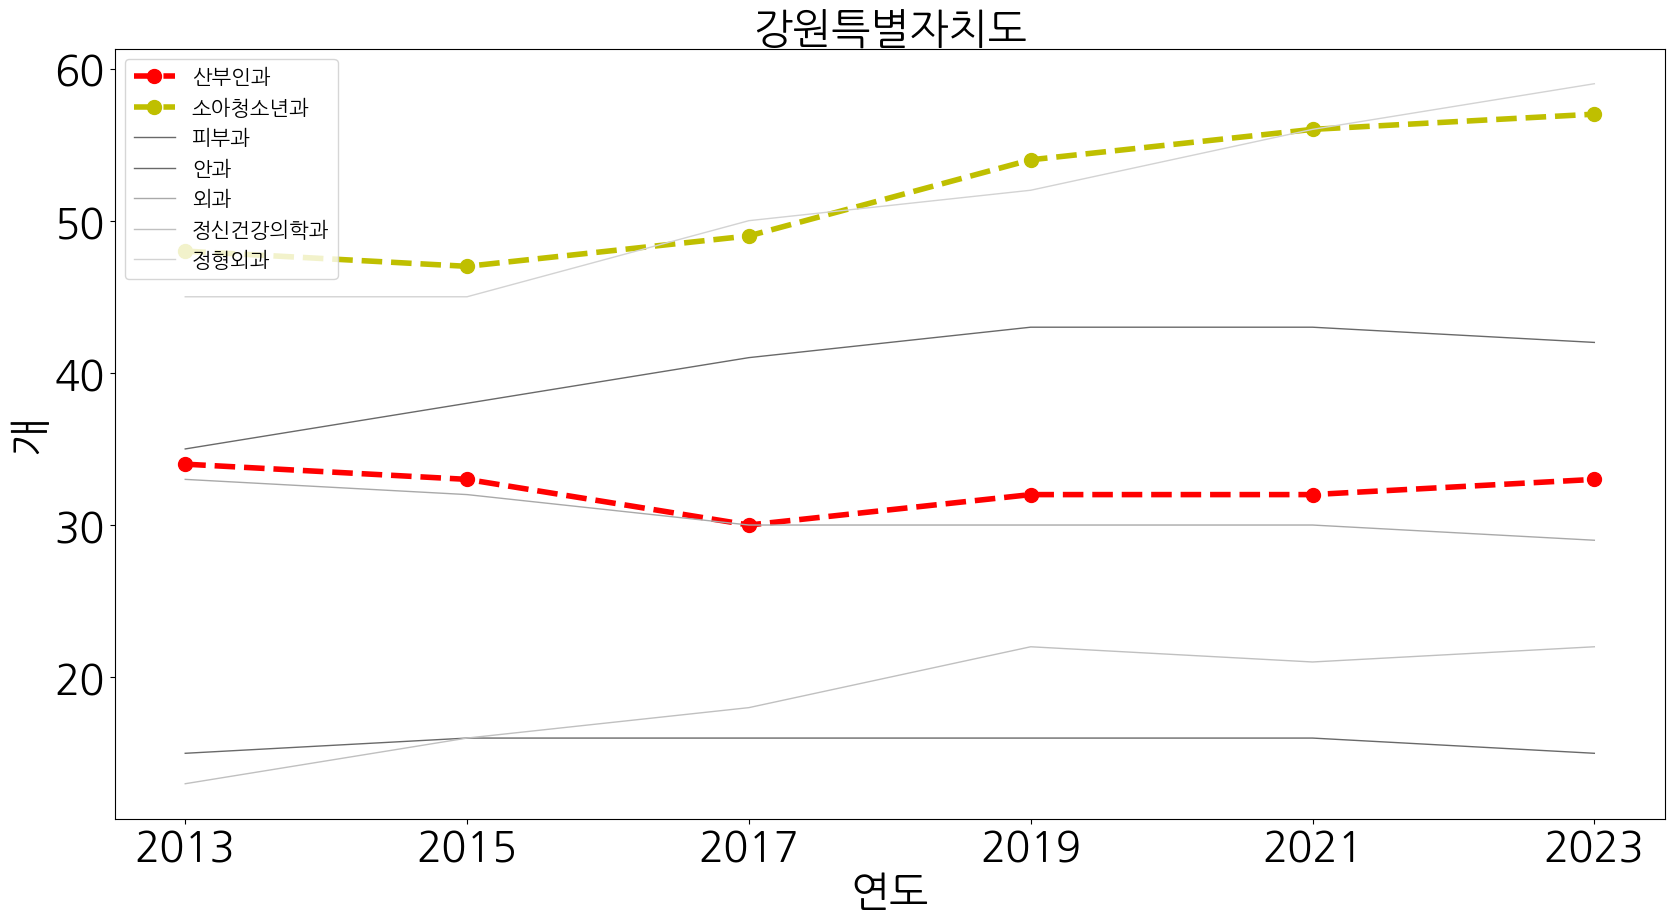

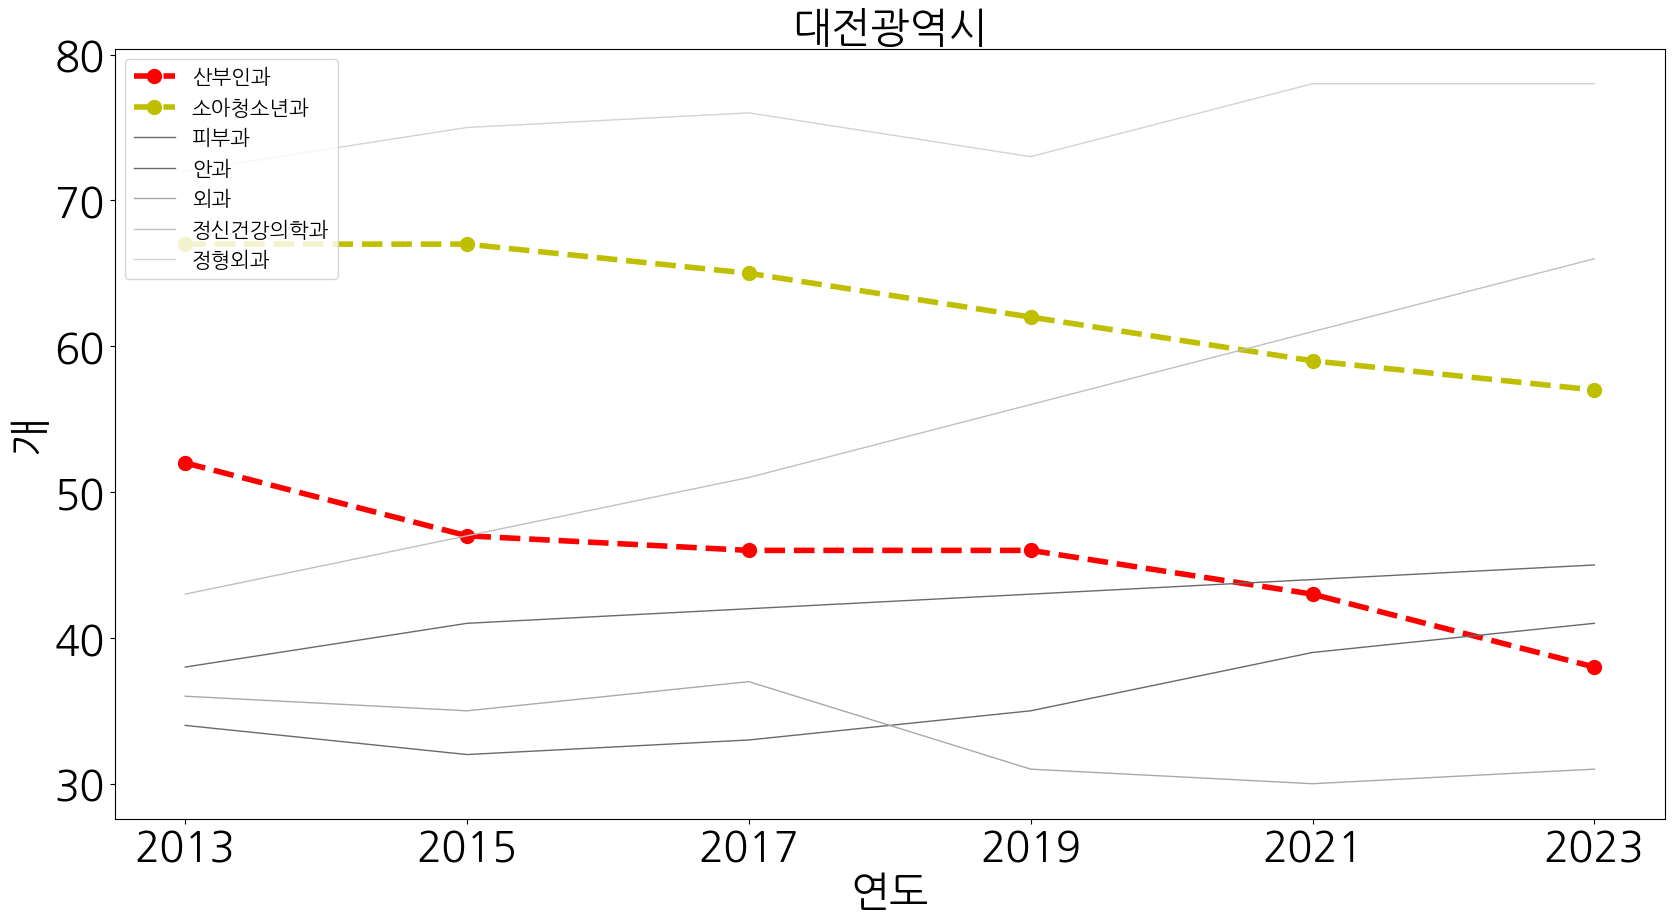

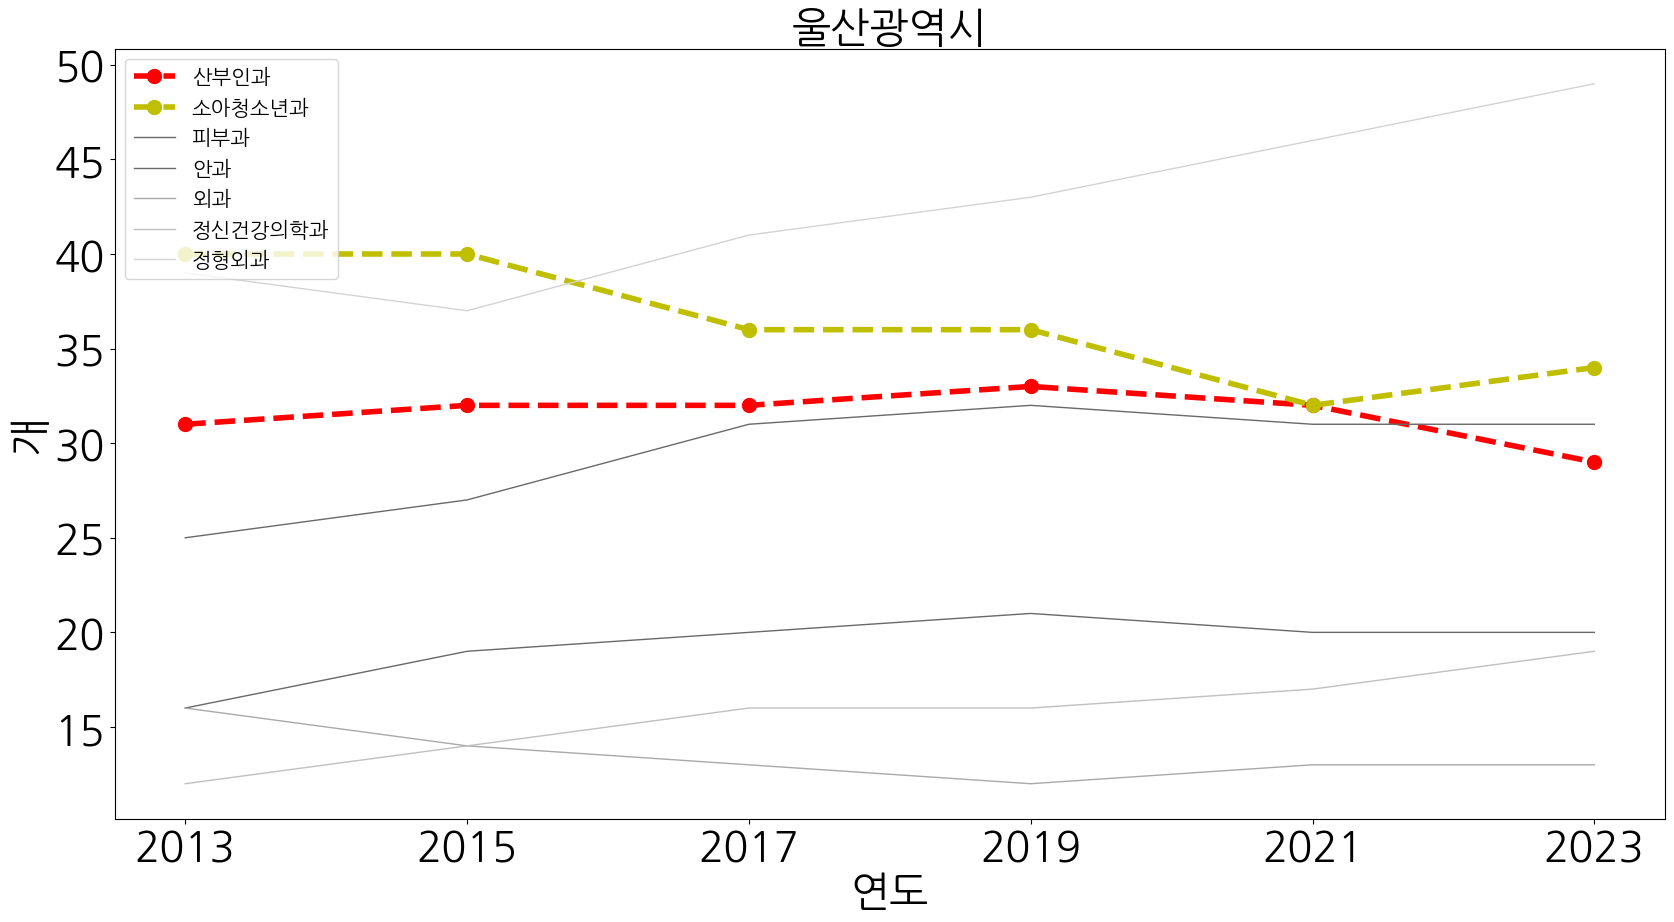

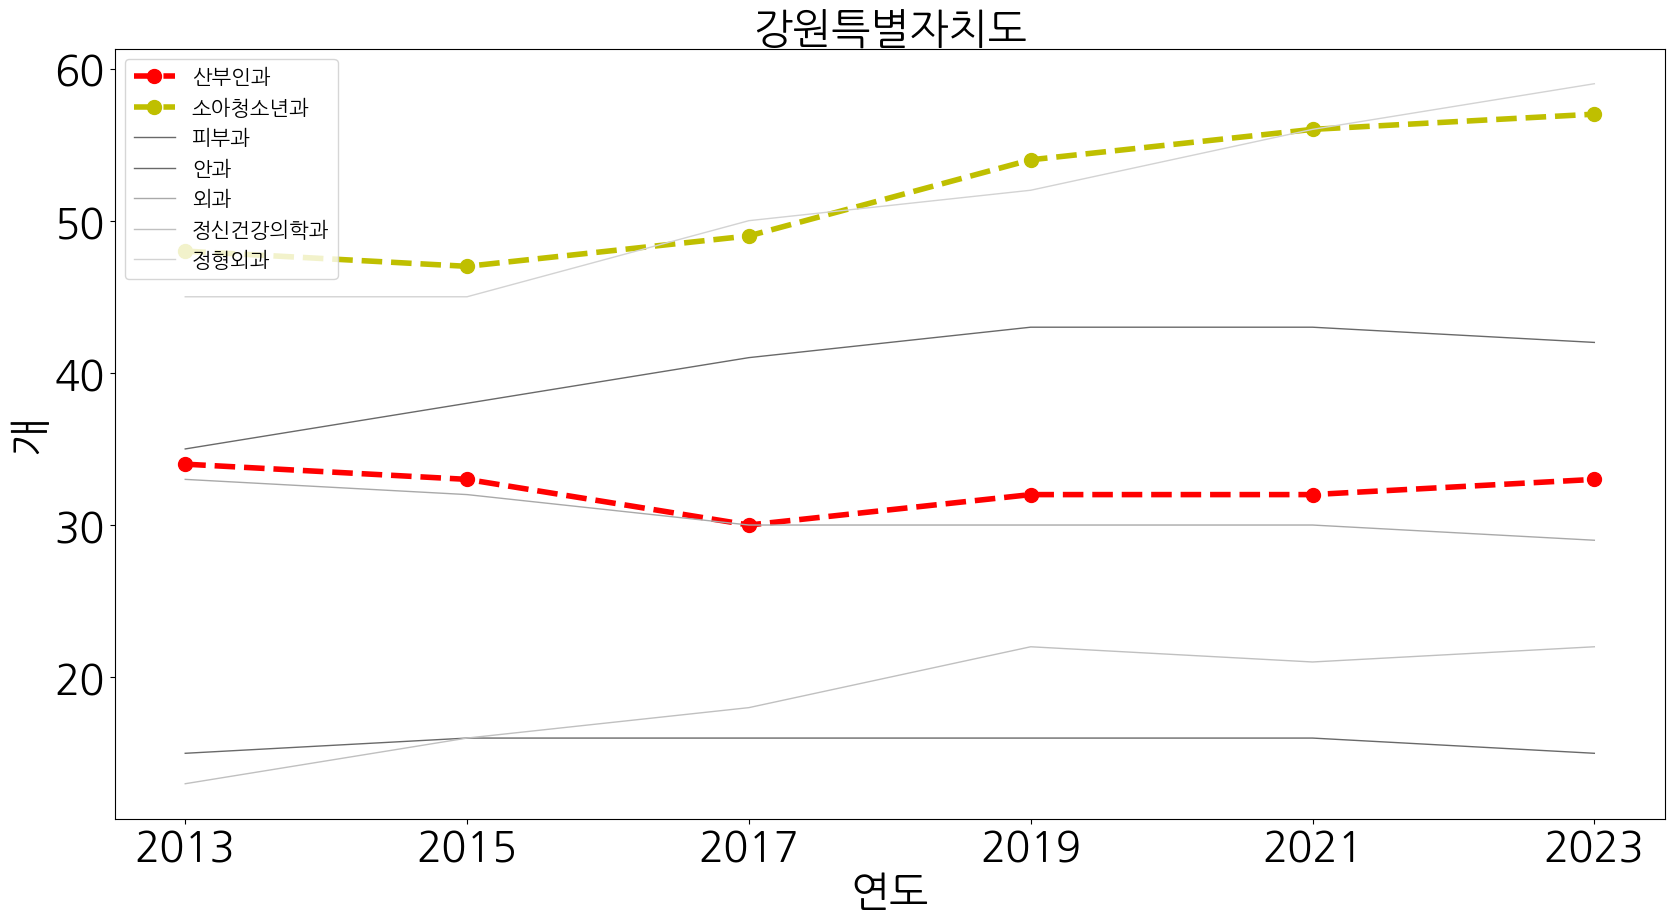

In [310]:
cnt = 0
# local : 지역
# df_list2 전공 개씩 
for i in local:
    draw_graph2(df_list2[cnt:cnt+len(major_list)], i) # 전공 n개 다 들어감 
    cnt += len(major_list)